# __Model for bike-rental prediction using ML & Exploring the explainability of the model__

## __Initializing H2O server and Loading Libraries__

In [5]:
!pip install h2o


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\Munjala Hari Krishna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
#Importing H2O, estimators and AUTOML
import h2o
from h2o.estimators import *
from h2o.automl import *
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------------------
H2O_cluster_uptime:         3 mins 13 secs
H2O_cluster_timezone:       Asia/Kolkata
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    1 month
H2O_cluster_name:           H2O_from_python_Munjala_Hari_Krishna_sv0qvg
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.480 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.11 final
--------------------------  -------------------------------------------

## __Task-2: Build an explainable ML model using the H2o package on the bike rental dataset and display various plots and write your findings. <br>a. Consider cnt as the target column.<br>b. Consider the Day data and hourly data and build two models separately.<br>c. Try at least two models (AutoML and any other model like gradient boosting) for the Day dataset.<br>d. Discuss how various plots try to explain the amount of bikes rented correspond to the various environmental conditions.__

## __1.GLM Model on Hourly data__

In [10]:
# Importing Hourly data
hour_data = h2o.import_file('hour.csv')
hour_data.head(2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


instant  dteday                 season    yr    mnth    hr    holiday    weekday    workingday    weathersit    temp    atemp    hum    windspeed    casual    registered    cnt
---------  -------------------  --------  ----  ------  ----  ---------  ---------  ------------  ------------  ------  -------  -----  -----------  --------  ------------  -----
        1  2011-01-01 00:00:00         1     0       1     0          0          6             0             1    0.24   0.2879   0.81            0         3            13     16
        2  2011-01-01 00:00:00         1     0       1     1          0          6             0             1    0.22   0.2727   0.8             0         8            32     40
[2 rows x 17 columns]

In [11]:
train, test = hour_data.split_frame([0.8], seed=42)  
y = 'cnt'
ignore = ['instant', 'cnt']
x = list(set(train.names)-set(ignore))

In [12]:
glm = H2OGeneralizedLinearEstimator(seed = 42,
                          model_id = 'glm',
                          family='gaussian')
%time glm.train(x=x, y=y, training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
CPU times: total: 0 ns
Wall time: 6.25 s


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.3514 )  15                            14                             1                       py_3_sid_8e5c

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 620.701423274512
RMSE: 24.913880132859916
MAE: 17.991629815116475
RMSLE: NaN
Mean Residual Deviance: 620.701423274512
R^2: 0.9810185676768237
Null degrees of freedom: 13959
Residual degrees of freedom: 13945
Null deviance: 456498314.8469914
Residual deviance: 8664991.868912186
AIC: 129423.43217046716

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2024-04-14 12:17:38  0.000 sec   0             456498314.8469914          32700.452352936347
    2024-04-14 12:17:38  0.107 sec   1                                                            24.913880132859916  620.701423274512     17.991629815116475  0.9810185676768237

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
registered  120.505                1                    0.596121
casual      48.3073                0.400875             0.23897
hr          7.7181                 0.0640482            0.0381805
hum         4.8118                 0.0399304            0.0238034
yr          3.78711                0.0314271            0.0187344
atemp       3.6382                 0.0301914            0.0179977
temp        3.48965                0.0289586            0.0172628
dteday      2.93754                0.024377             0.0145317
workingday  2.60237                0.0215956            0.0128736
season      2.30996                0.0191691            0.0114271
windspeed   0.714655               0.00593052           0.00353531
weathersit  0.600222               0.0049809            0.00296922
weekday     0.383503               0.00318248           0.00189714
holiday     0.342803               0.00284473           0.0016958
mnth        0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

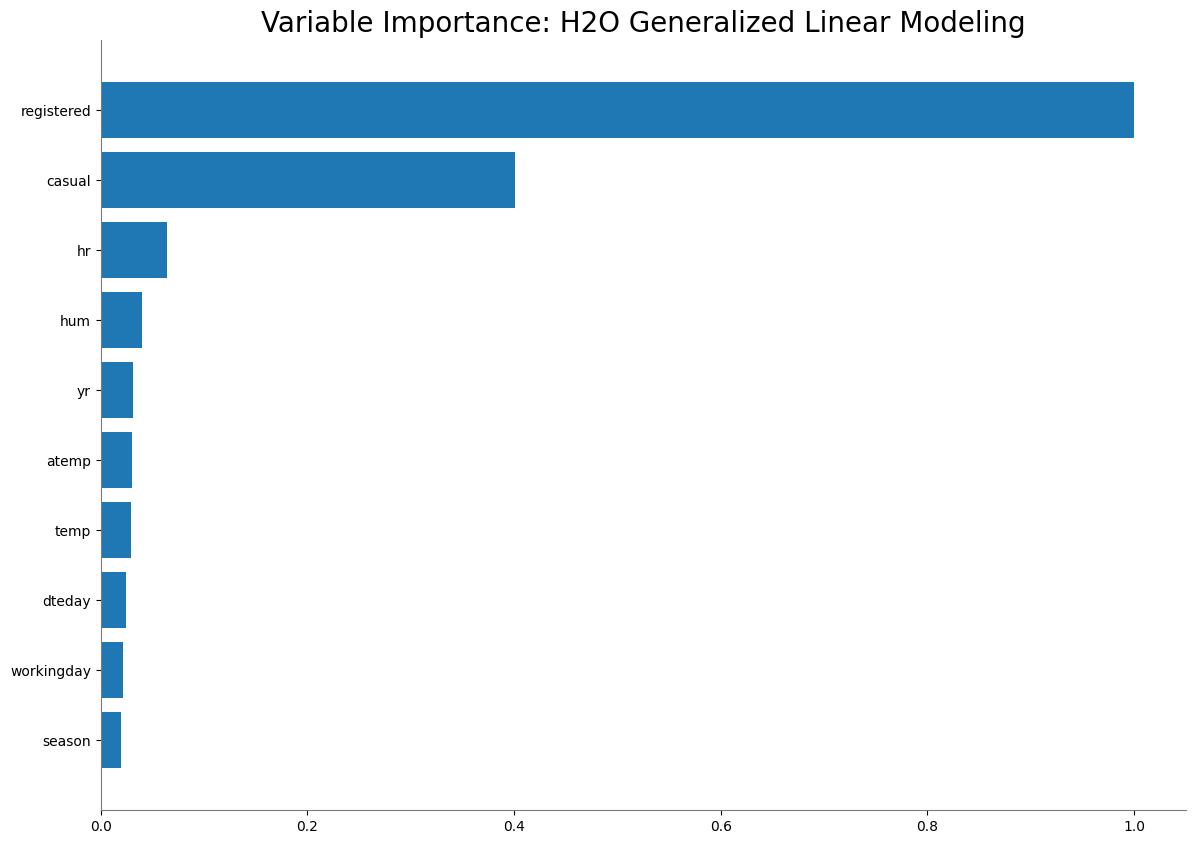

<Figure size 640x480 with 0 Axes>

In [13]:
glm.varimp_plot()

In [14]:
glm_per = glm.model_performance(test)

In [15]:
# Test metrics
print("GLM Test R^2: ", glm_per.r2())
print("GLM Test RMSE: ", glm_per.rmse())
print("GLM Test MAE: ", glm_per.mae())

GLM Test R^2:  0.9801627265491816
GLM Test RMSE:  25.86049849462335
GLM Test MAE:  18.651847146623734


In [16]:
# Test actual cnt and predicted cnt by GLM model comparison
glm_pred = glm.predict(test)
test_cnt_pred = test['cnt'].cbind(glm_pred)
test_cnt_pred

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


cnt    predict
-----  ---------
   36    39.1436
  106   106.589
   28    41.0492
   39    55.6457
    8    11.1764
   20    21.0802
    9    29.5589
    8    28.302
   30    29.267
   88    83.0128
[3419 rows x 2 columns]

## __2. H2OAutoML model on Hourly Data__

In [19]:
# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, 
                seed = 42)
%time aml.train(x=x, y=y, training_frame = train)

AutoML progress: |█
13:16:34.309: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
CPU times: total: 250 ms
Wall time: 1min 53s


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_3_AutoML_2_20240414_131634


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/5
# GBM base models (used / total)           1/1
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2.778573742137056
RMSE: 1.6669054388708004
MAE: 1.3428087569478924
RMSLE: NaN
Mean Residual Deviance: 2.778573742137056
R^2: 0.9999156186782389
Null degrees of freedom: 10016
Residual degrees of freedom: 10013
Null deviance: 329870738.9410951
Residual deviance: 27832.973174986888
AIC: 38673.765052579765

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 4.446195961071688
RMSE: 2.1086004745023863
MAE: 1.617459509413364
RMSLE: NaN
Mean Residual Deviance: 4.446195961071688
R^2: 0.9998640325854492
Null degrees of freedom: 13959
Residual degrees of freedom: 13956
Null deviance: 456652381.2133148
Residual deviance: 62068.89561656077
AIC: 60455.766356853106

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     12097.9      215.833      12286.2       12134.6       12257.5       12064         11747.3
loglikelihood           0            0            0             0             0             0             0
mae                     1.61772      0.0199843    1.62477       1.61878       1.60935       1.59067       1.64502
mean_residual_deviance  4.44839      0.149656     4.52323       4.42685       4.32327       4.30363       4.66498
mse                     4.44839      0.149656     4.52323       4.42685       4.32327       4.30363       4.66498
null_deviance           9.13305e+07  2.00162e+06  9.06274e+07   9.19926e+07   9.42094e+07   8.87329e+07   9.109e+07
r2                      0.999864     3.84248e-06  0.999859      0.999865      0.999869      0.999864      0.999863
residual_deviance       12413.8      258.03       12773.6       12408.5       12308.4       12071.7       12506.8
rmse                    2.10888      0.0353619    2.12679       2.10401       2.07925       2.07452       2.15986
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      rmse          mse        mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ---------  -----------  ---------  -----------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_3_AutoML_2_20240414_131634    1.79852      3.23469    1.41497  nan                           3.23469                 258                   0.008995  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20240414_131634       1.81046      3.27778    1.41742  nan                           3.27778                 288                   0.016388  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240414_131634       1.83228      3.35727    1.43296  nan                           3.35727                 578                   0.041797  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20240414_131634    1.85816      3.45277    1.45573  nan                           3.45277                 245                   0.009727  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20240414_131634    2.053        4.21482    1.63076  nan                           4.21482                 318                   0.017264  StackedEnsemble
DeepLearning_1_AutoML_2_20240414_131634                    3.17889     10.1054     2.51464  nan                          10.1054                  341                   0.000859  DeepLearning
GBM_grid_1_AutoML_2_20240414_131634_model_1                3.19877     10.2321     1.92361    0.0292635                  10.2321                  722                   0.006333  GBM
GLM_1_AutoML_2_20240414_131634                             3.27695     10.7384     2.34951    0.123061                   10.7384                   21                   0.000219  GLM
GBM_3_AutoML_2_20240414_131634                             3.75509     14.1007     2.33794    0.0444552                  14.1007                 1480                   0.006725  GBM
GBM_2_AutoML_2_20240414_131634                             3.89961     15.207      2.49002    0.069015                   15.207                  1359                   0.007336  GBM
GBM_5_AutoML_2_20240414_131634                             4.57321     20.9143     2.95025    0.0719263                  20.9143                  561                   0.003997  GBM
GBM_4_AutoML_2_20240414_131634                             5.40477     29.2116     3.16316    0.053729                   29.2116                 1668                   0.006611  GBM
DRF_1_AutoML_2_20240414_131634                             6.86547     47.1346     3.8698     0.0840878                  47.1346                 1522                   0.00177   DRF
GBM_1_AutoML_2_20240414_131634                             7.40092     54.7737     4.00258  nan                          54.7737                 2997                   0.017733  GBM
XRT_1_AutoML_2_20240414_131634                             8.33472     69.4676     4.84084    0.105017                   69.4676                  851                   0.001043  DRF
GBM_grid_1_AutoML_2_20240414_131634_model_2               27.9362     780.431     21.6465     0.704431                  780.431                   294                   0.001225  GBM
DeepLearning_grid_1_AutoML_2_20240414_131634_model_1      29.1455     849.458     22.5947   nan                         849.458                   238                   0.000681  DeepLearning
GBM_grid_1_AutoML_2_20240414_131634_model_3              134.937    18208.1      105.031      1.39376                 18208.1                     114                   0.000301  GBM
GBM_grid_1_AutoML_2_20240414_131634_model_4              165.695    27454.9      129.311      1.51601                 27454.9                      15                   0.000202  GBM
[19 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

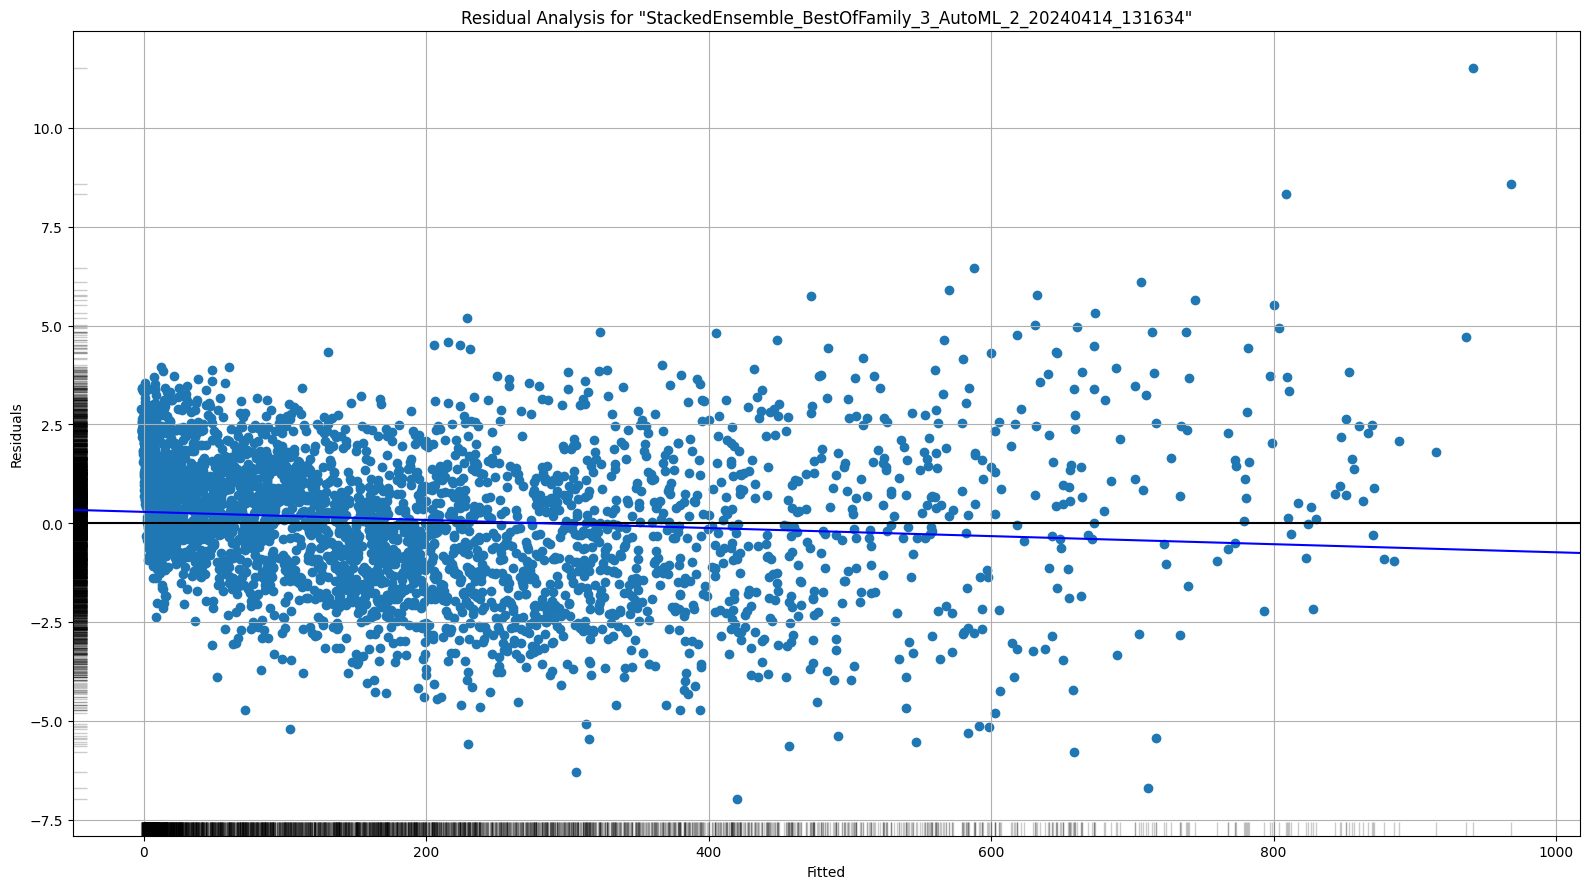

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

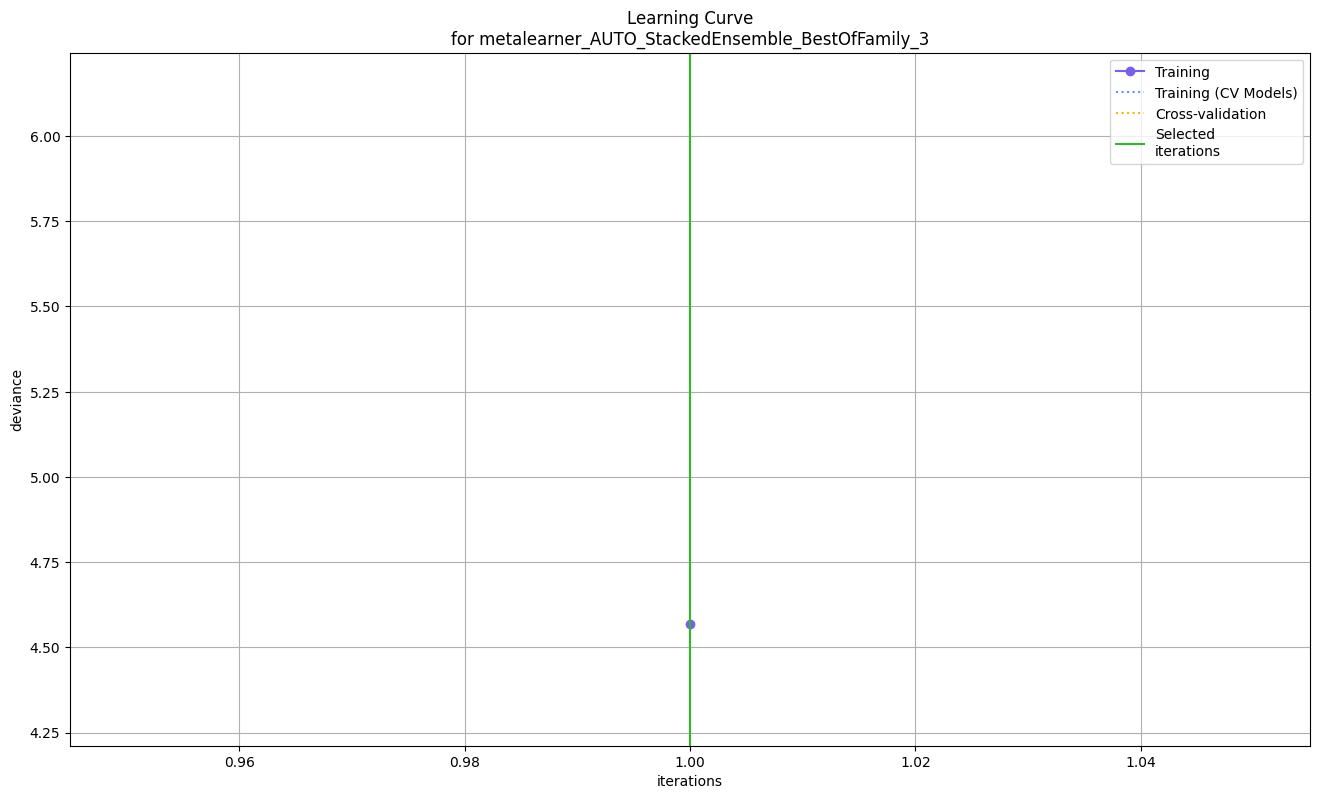

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

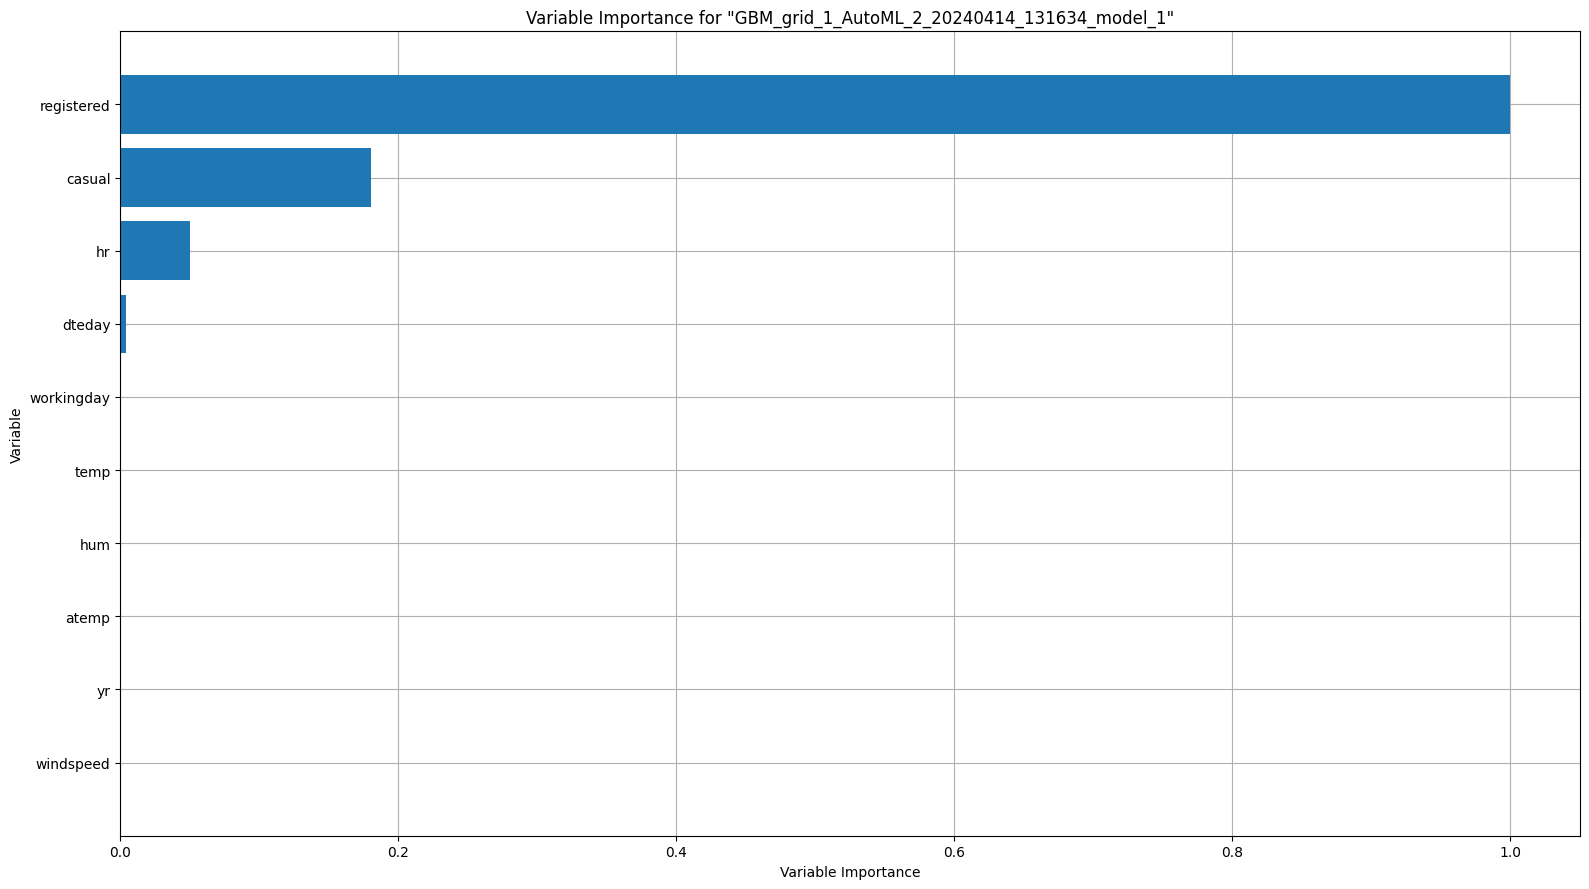

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

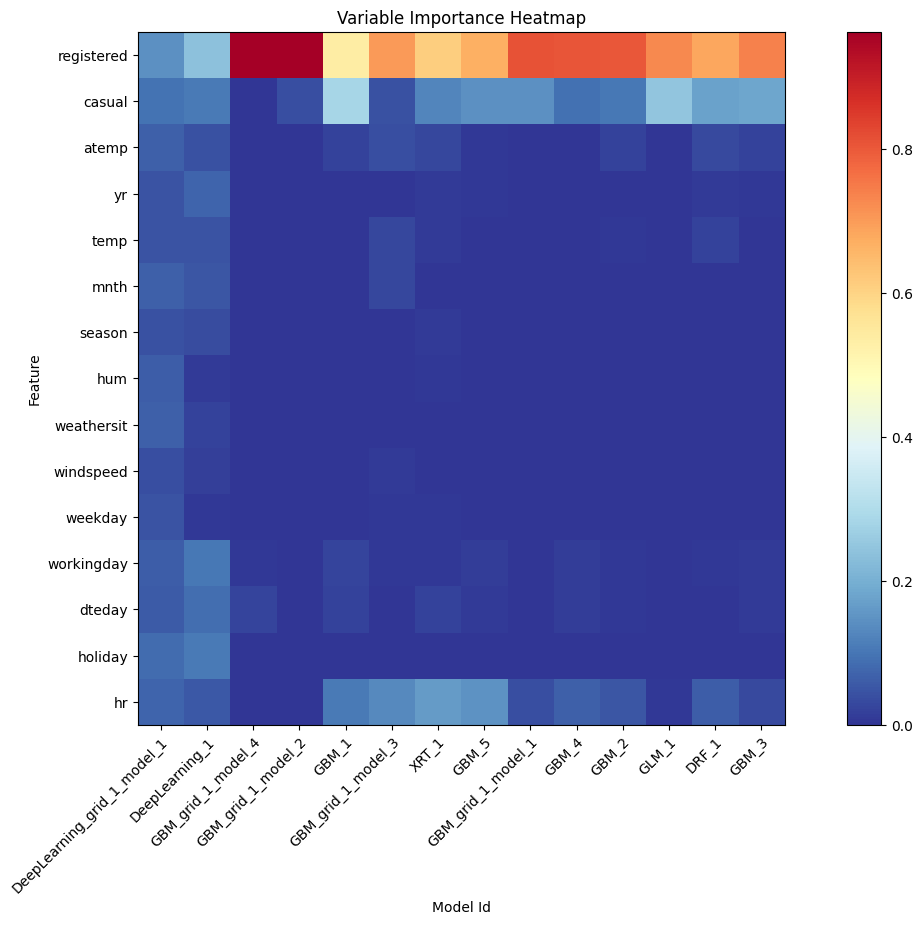

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

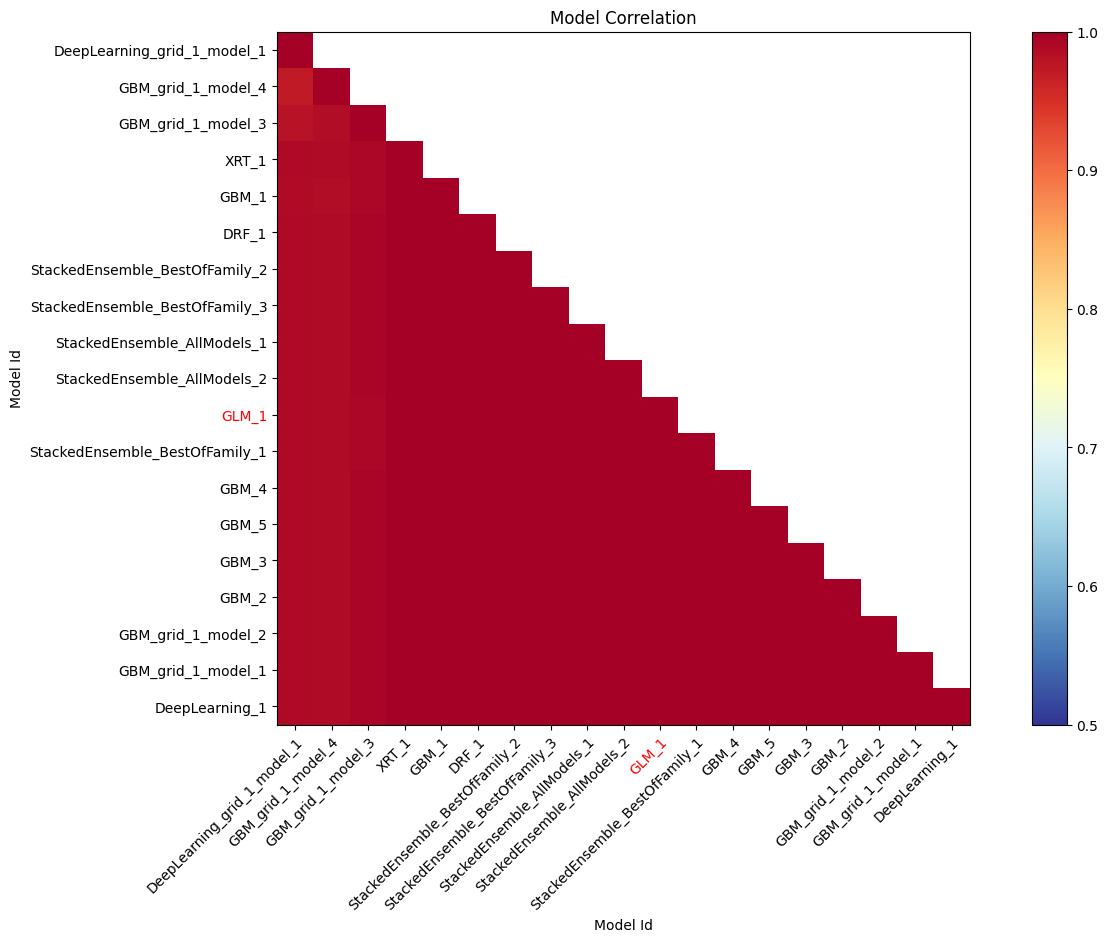

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

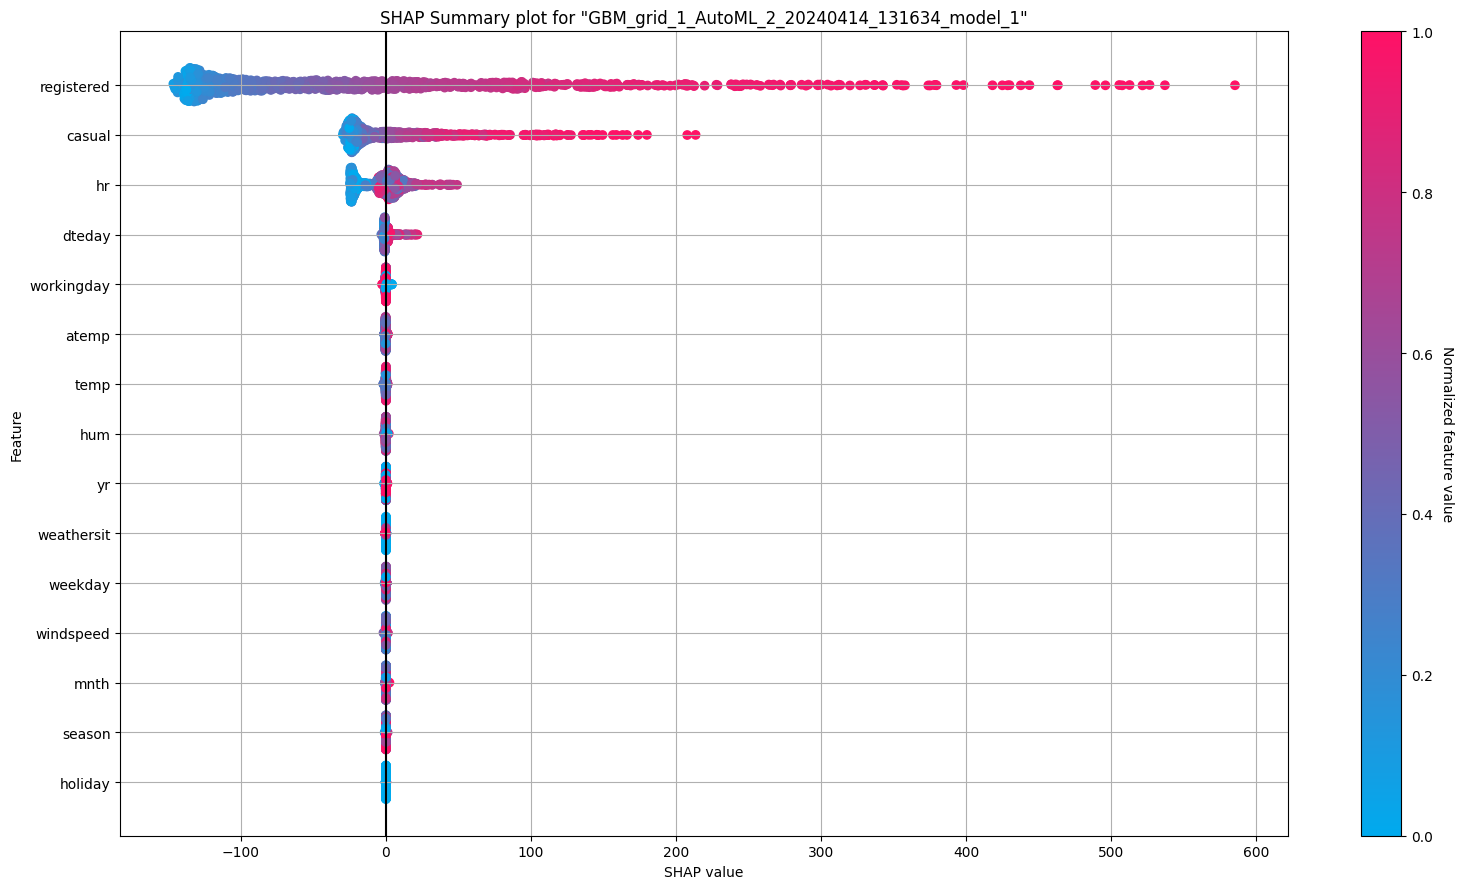

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

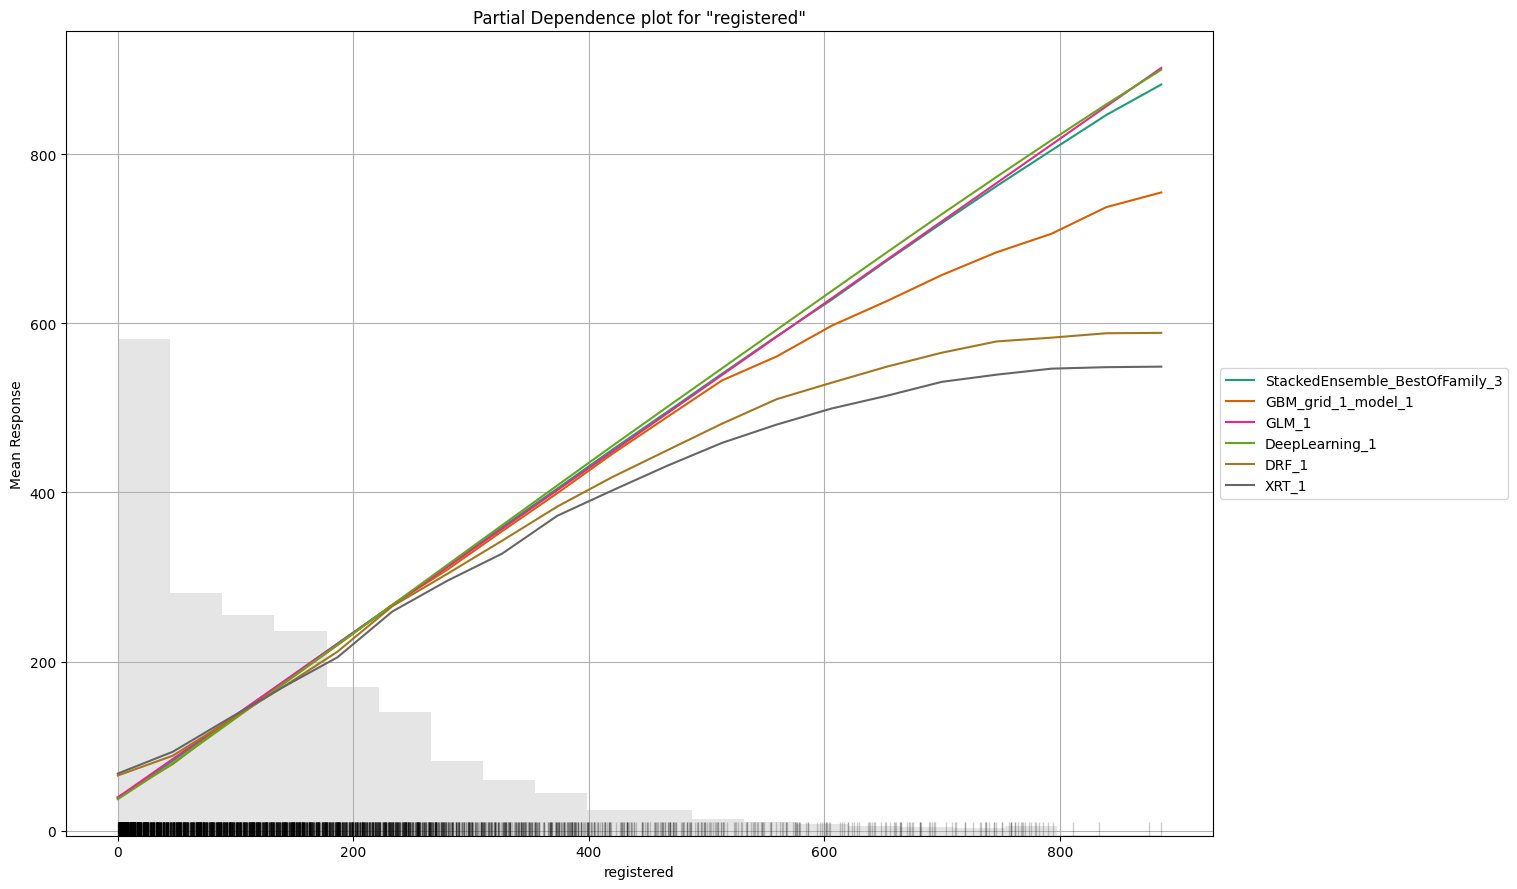

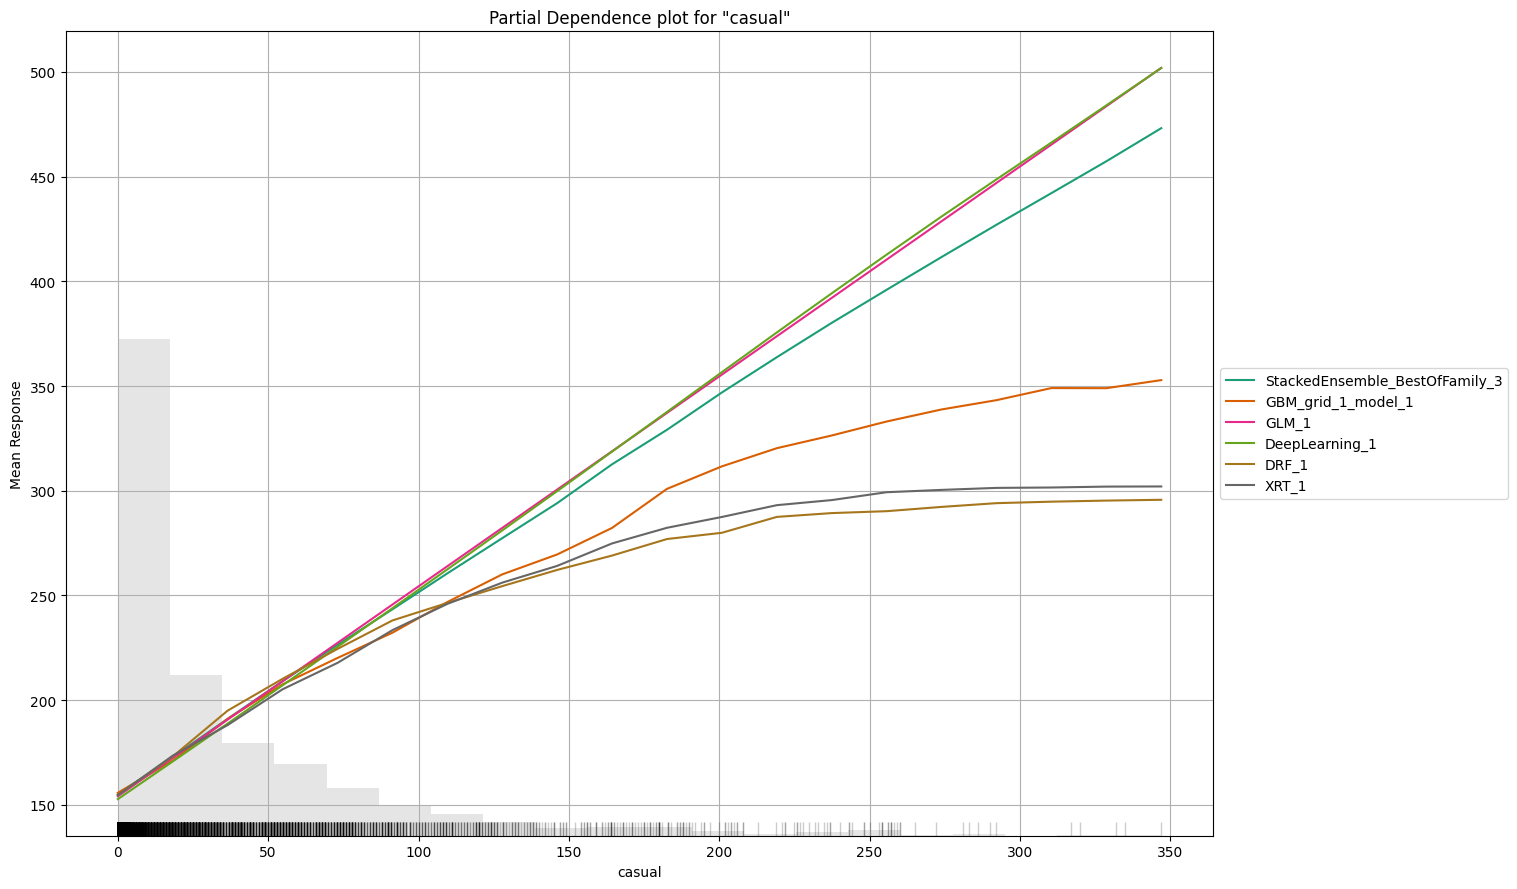

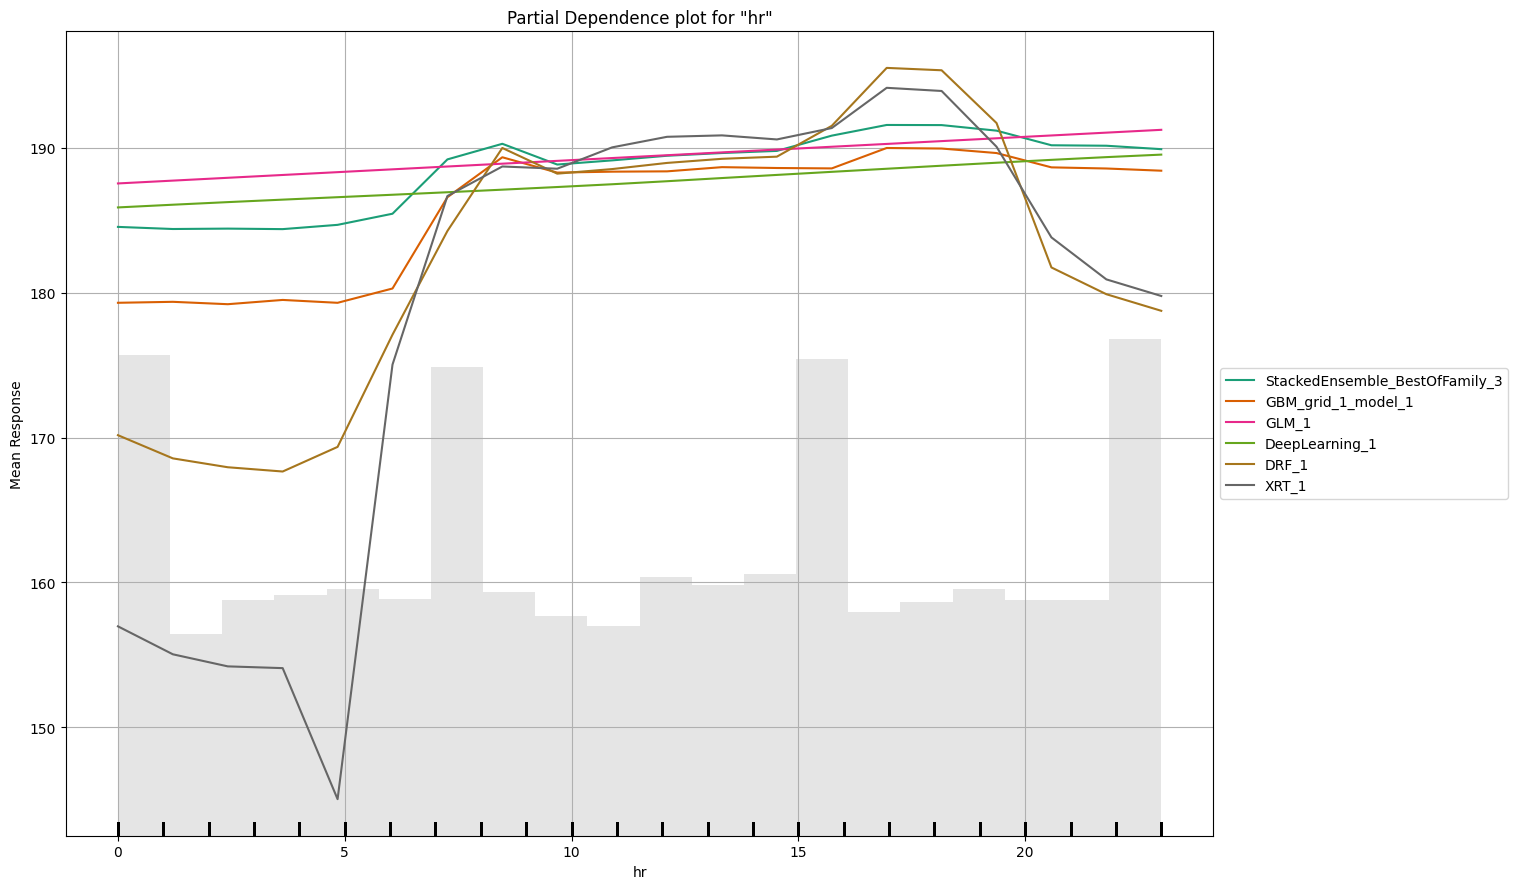

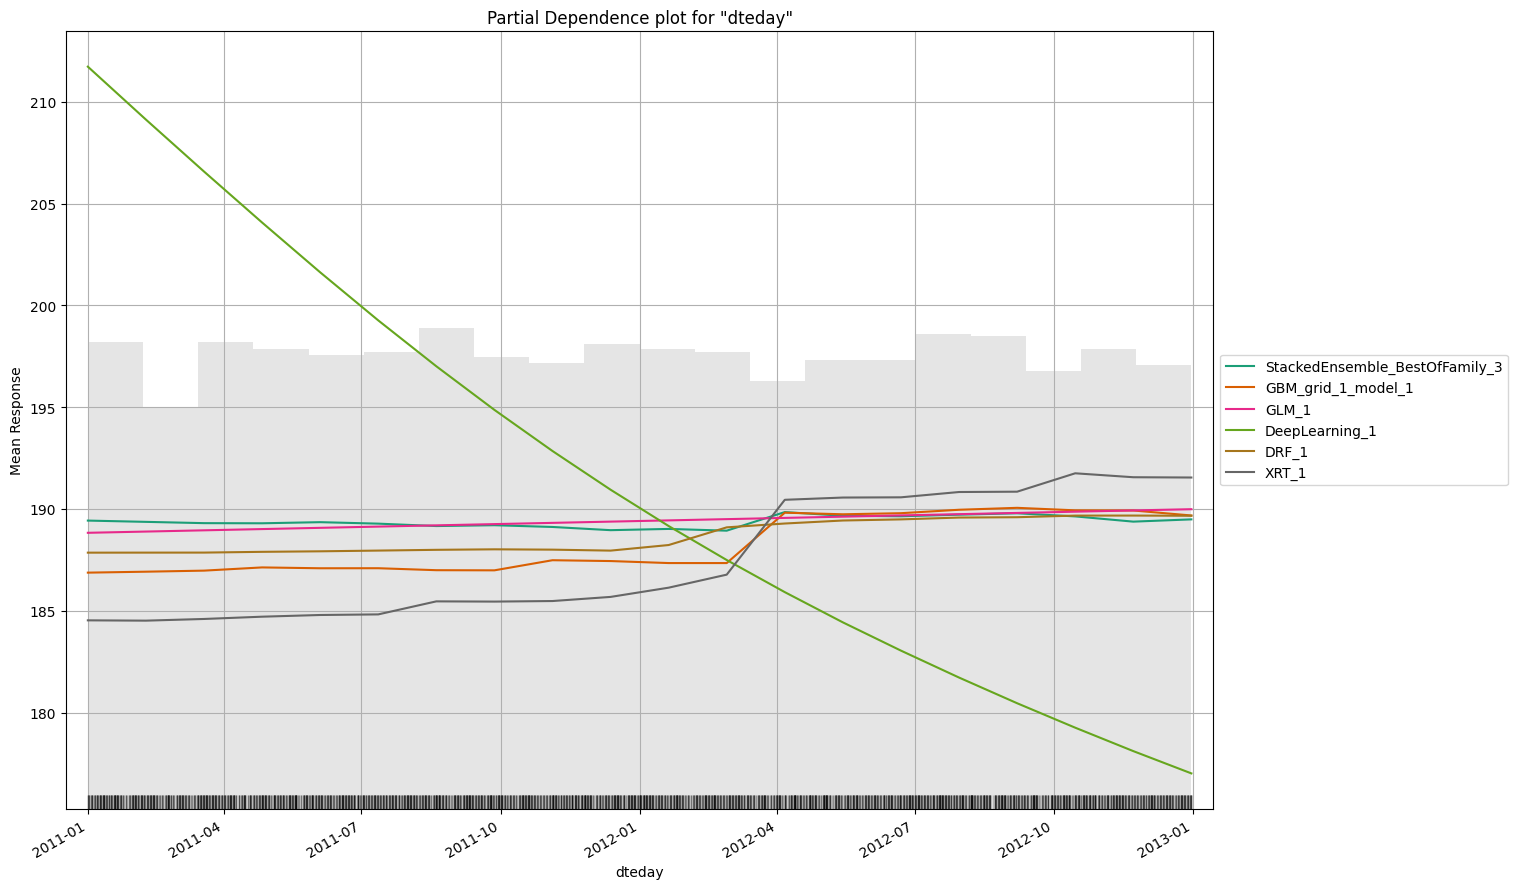

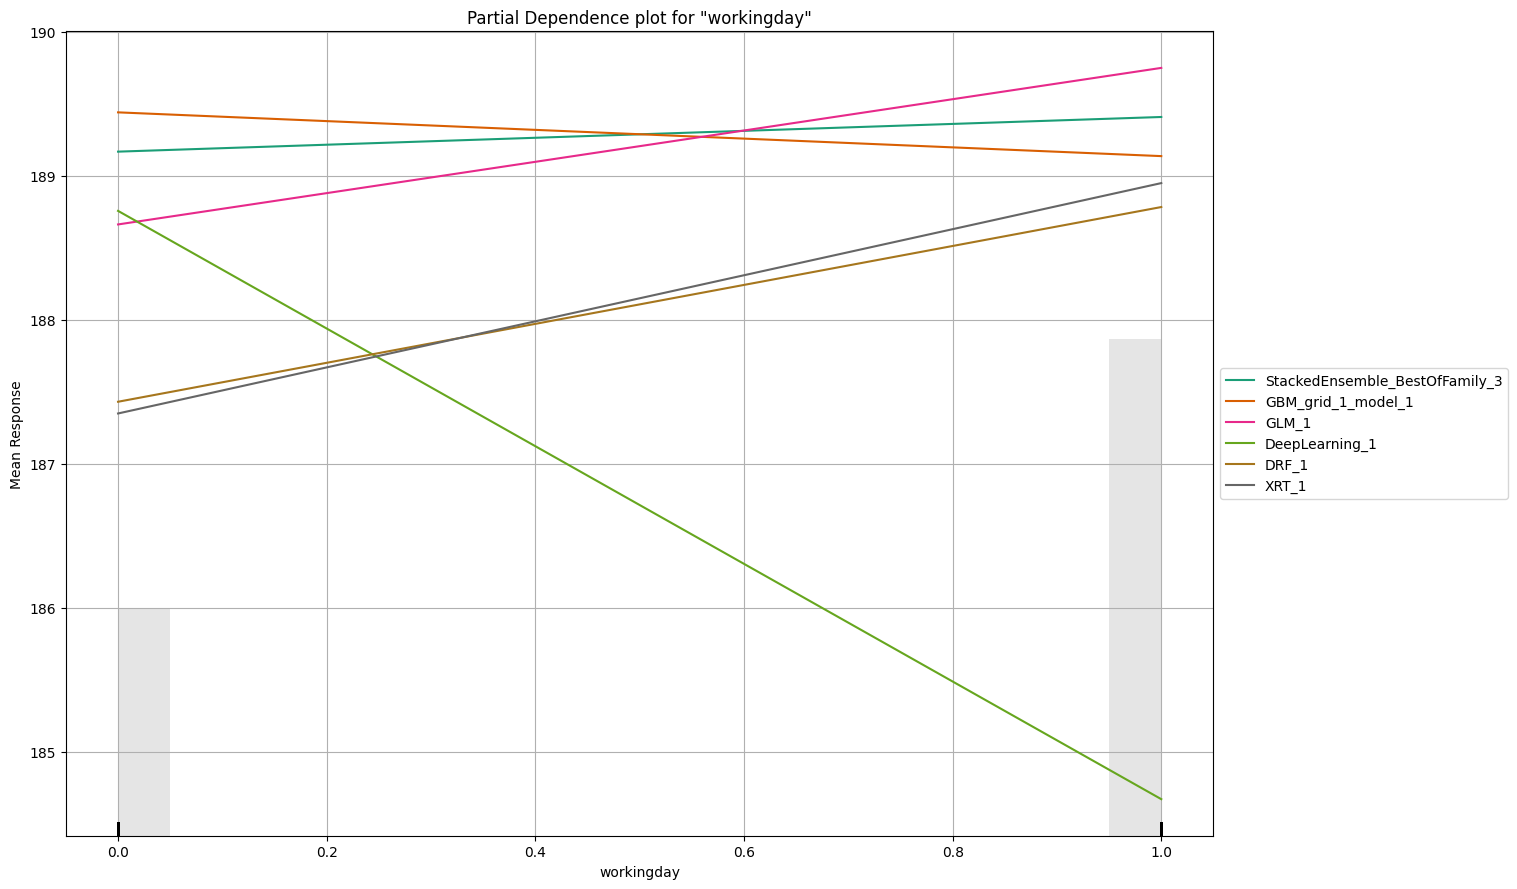

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

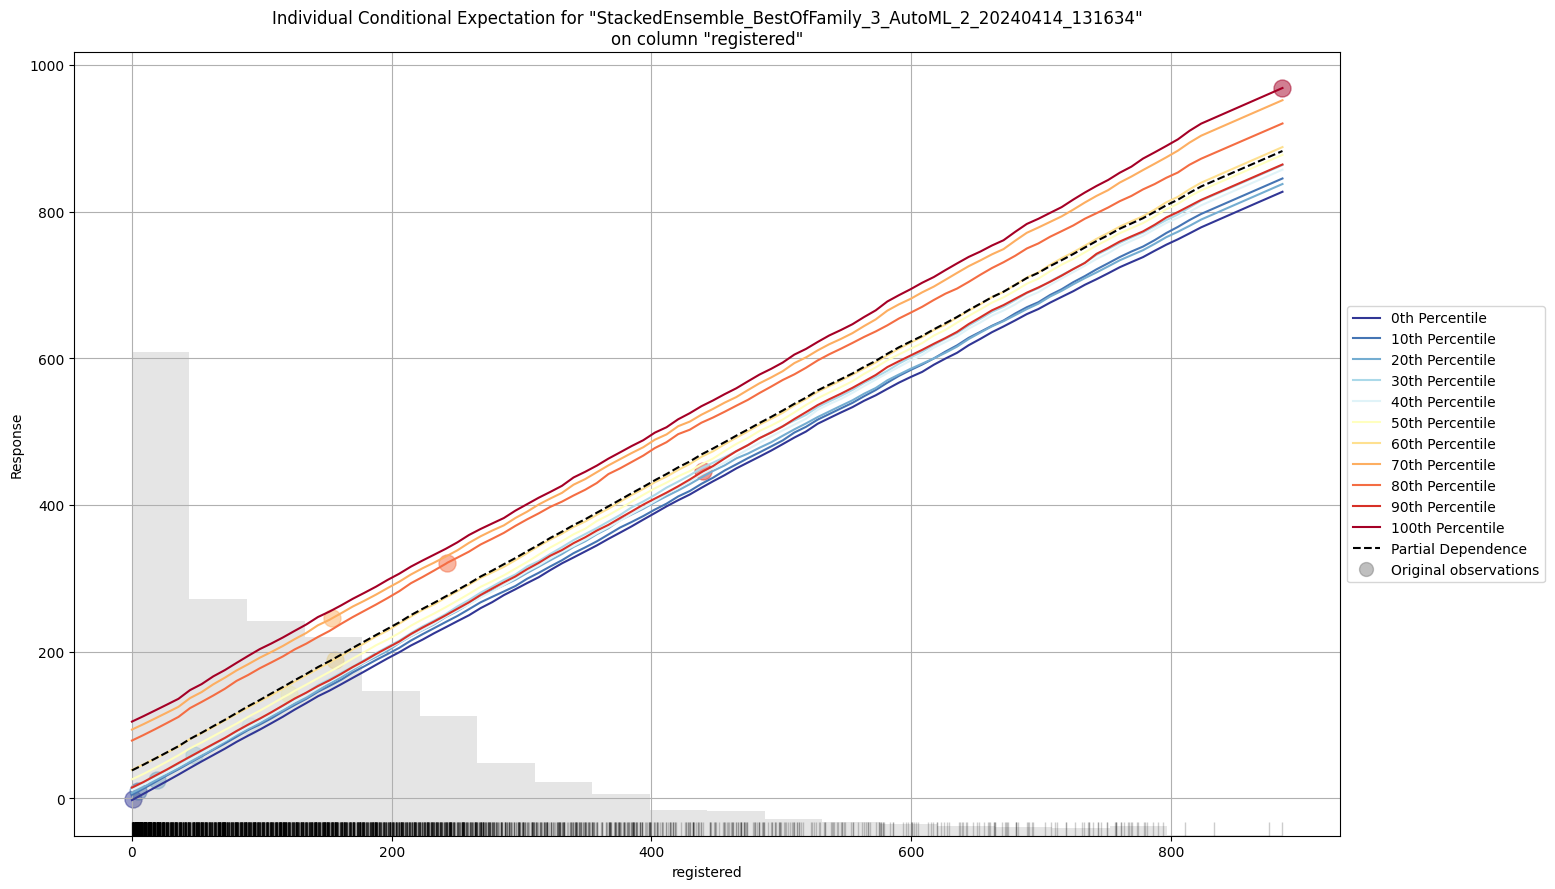

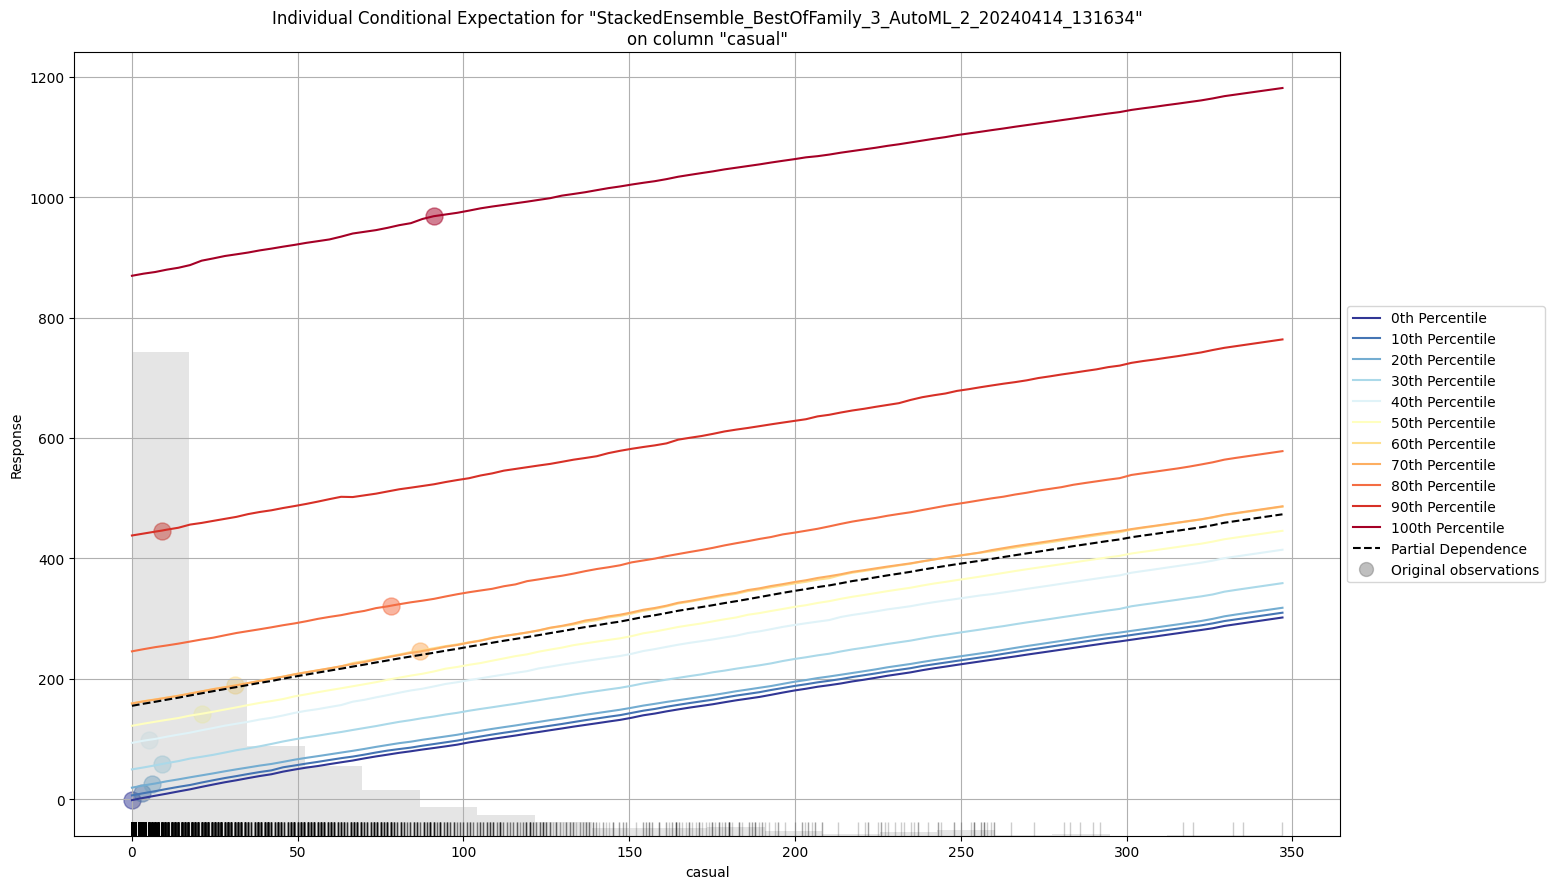

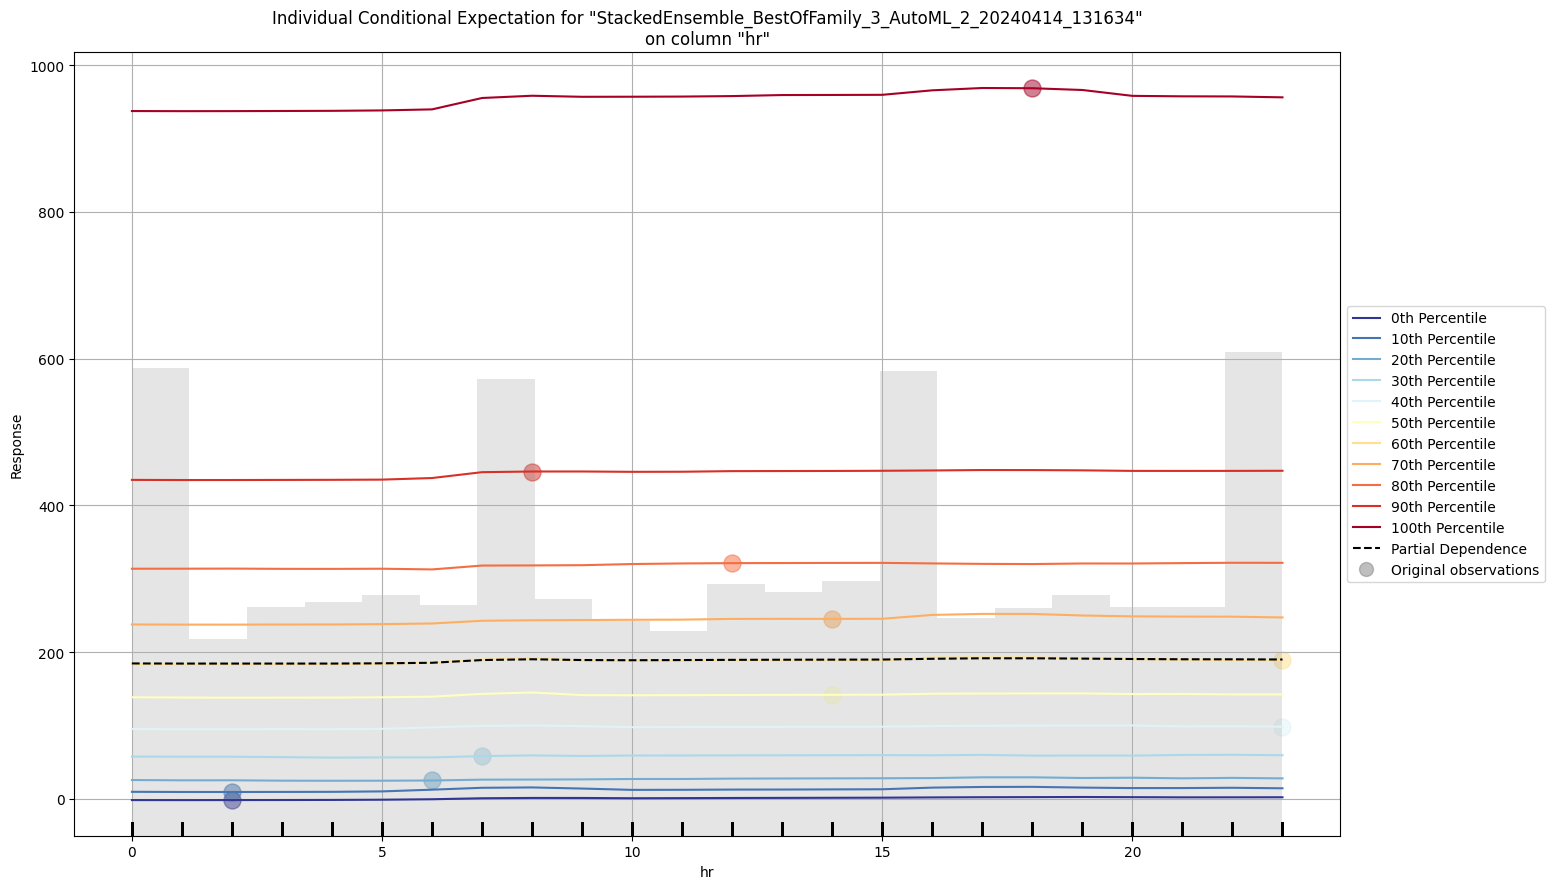

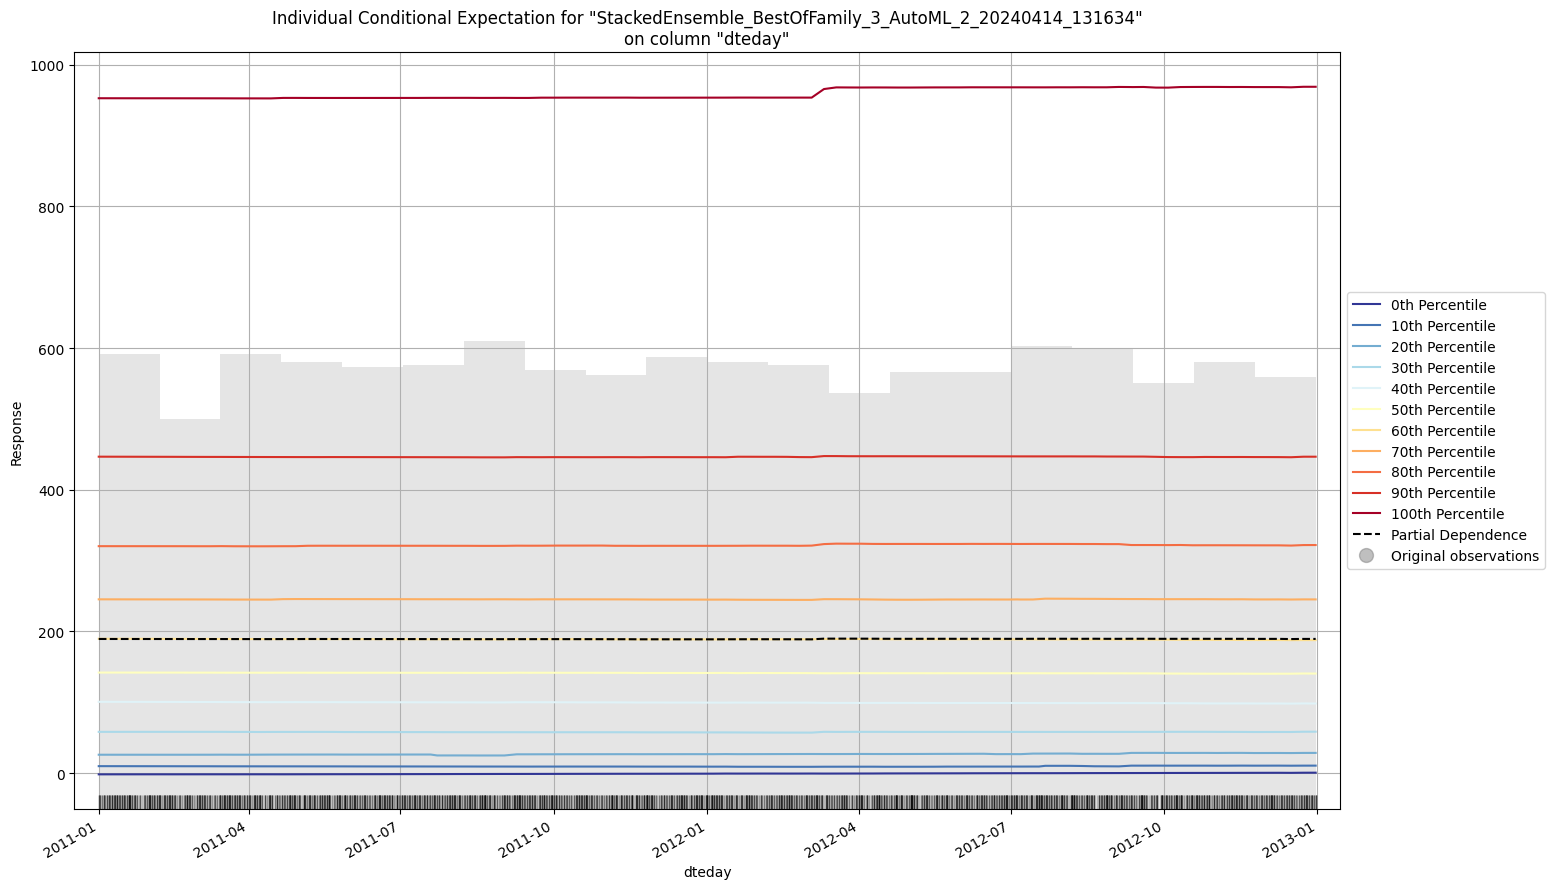

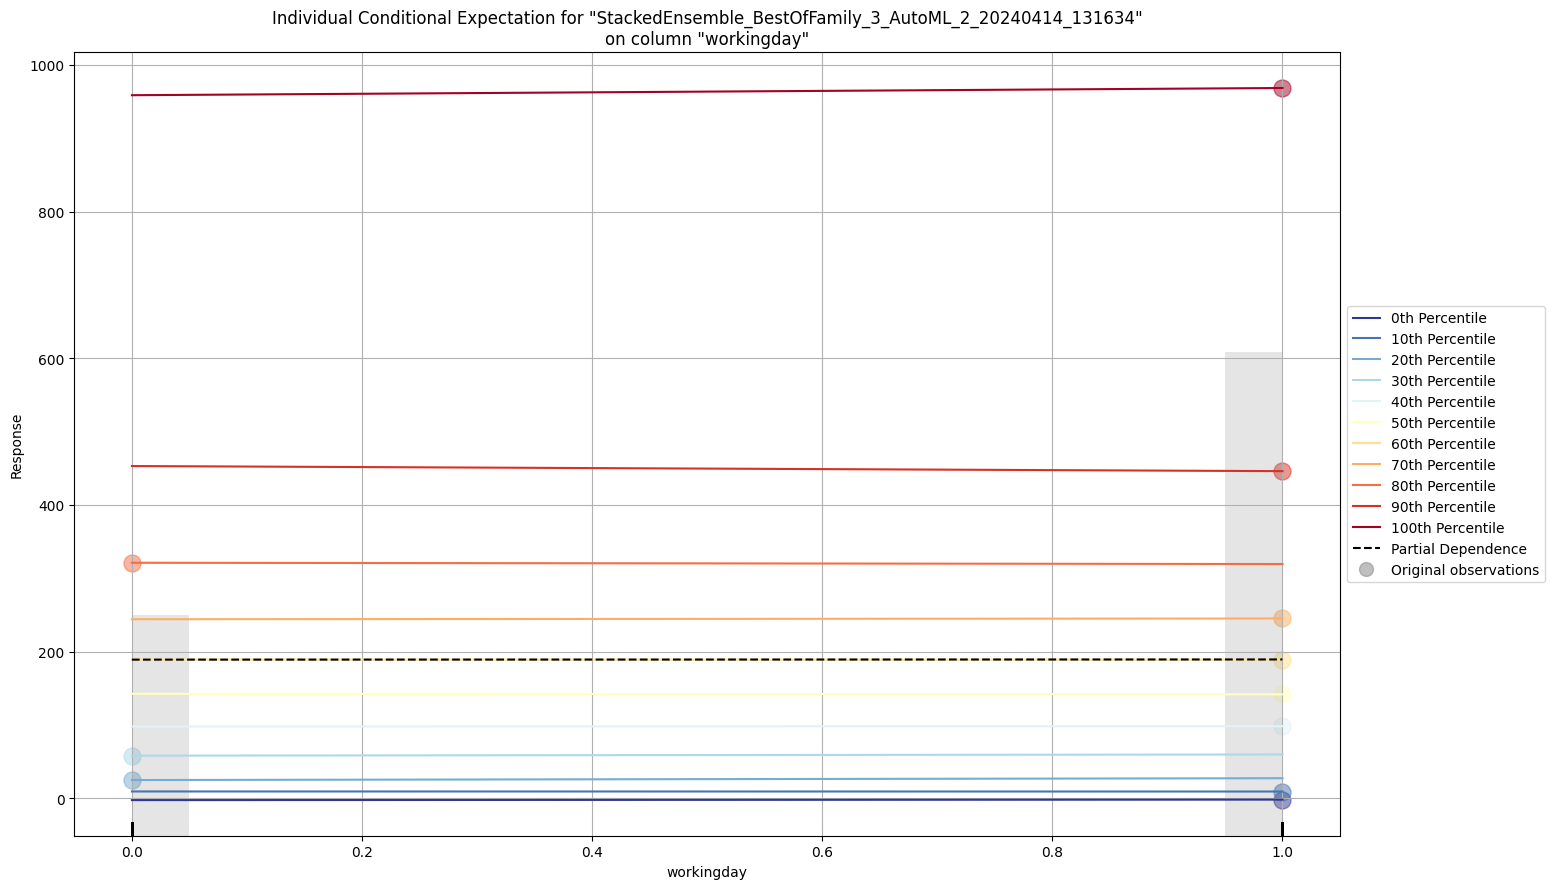

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

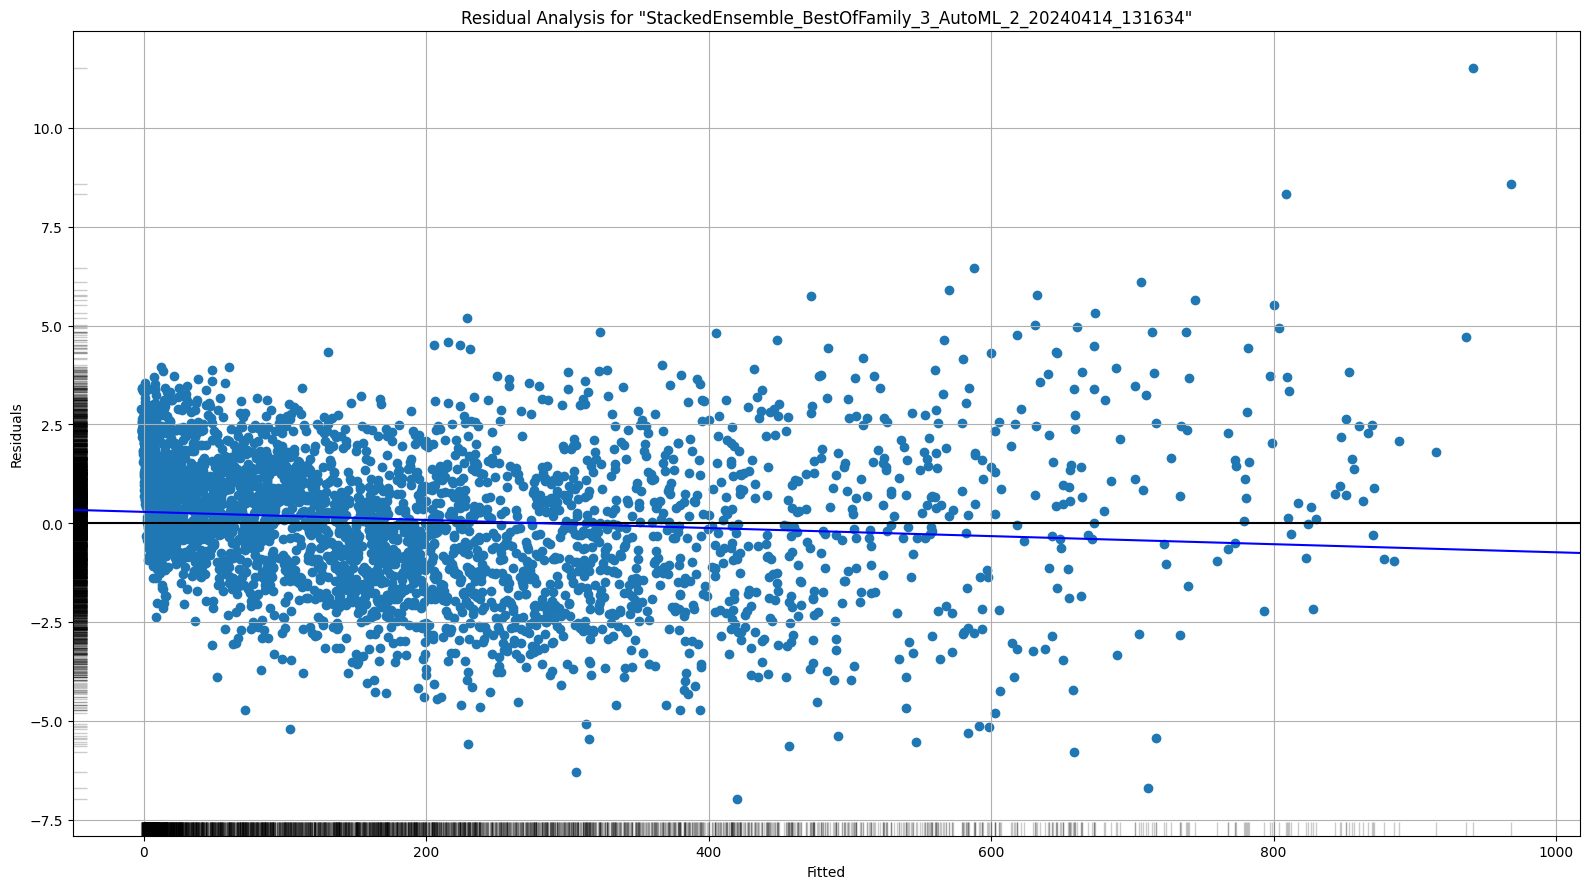

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

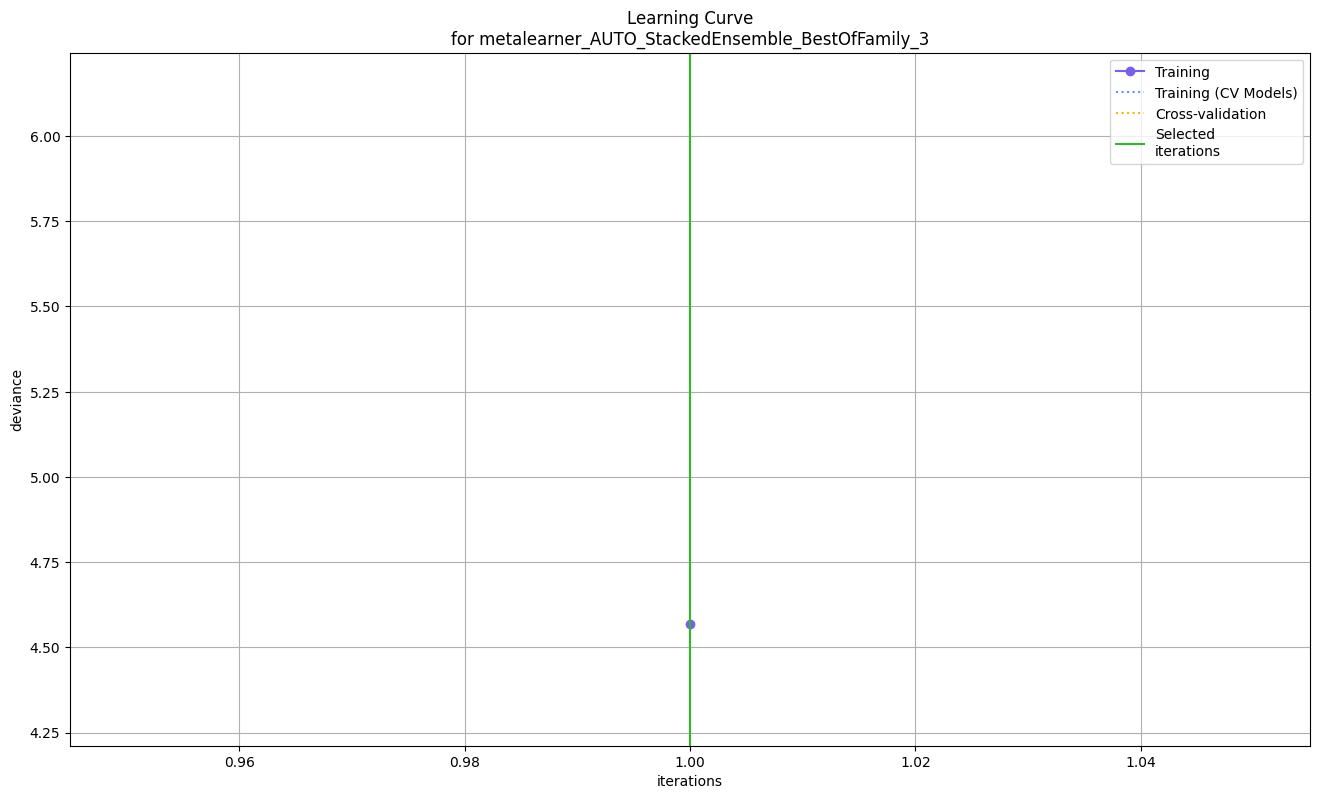

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

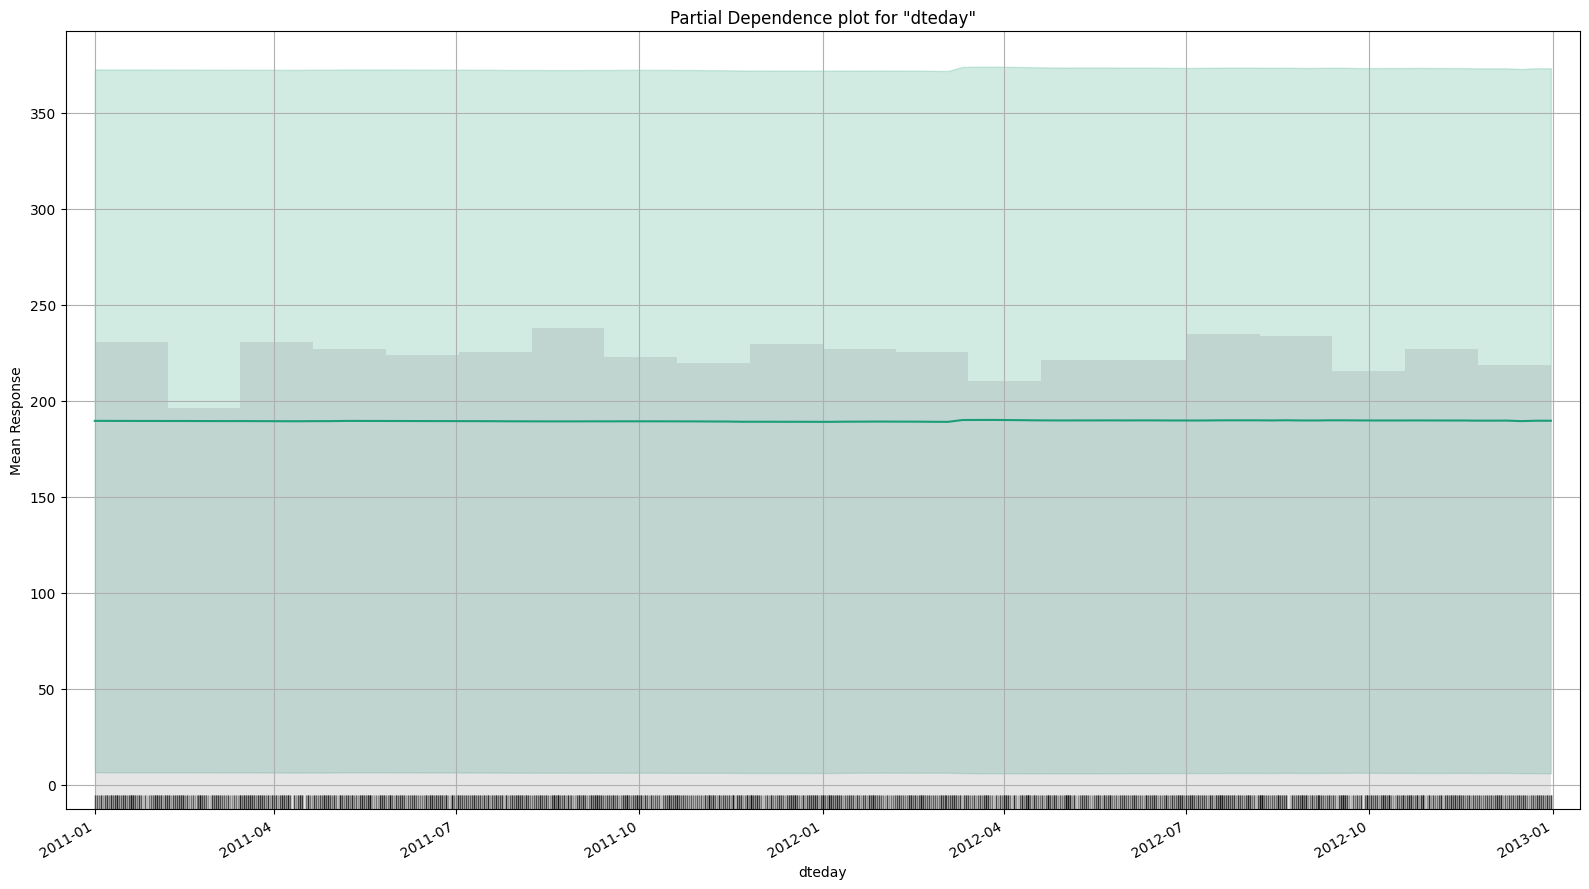

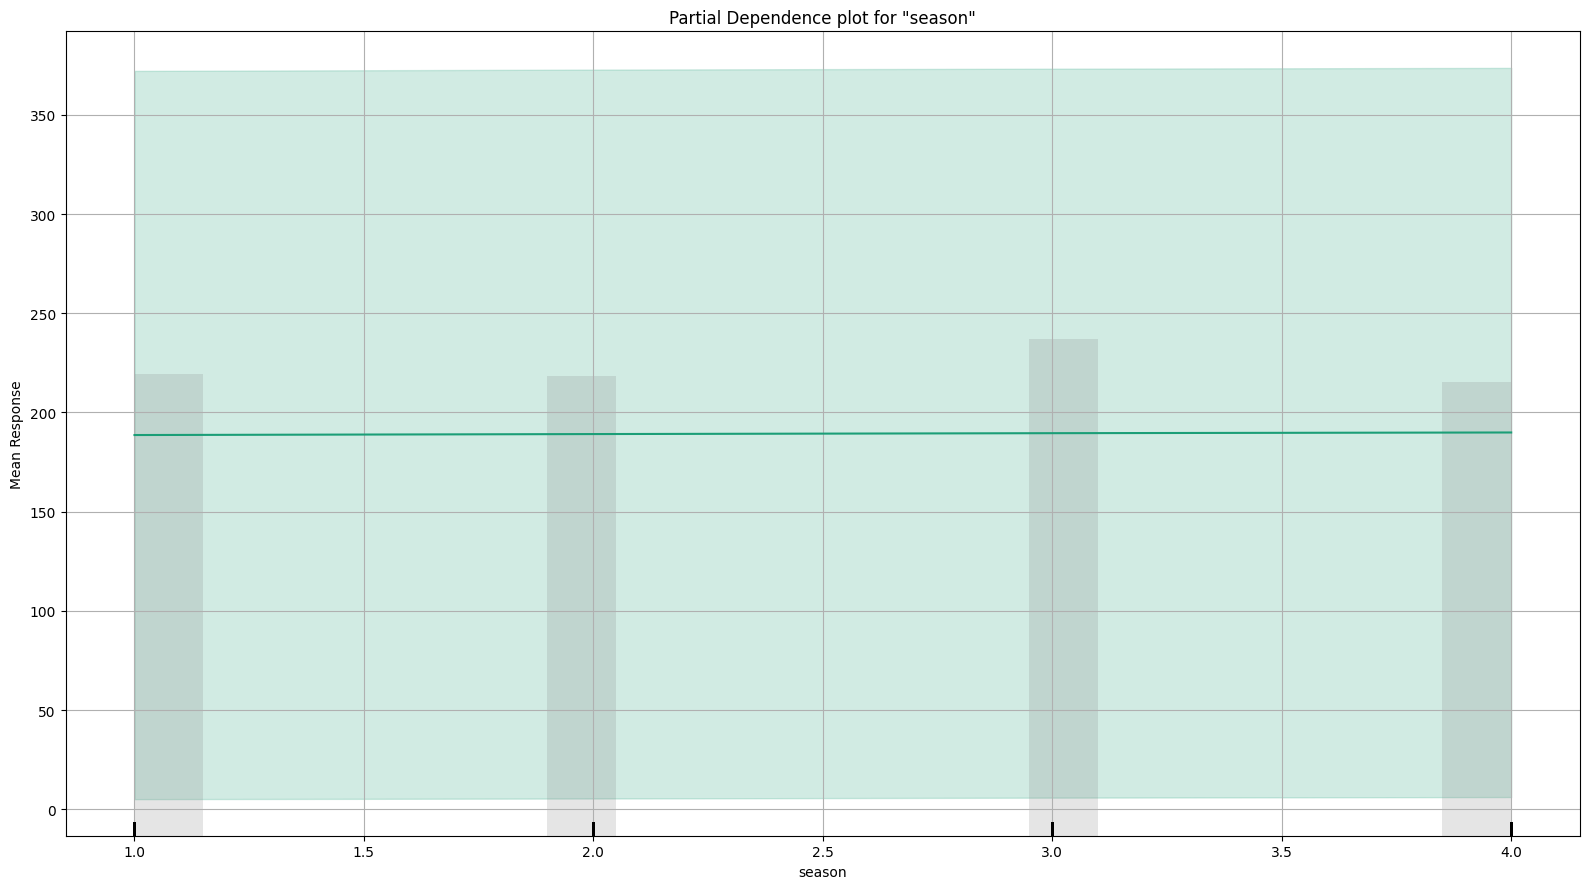

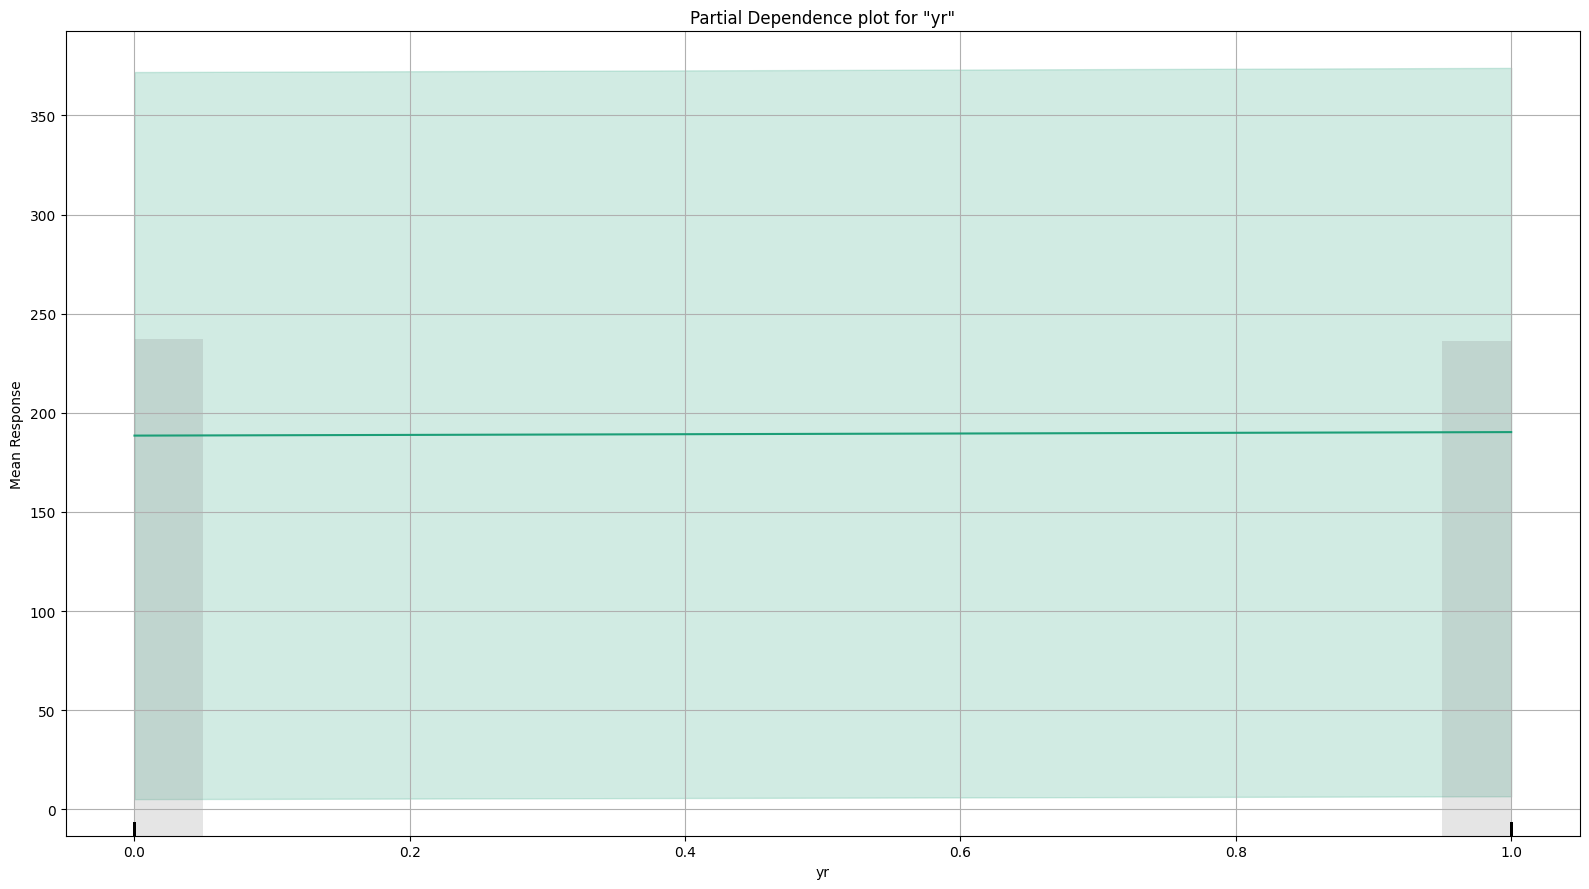

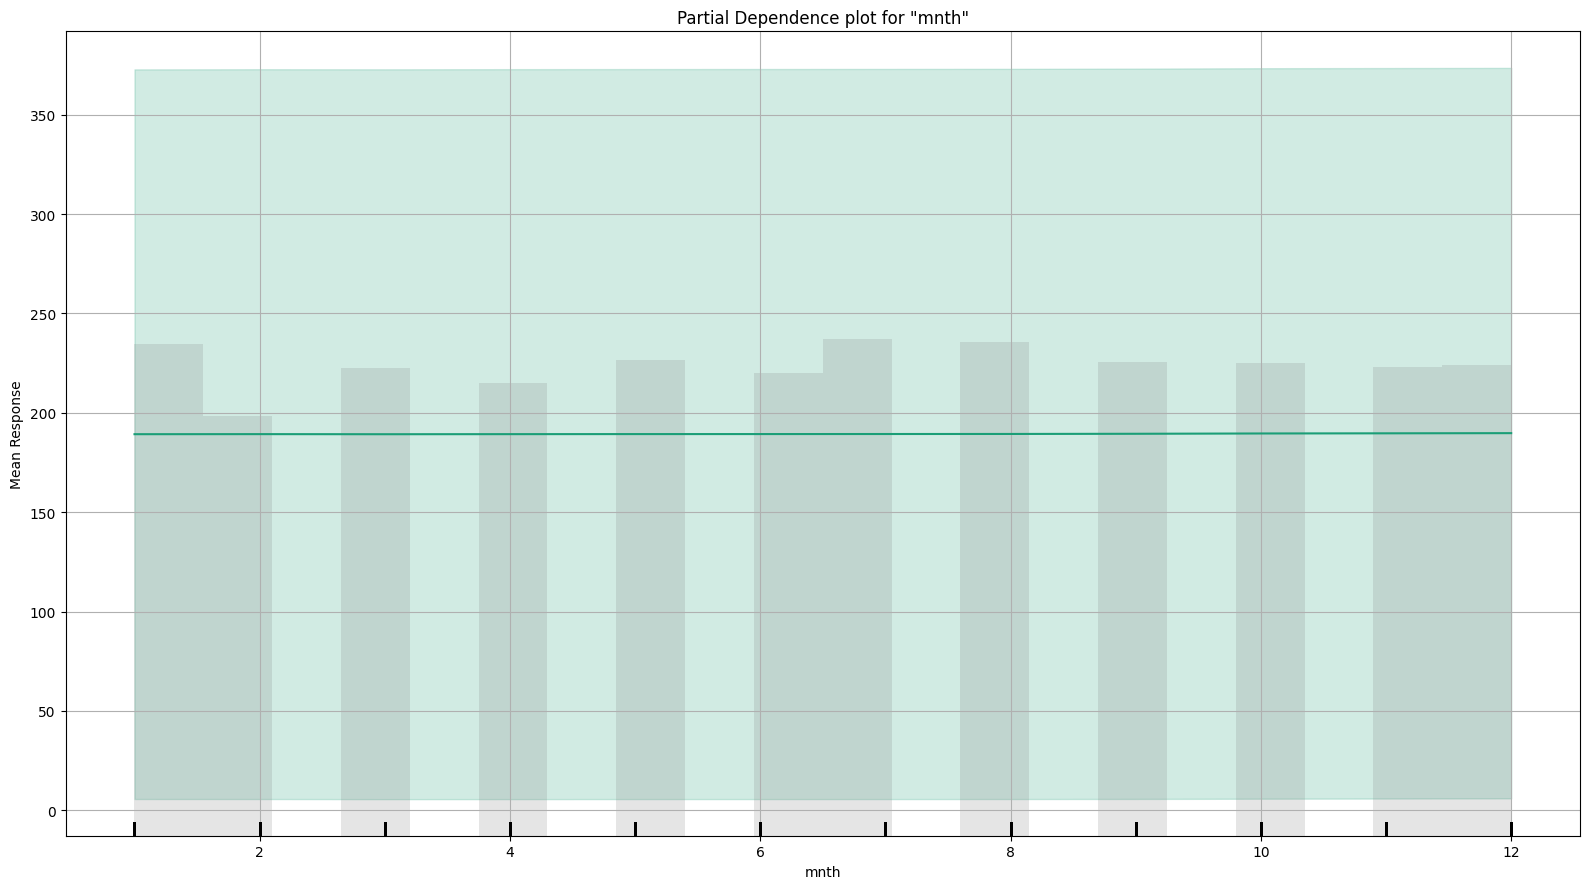

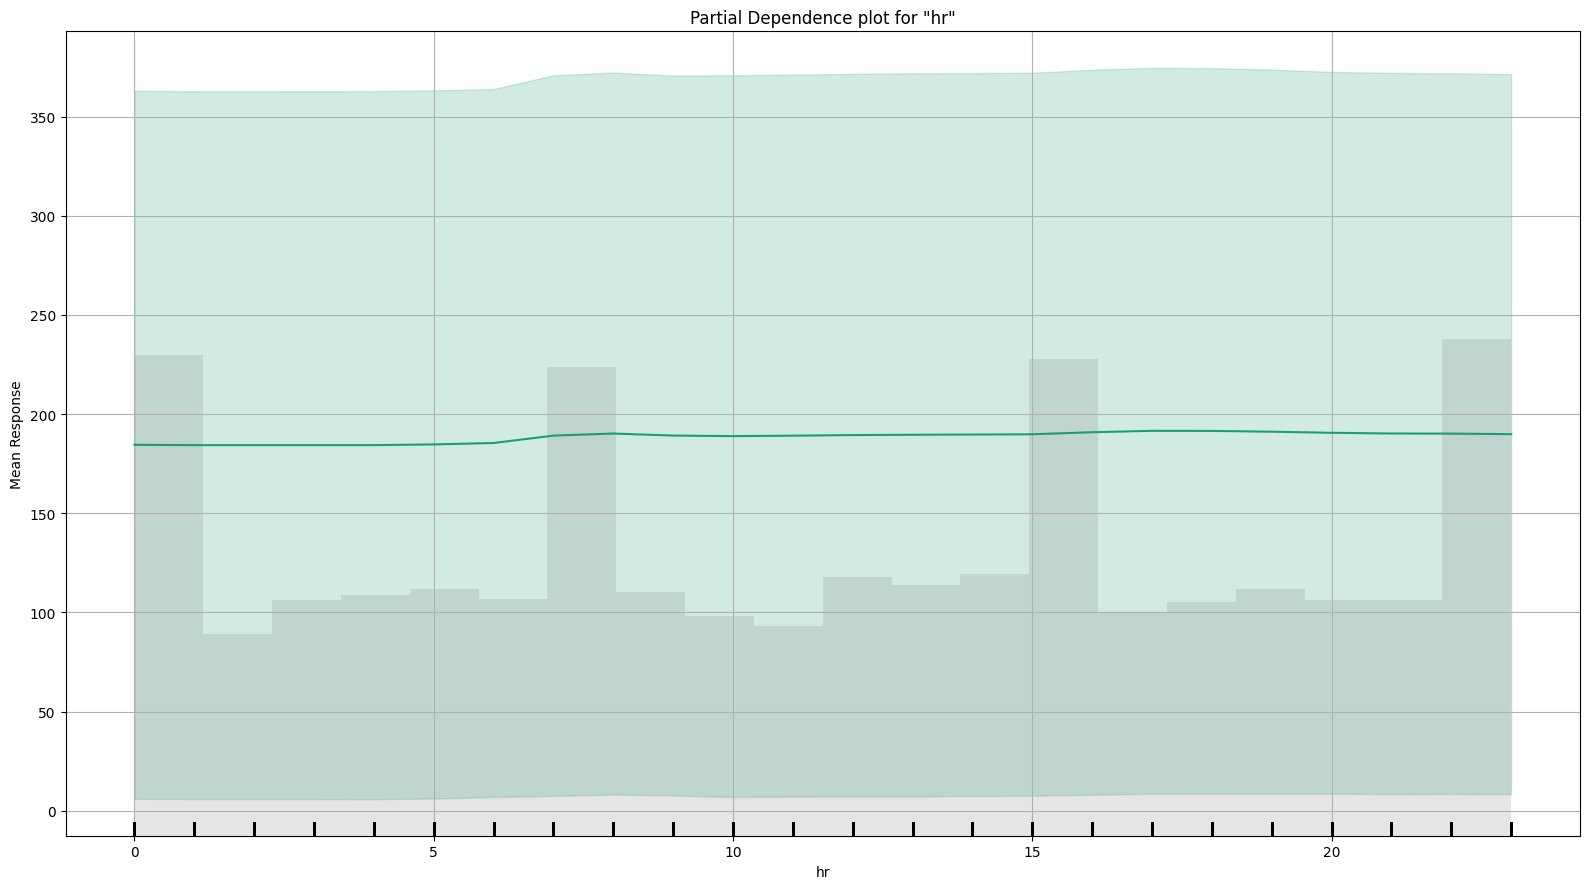

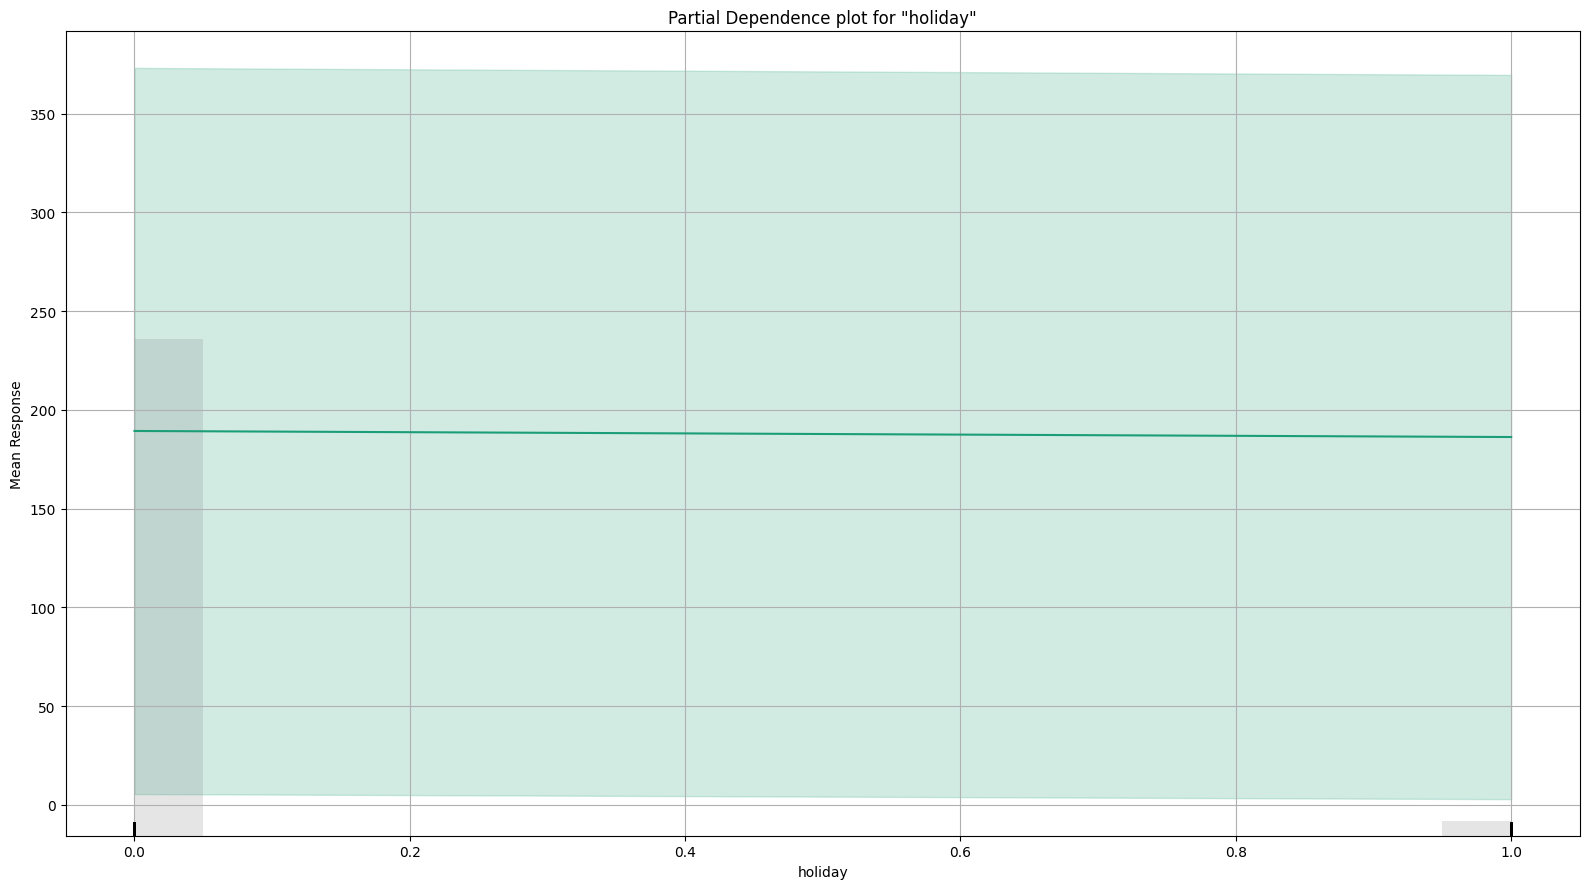

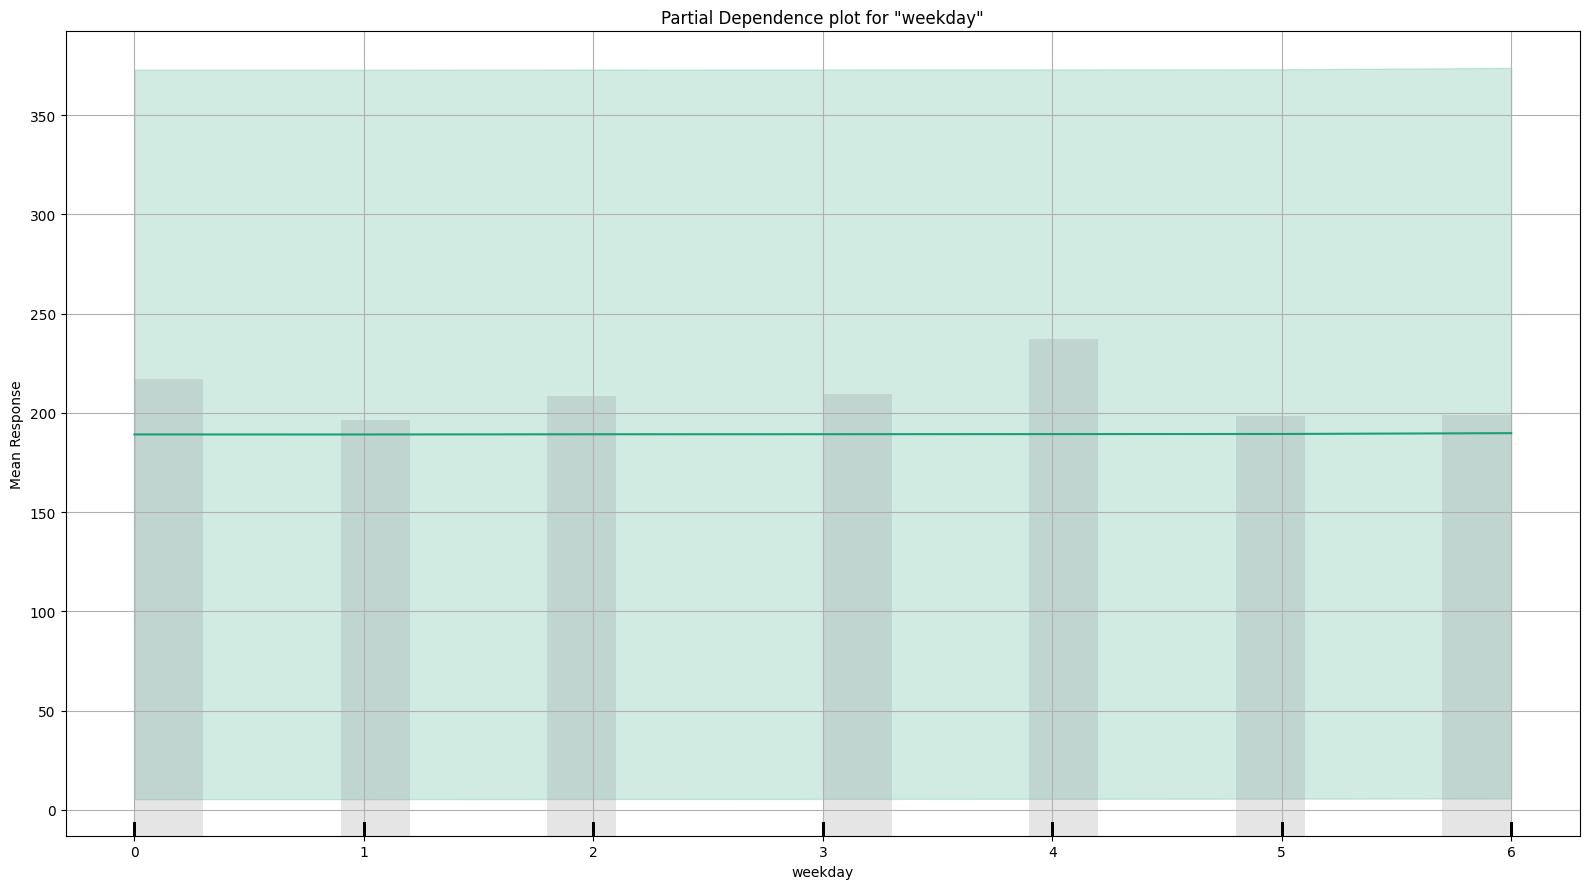

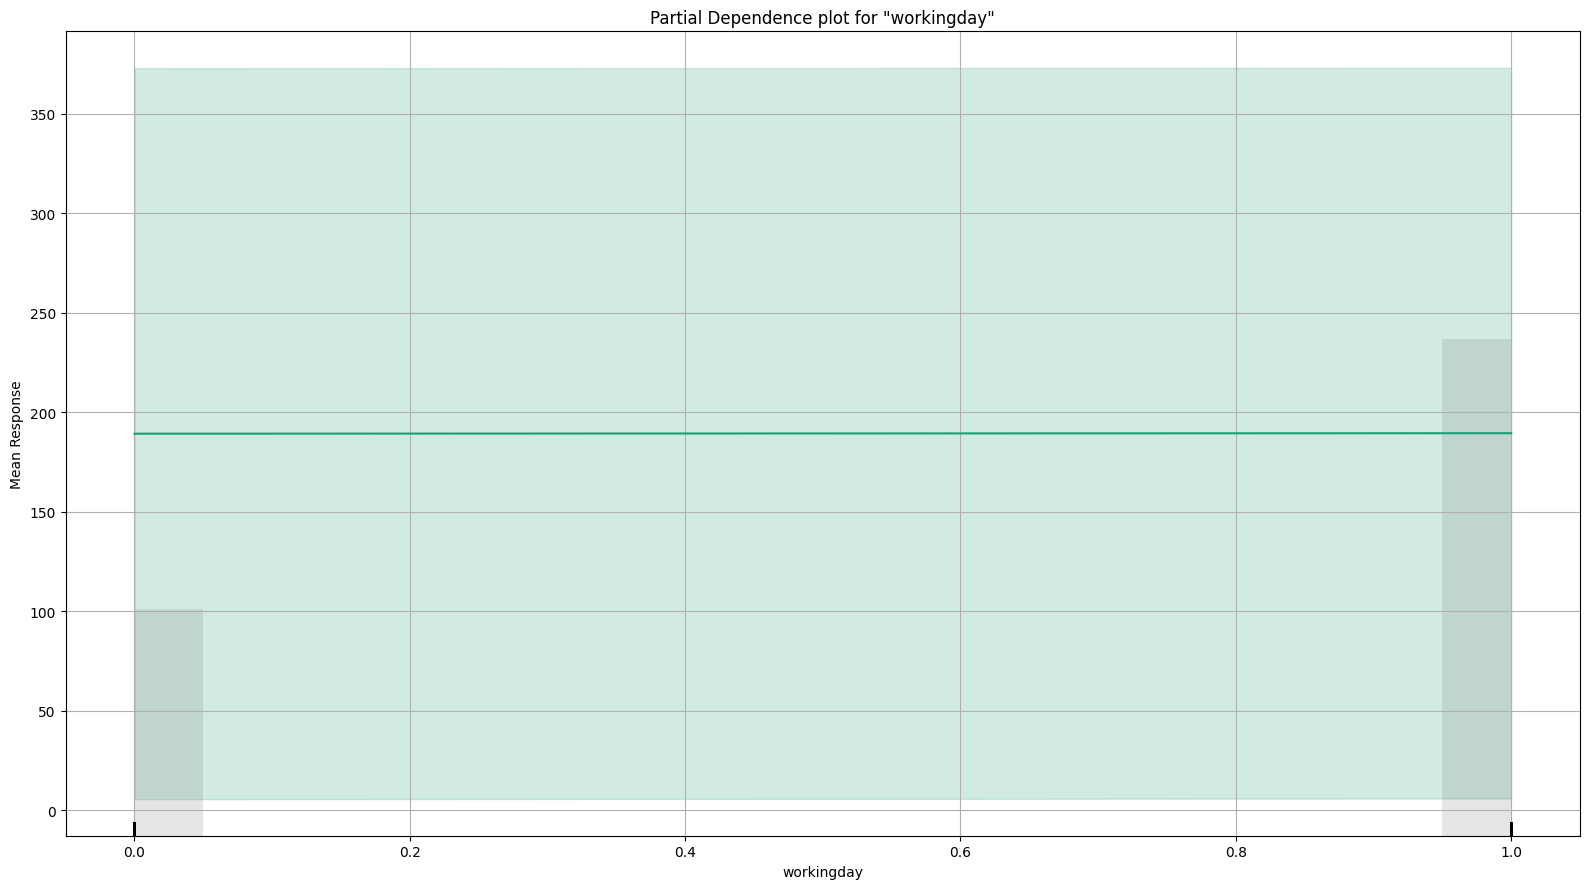

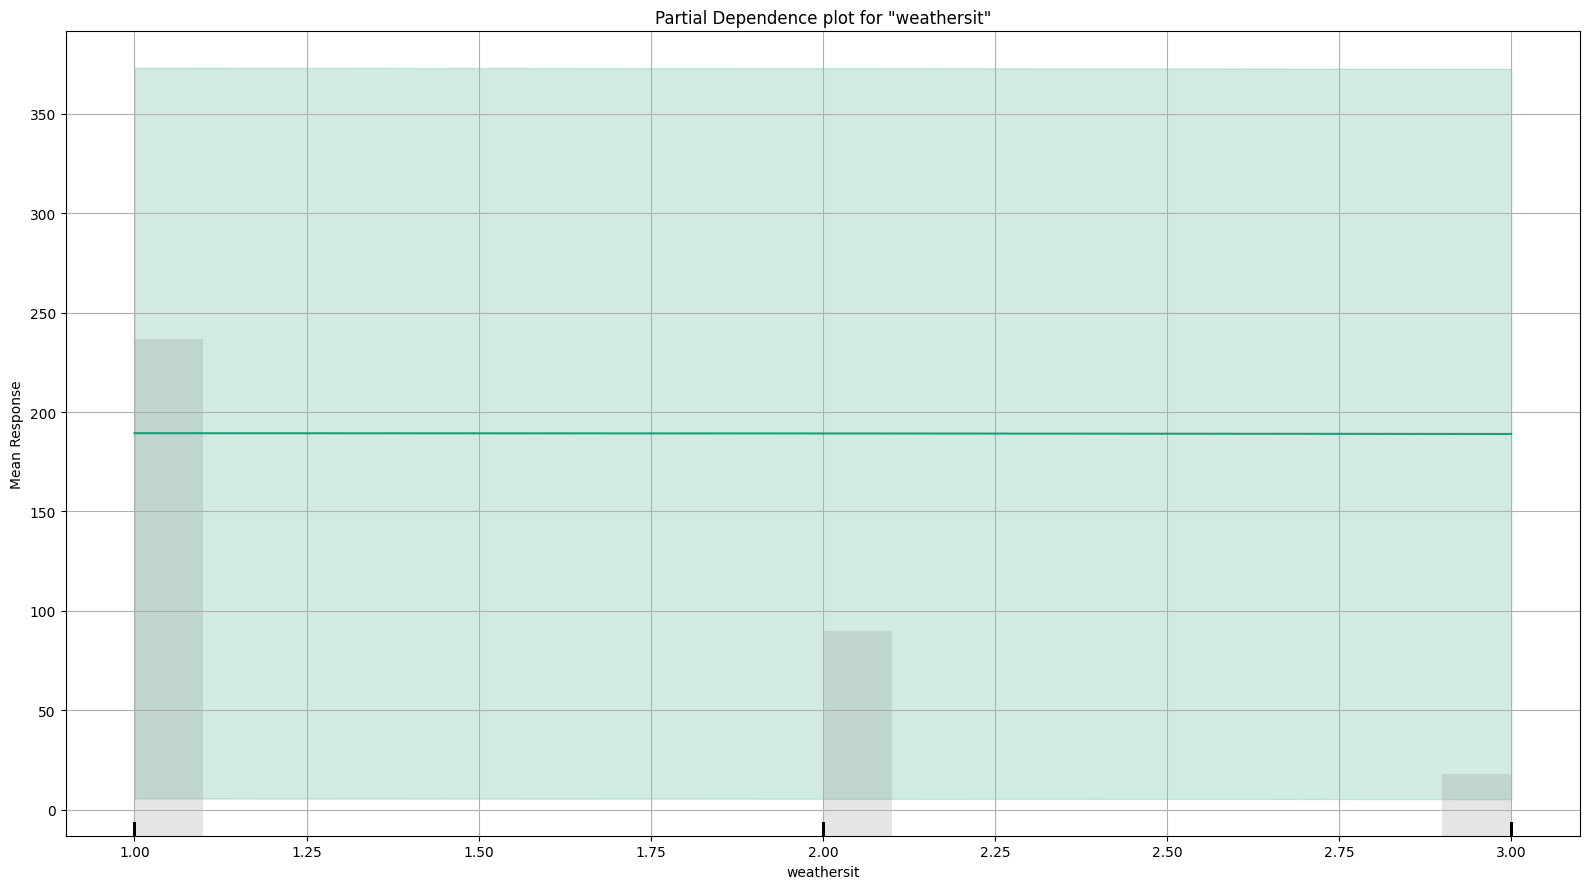

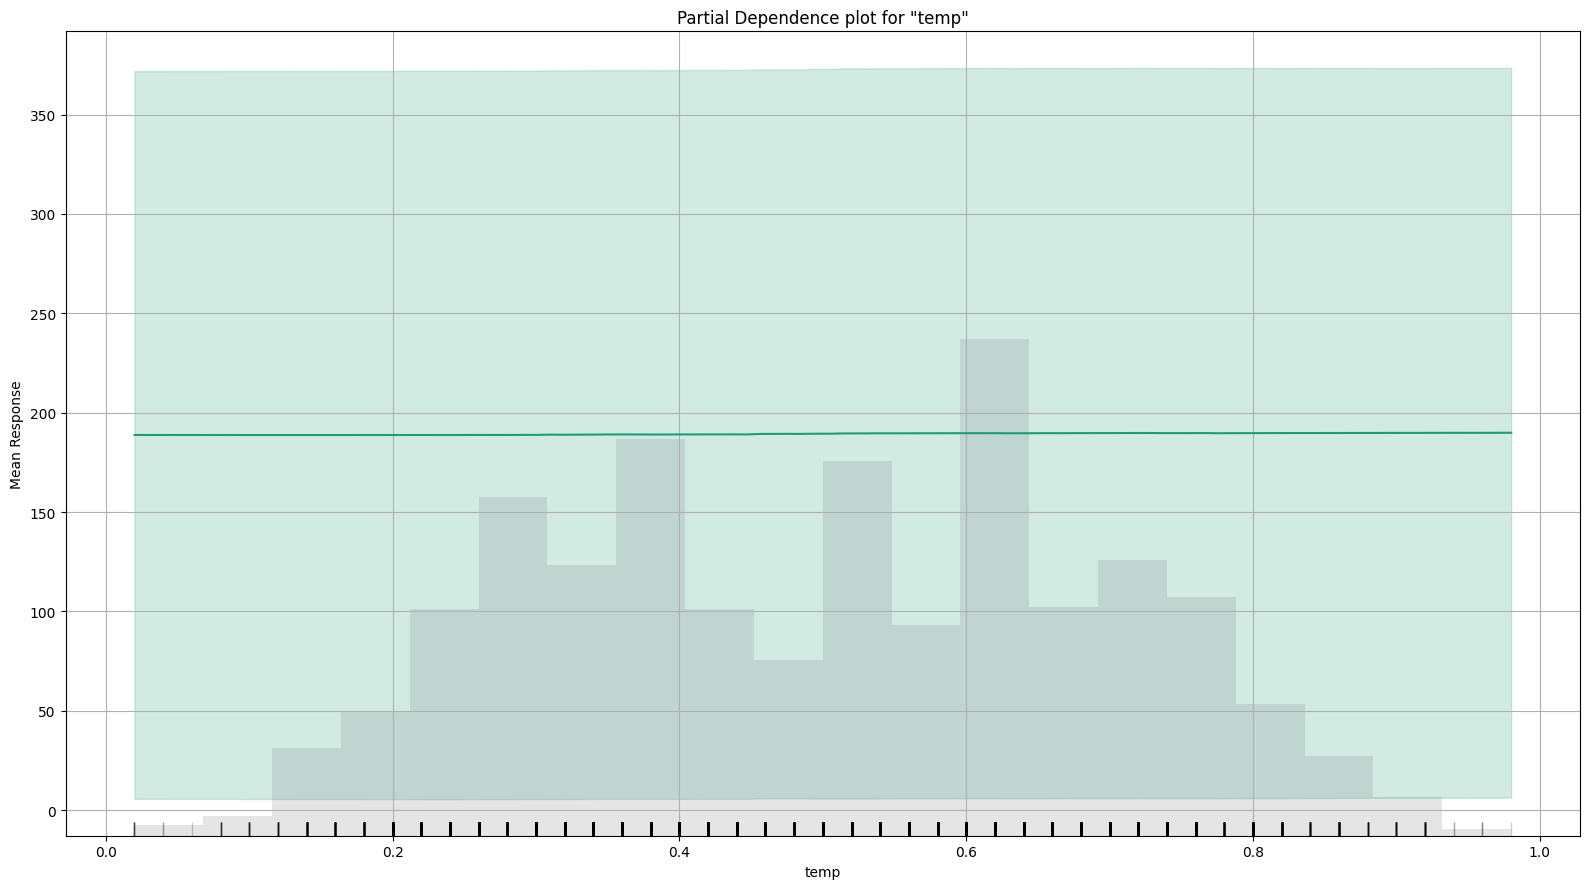

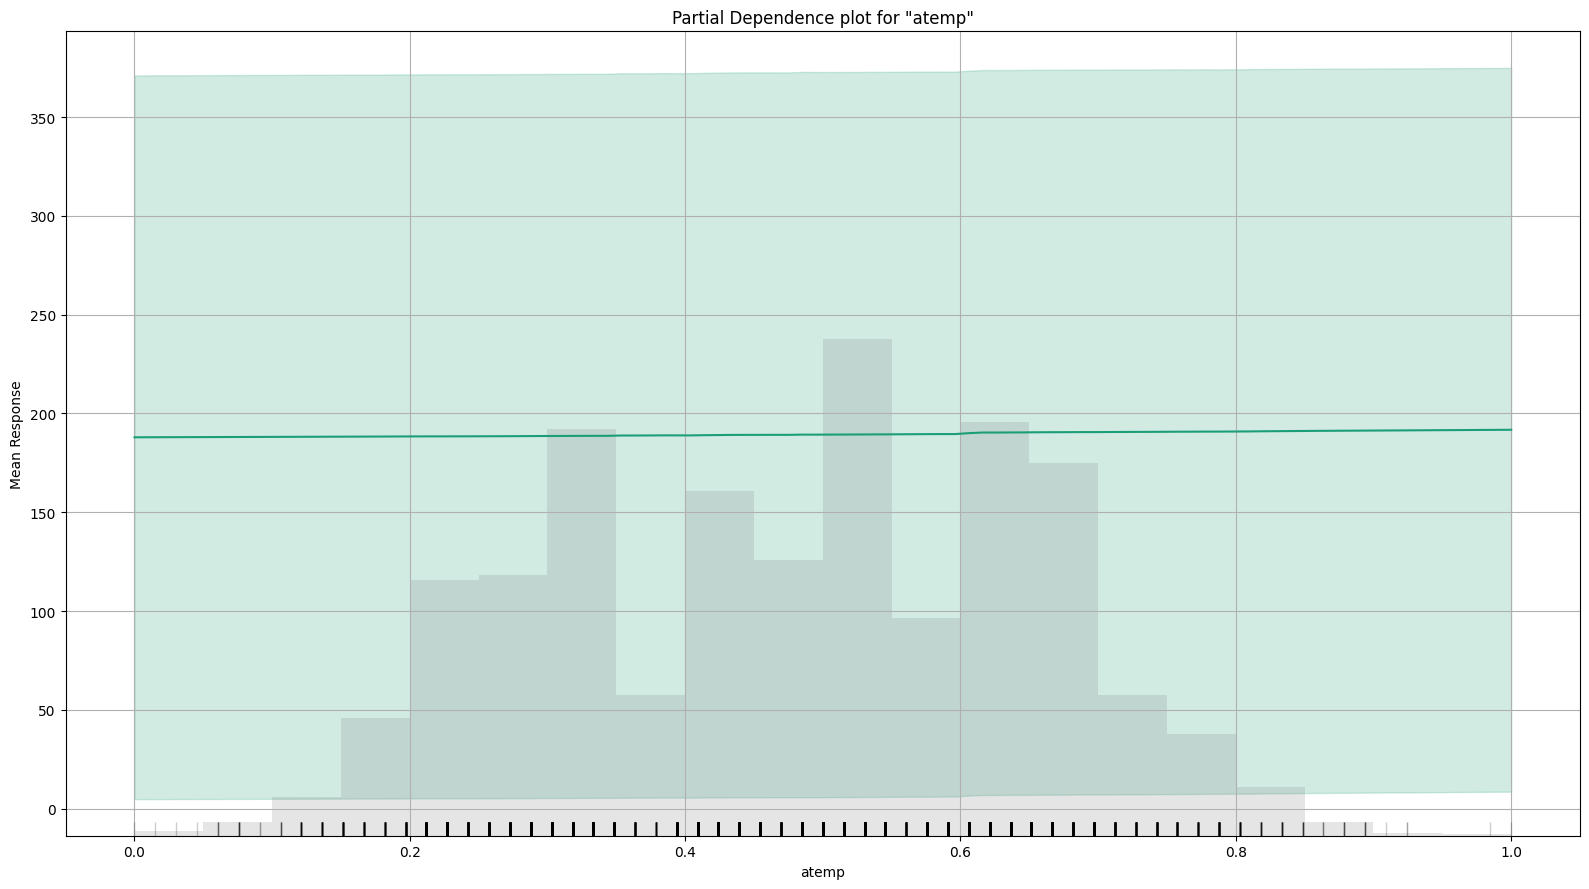

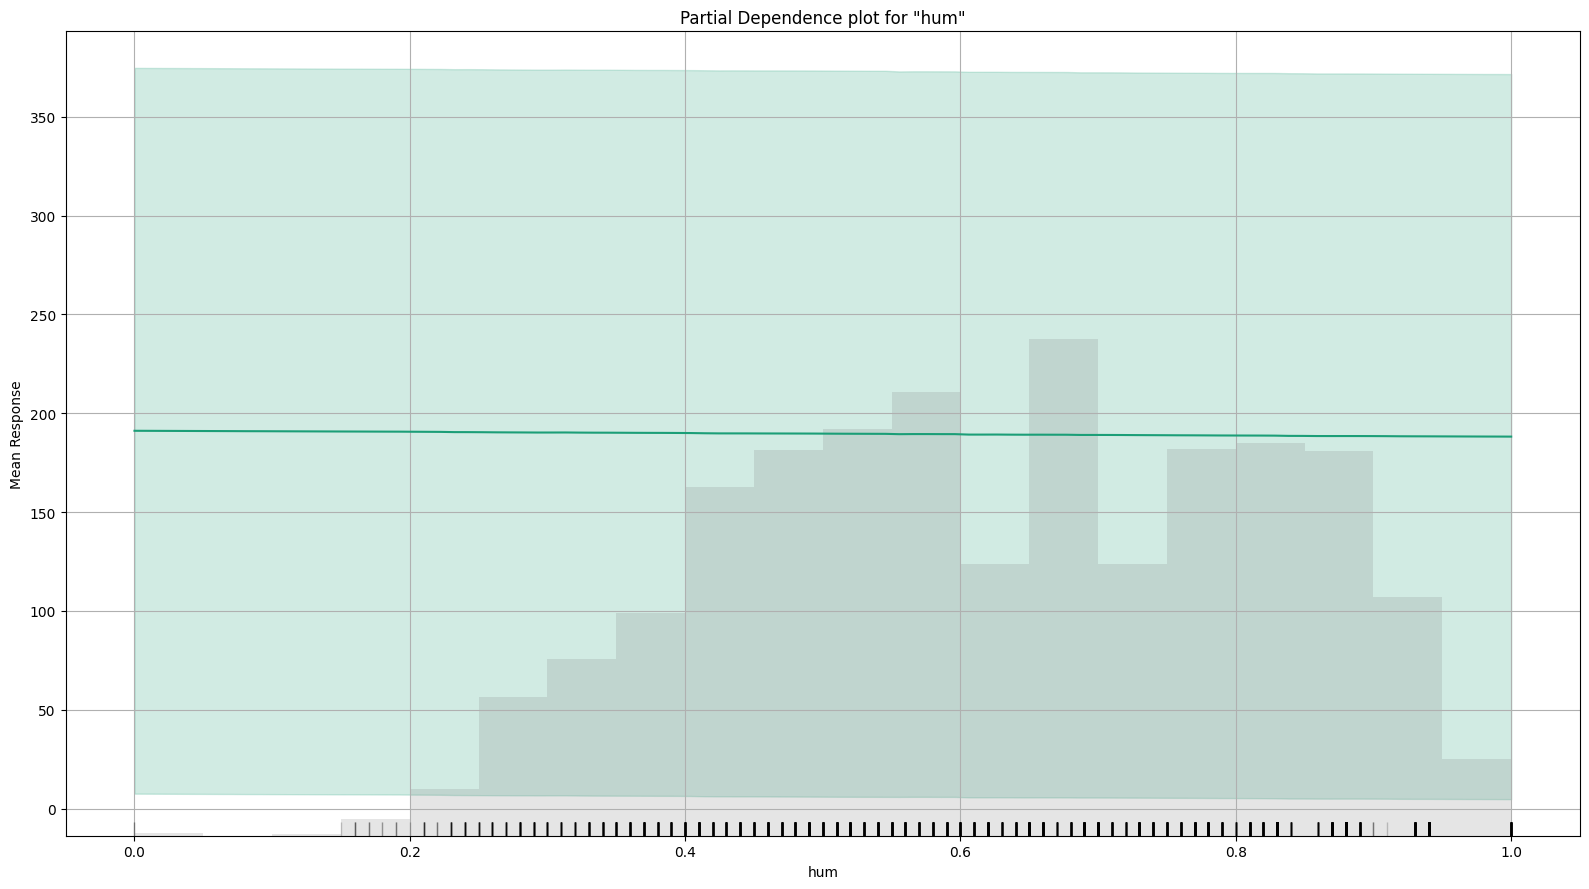

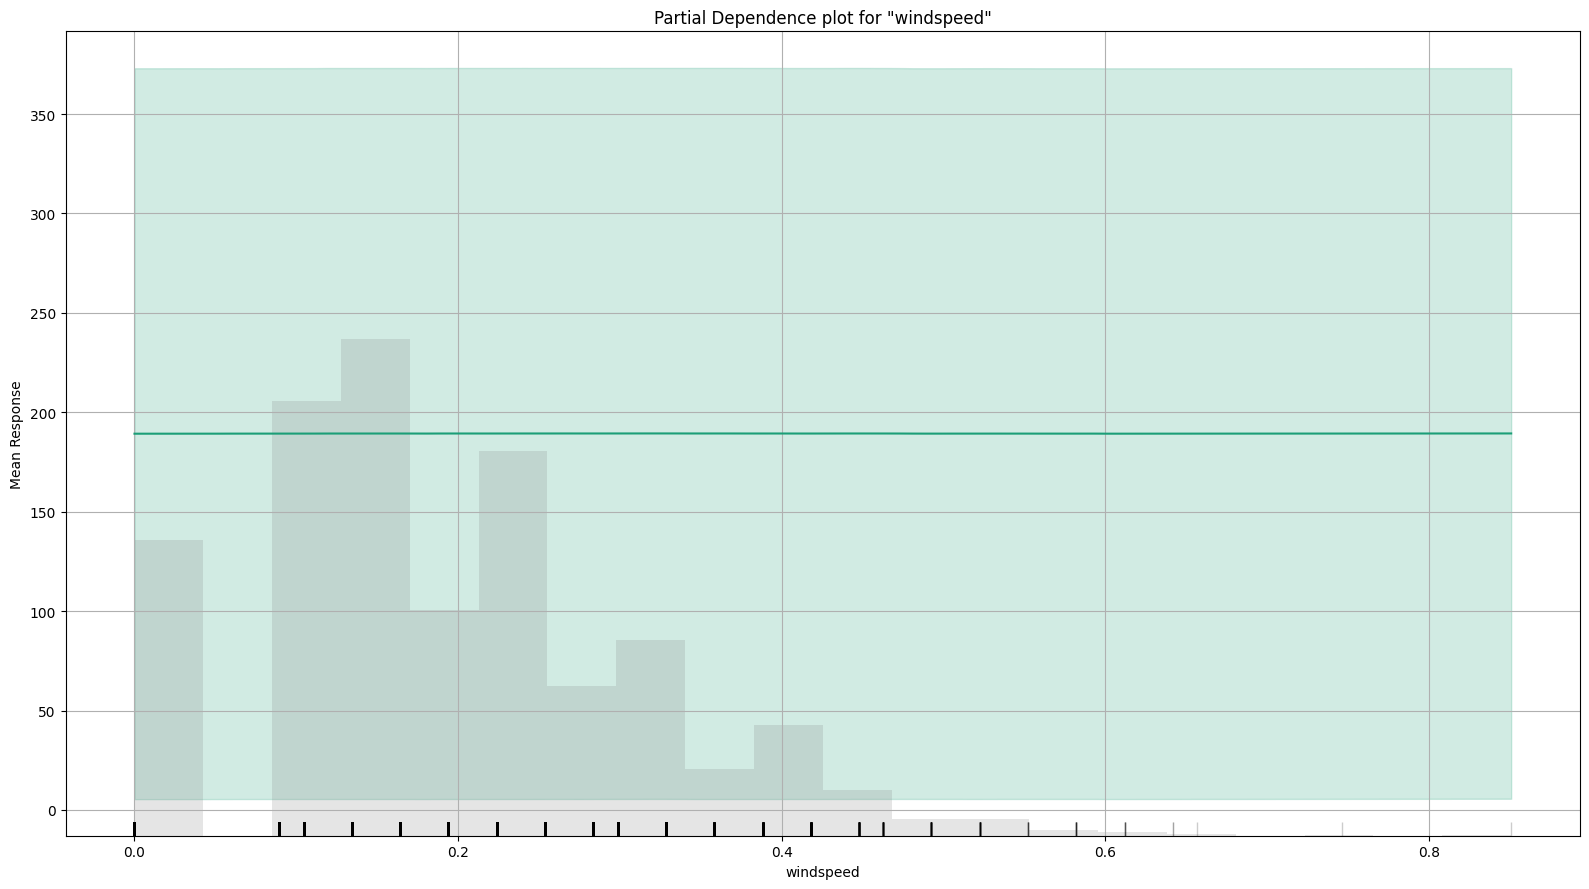

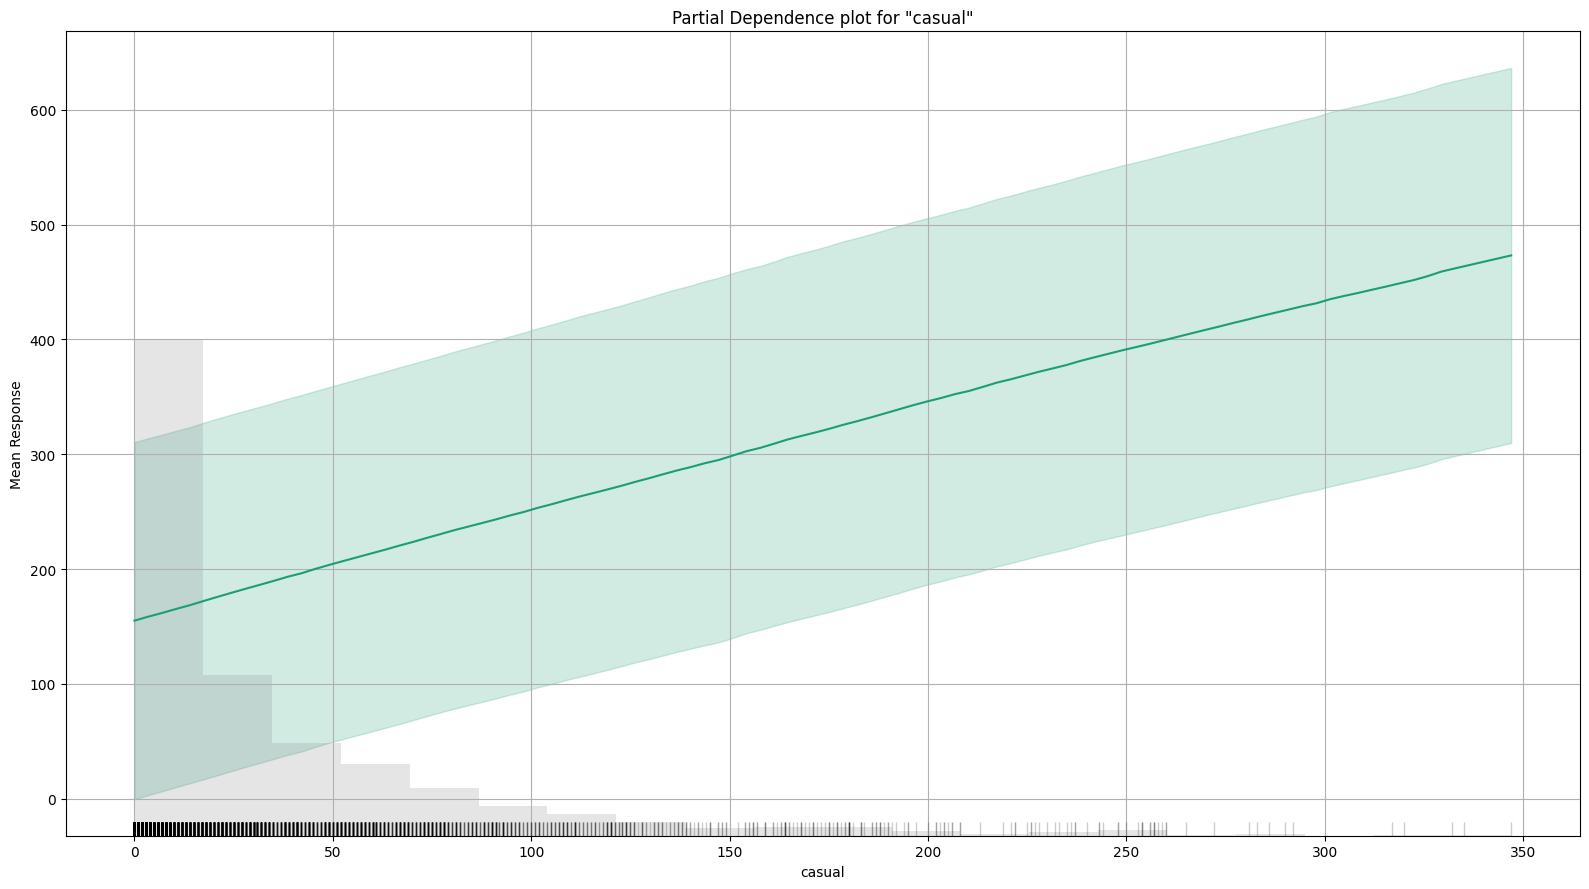

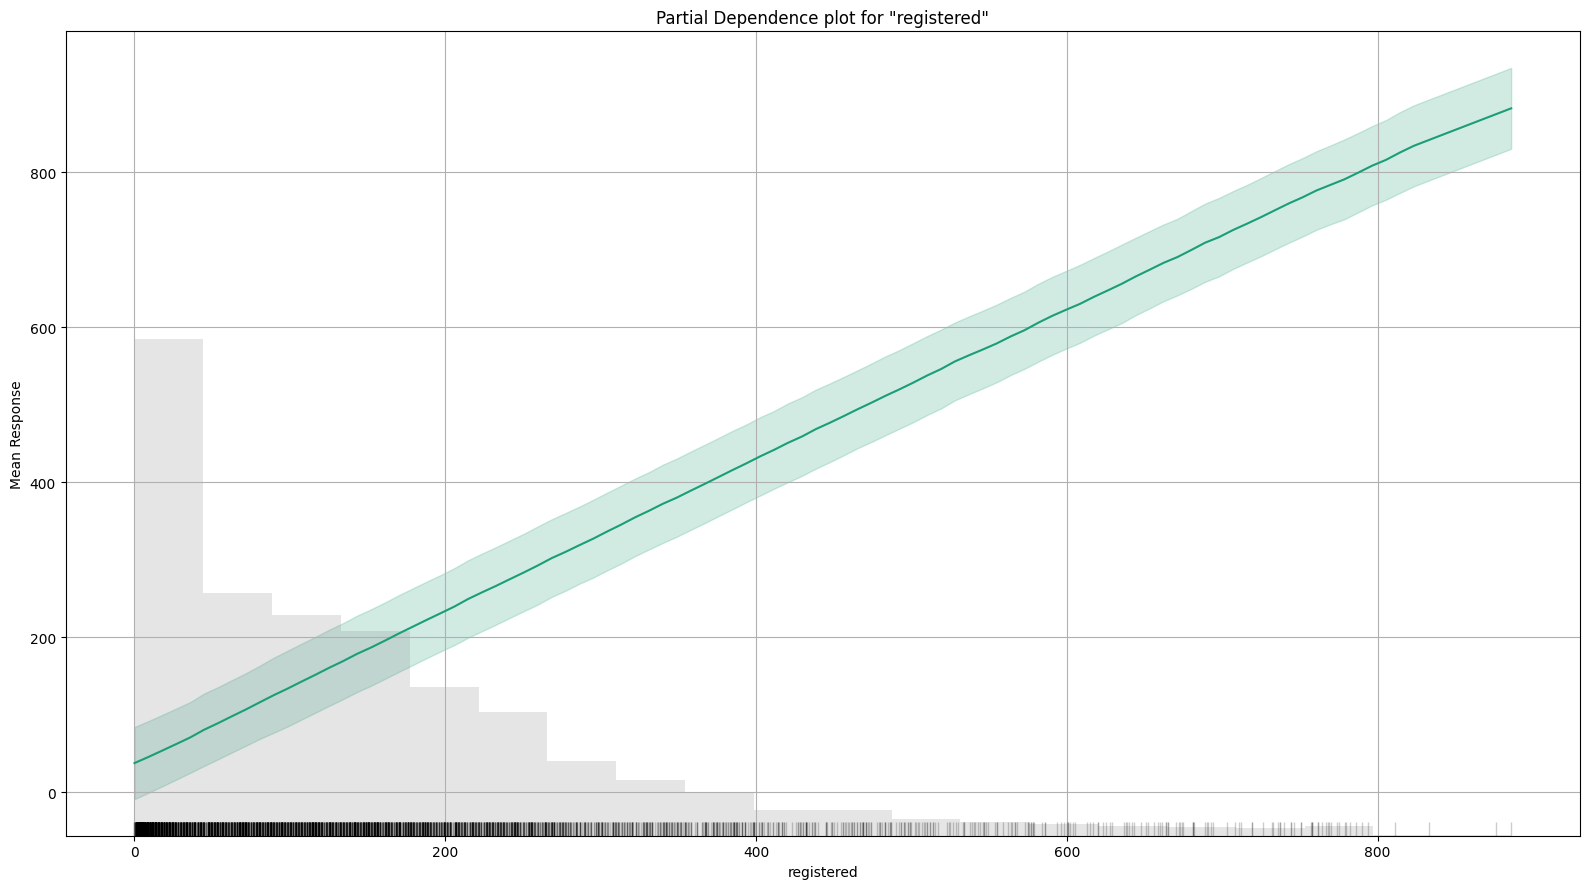

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

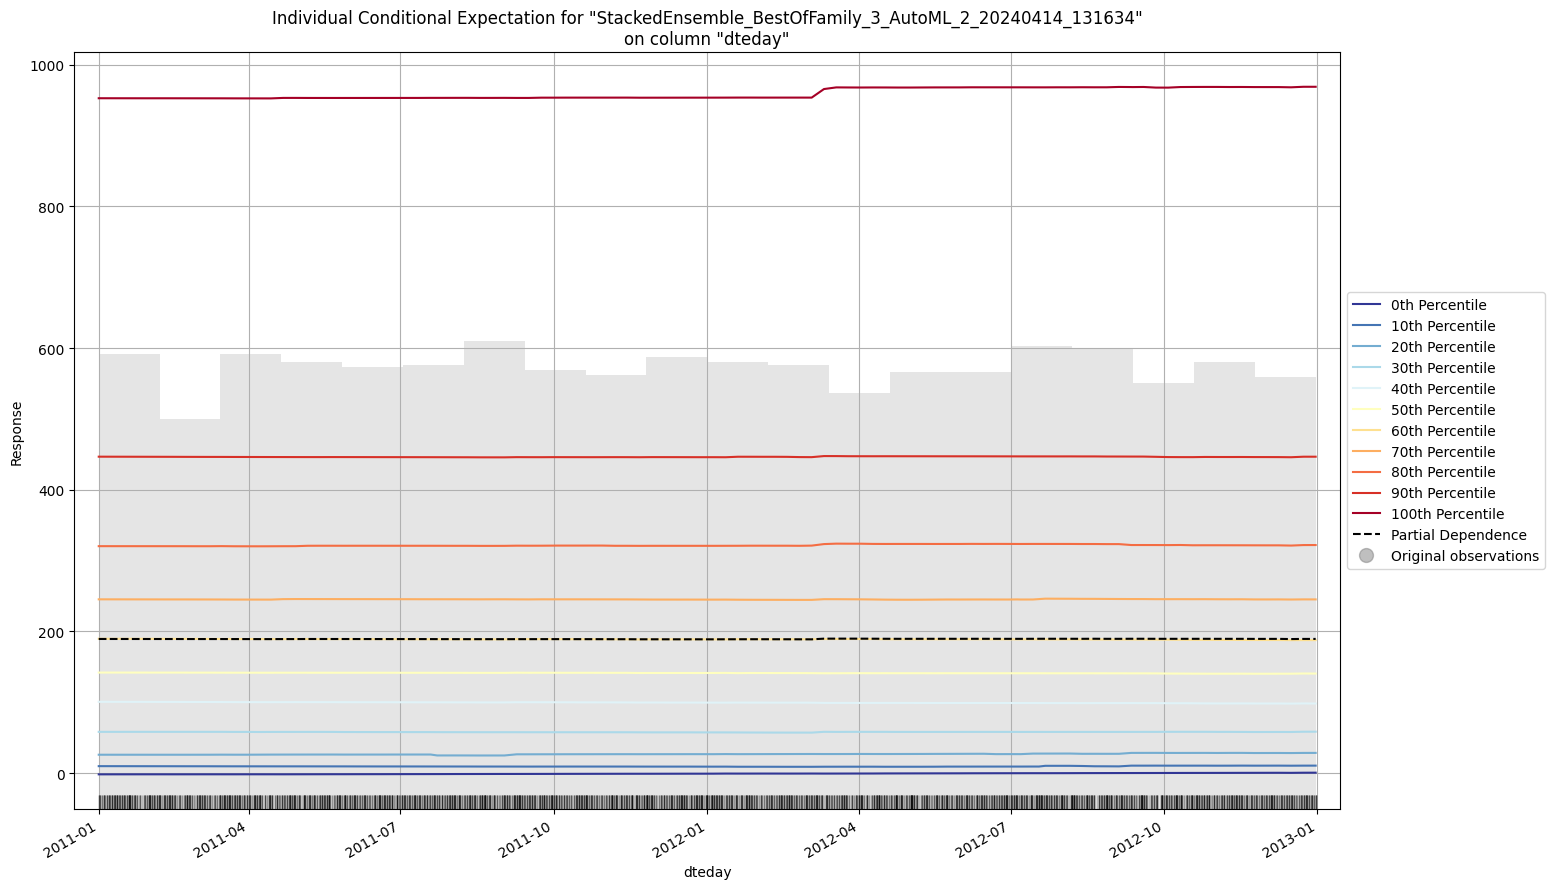

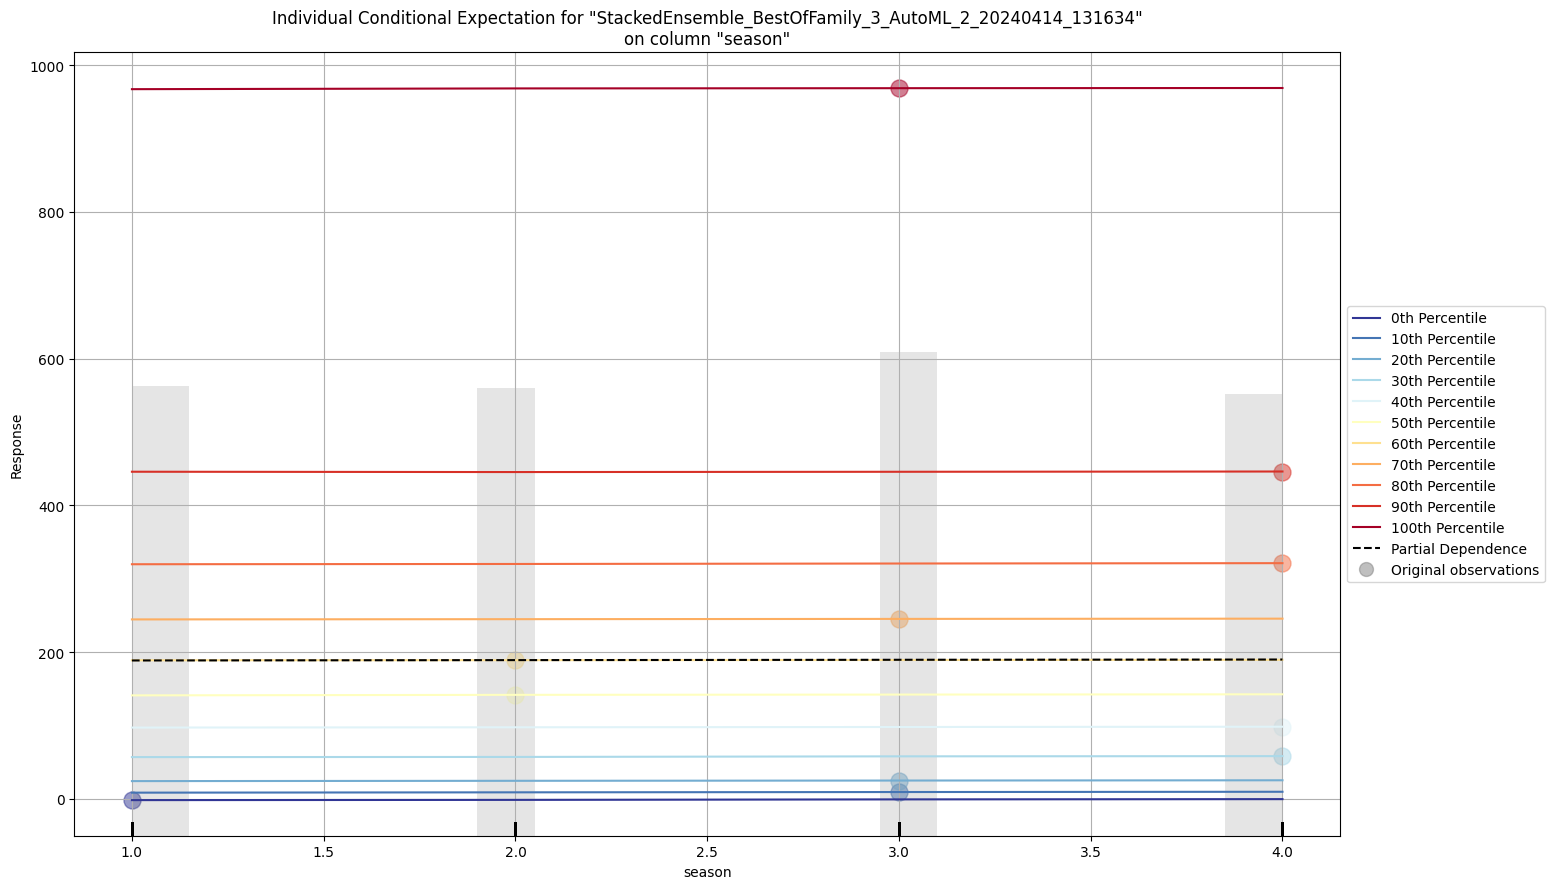

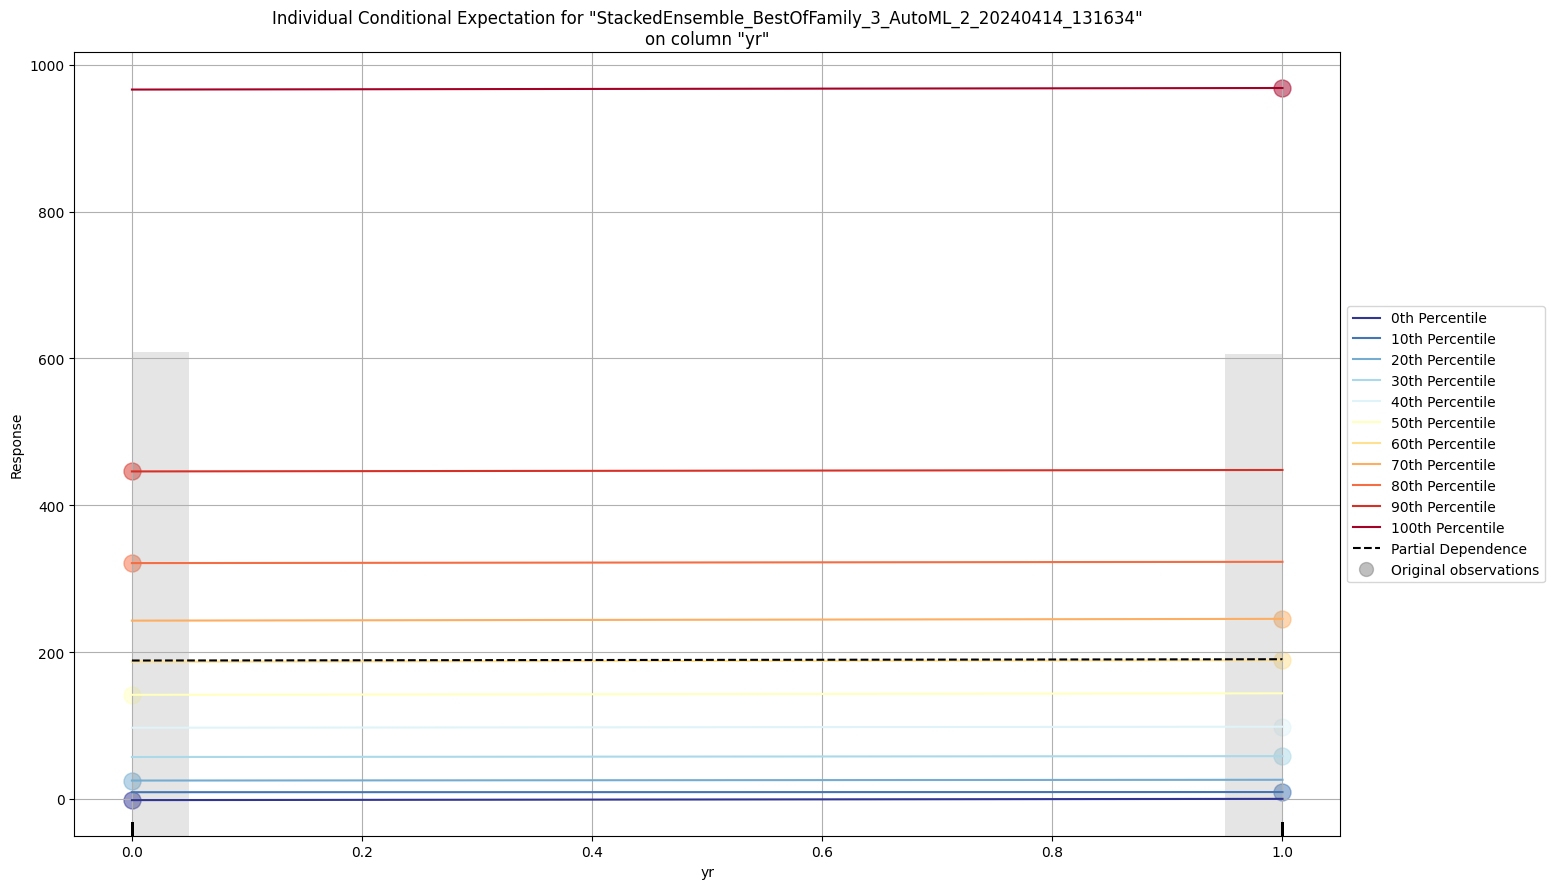

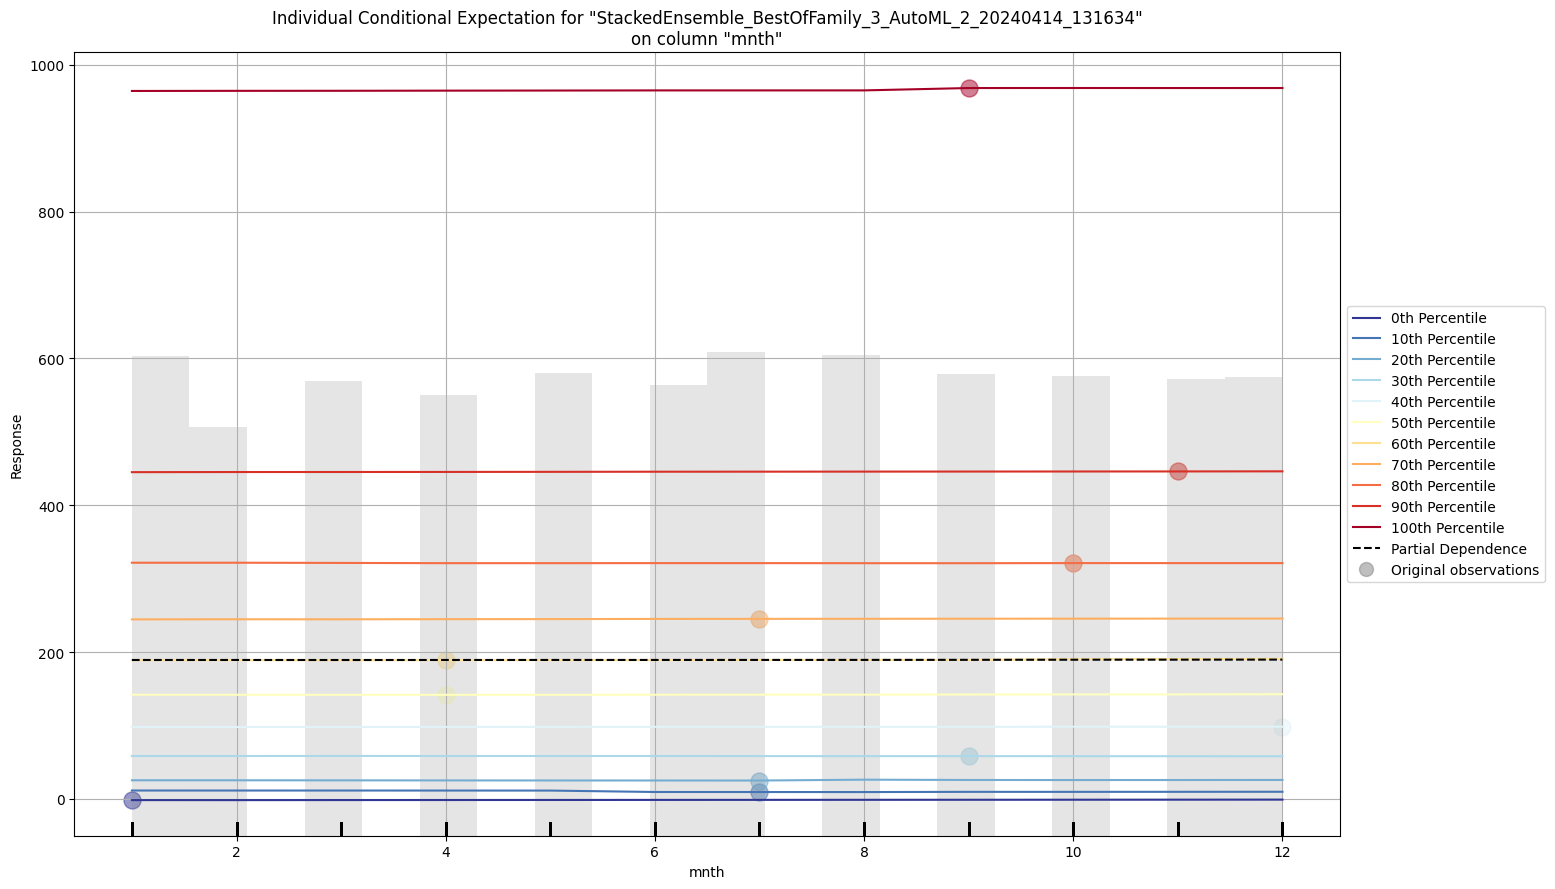

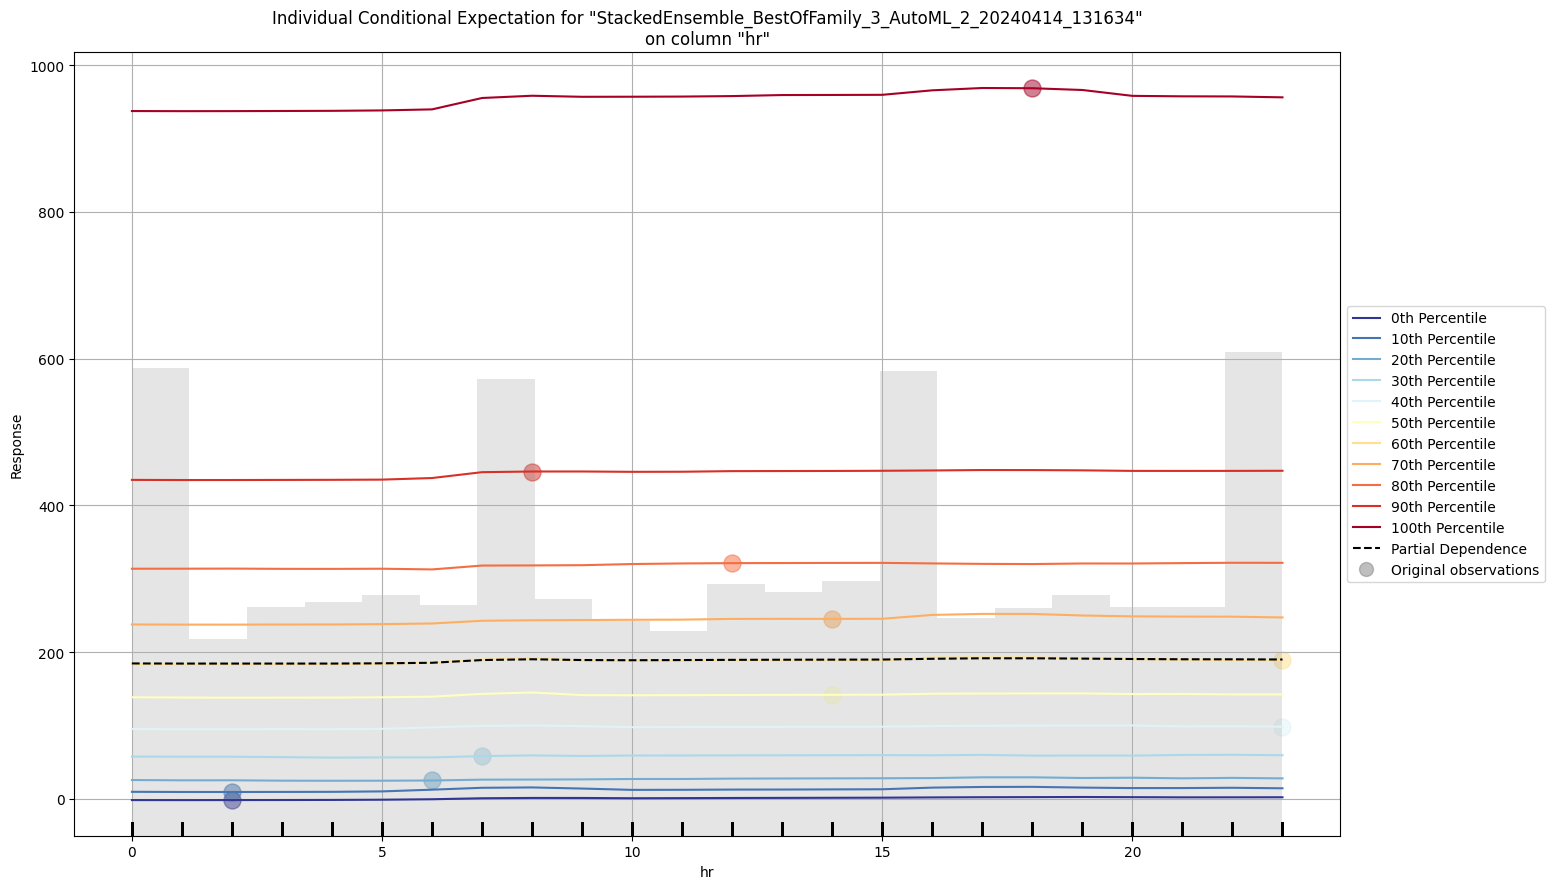

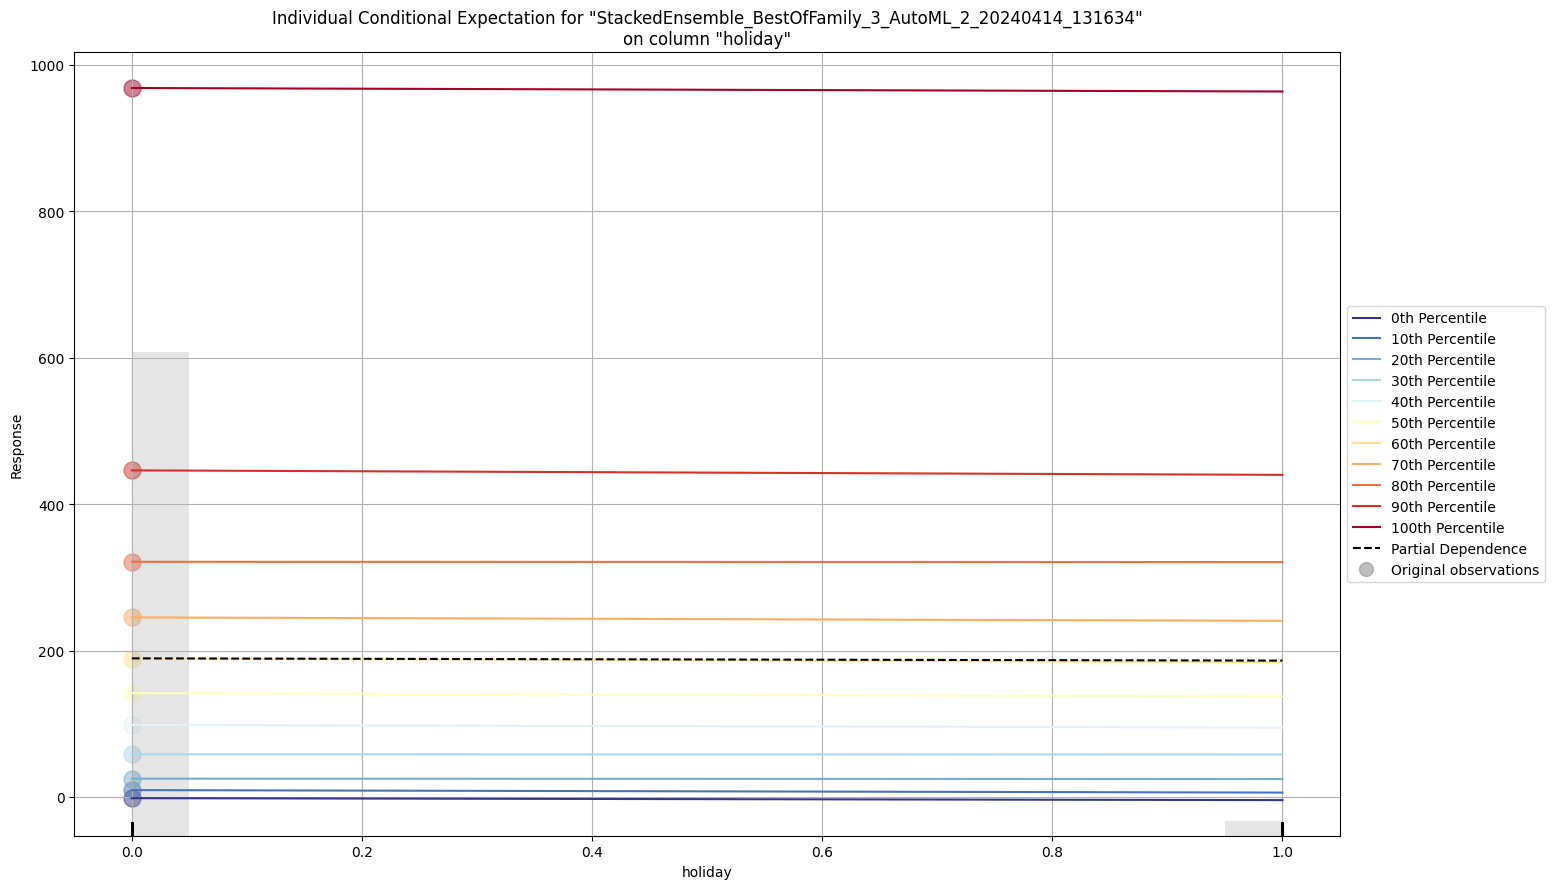

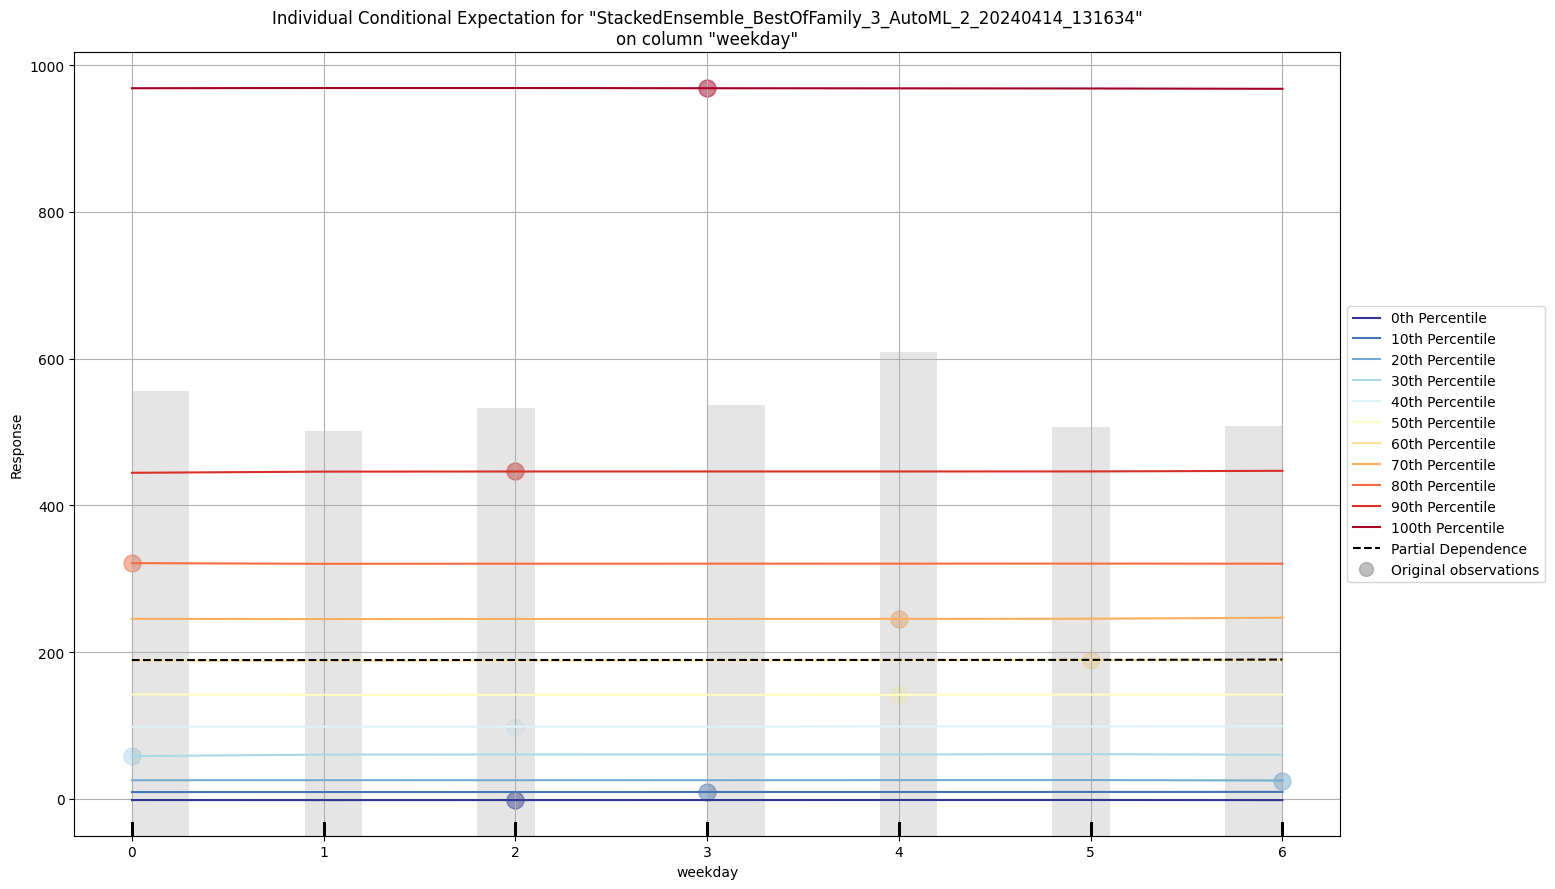

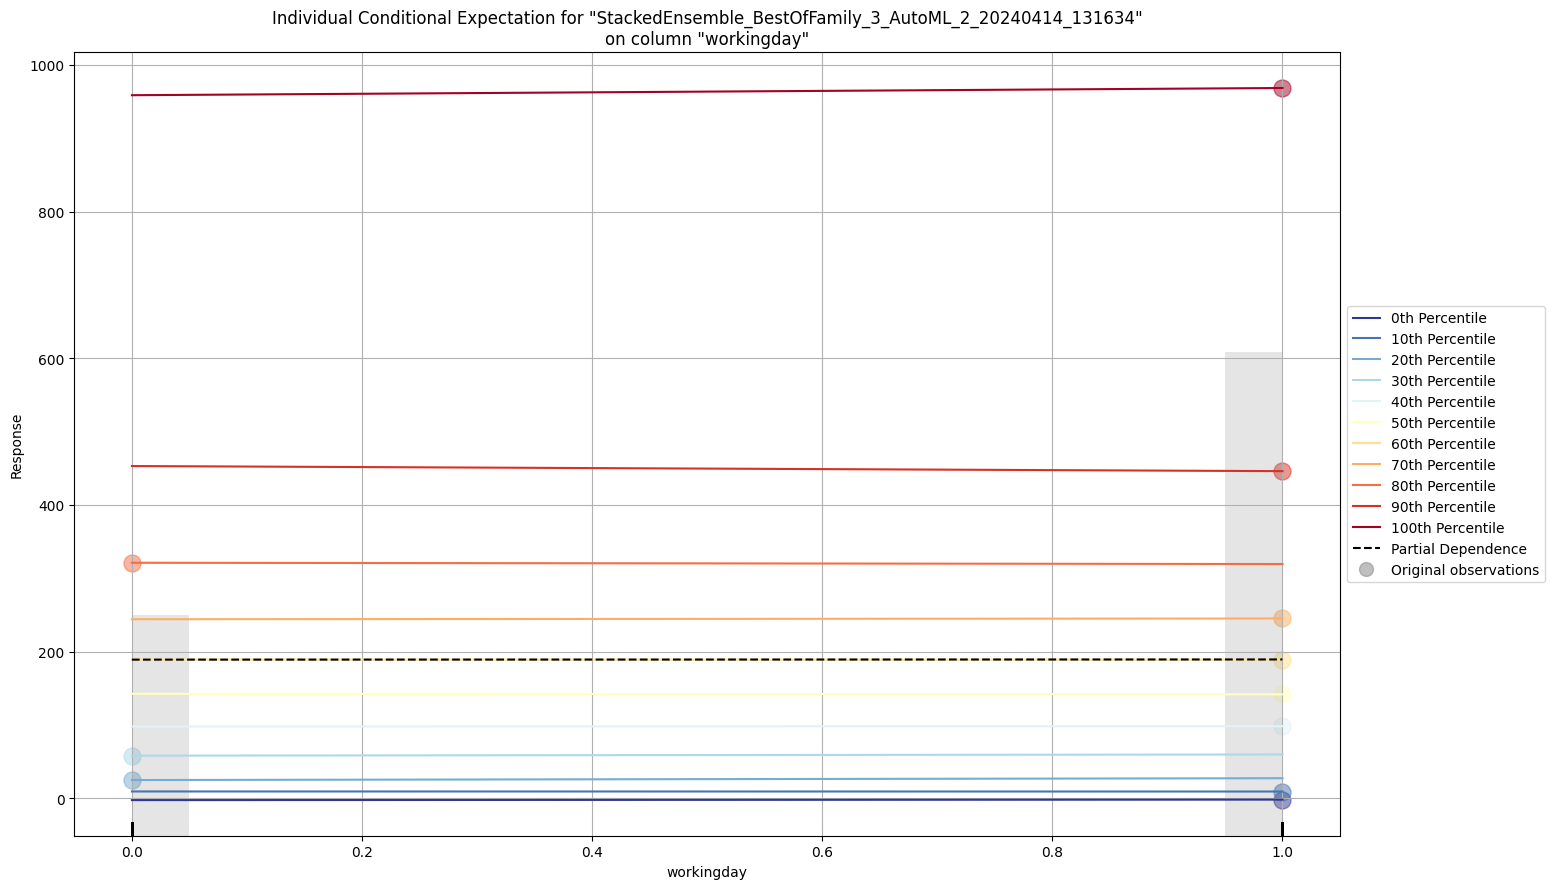

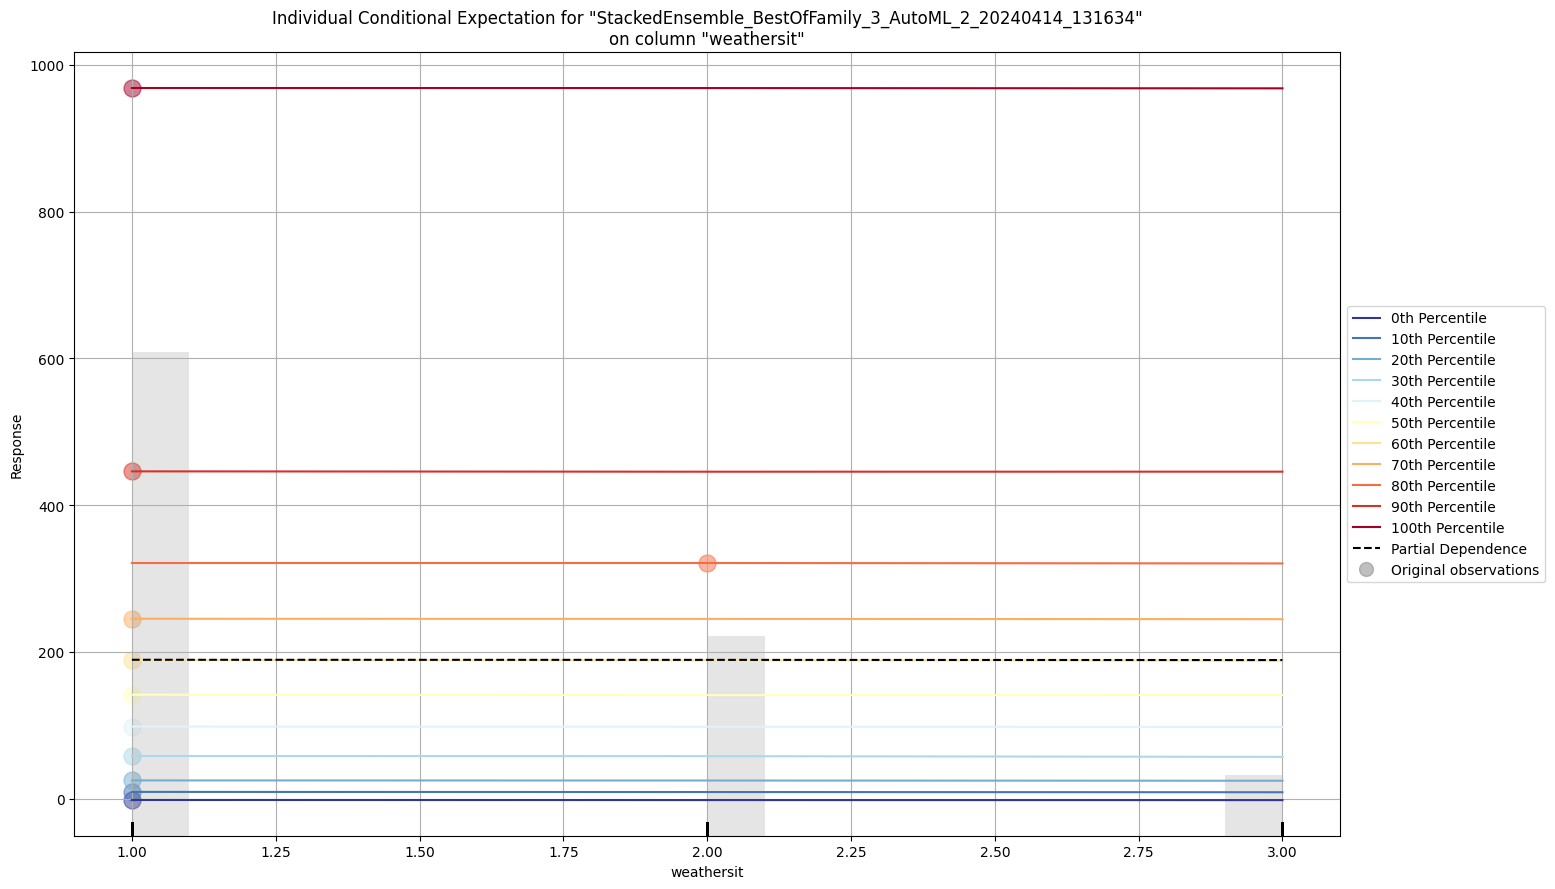

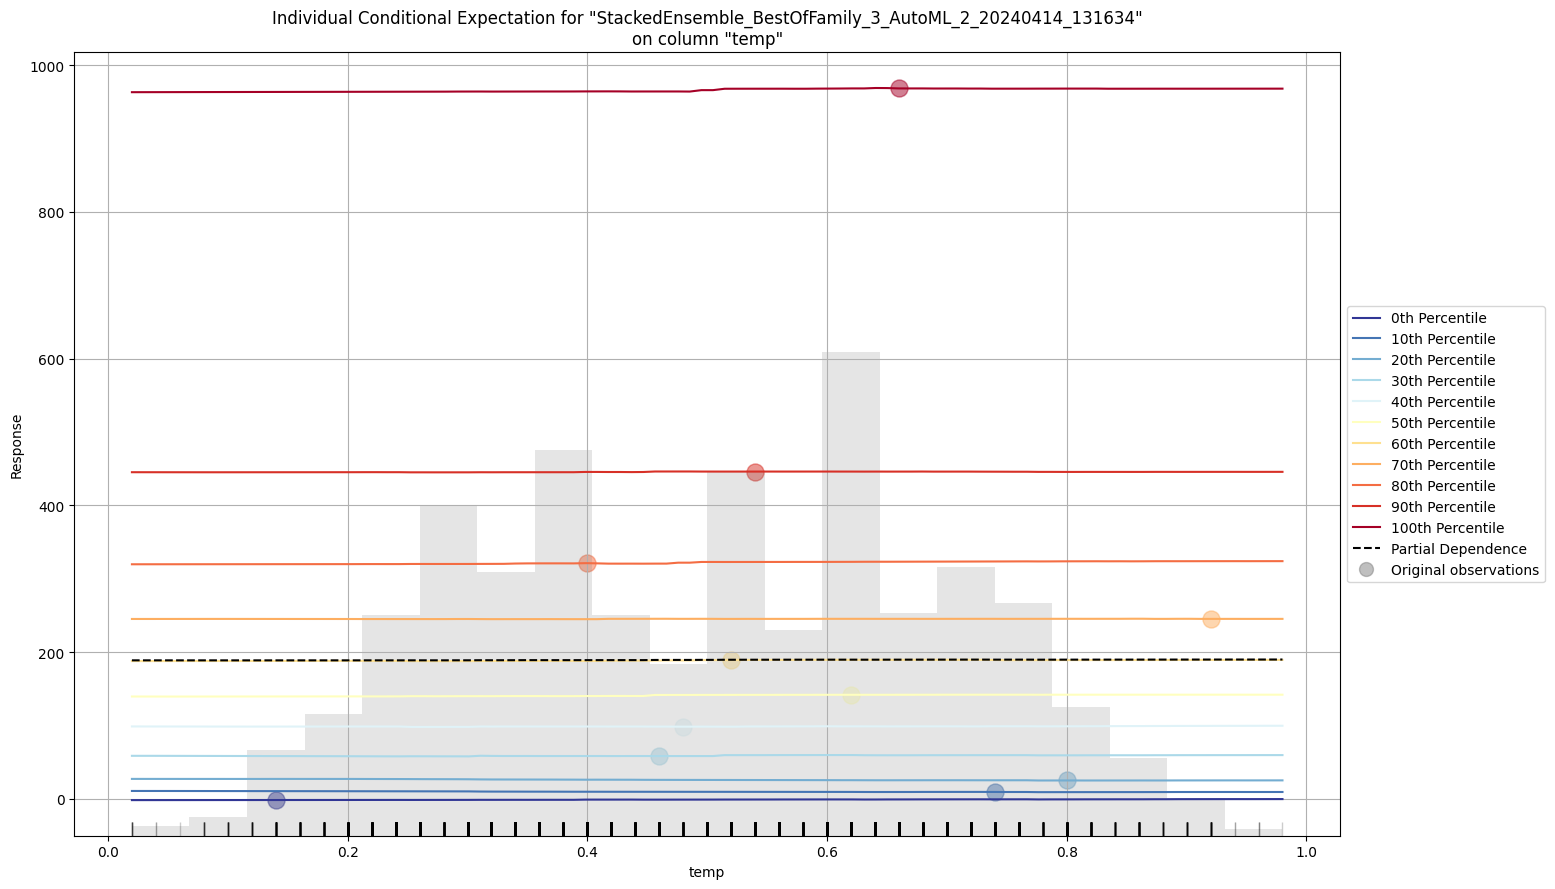

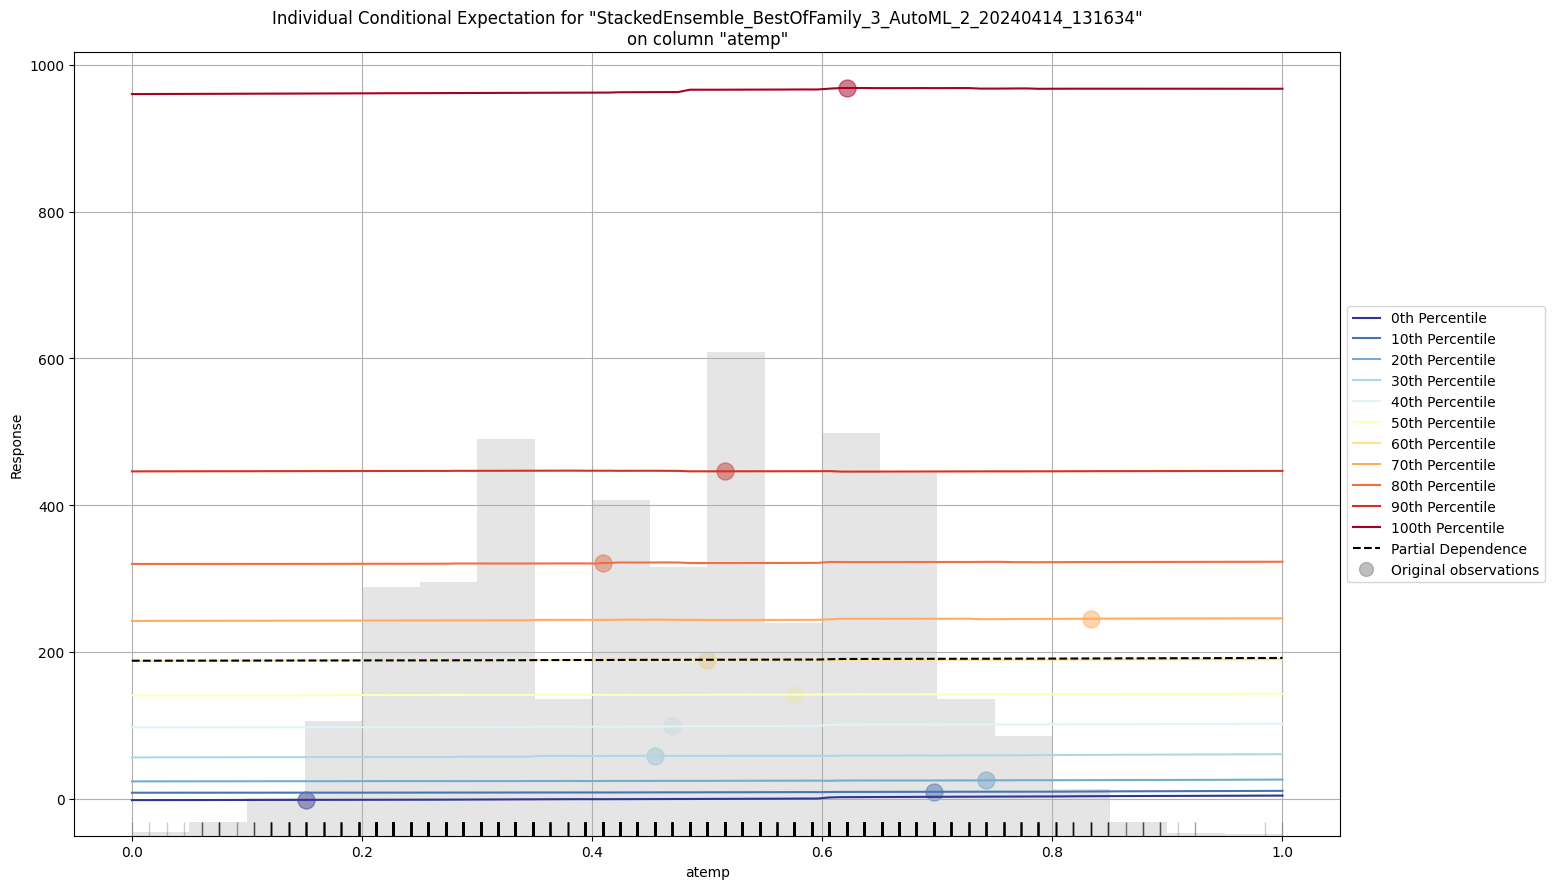

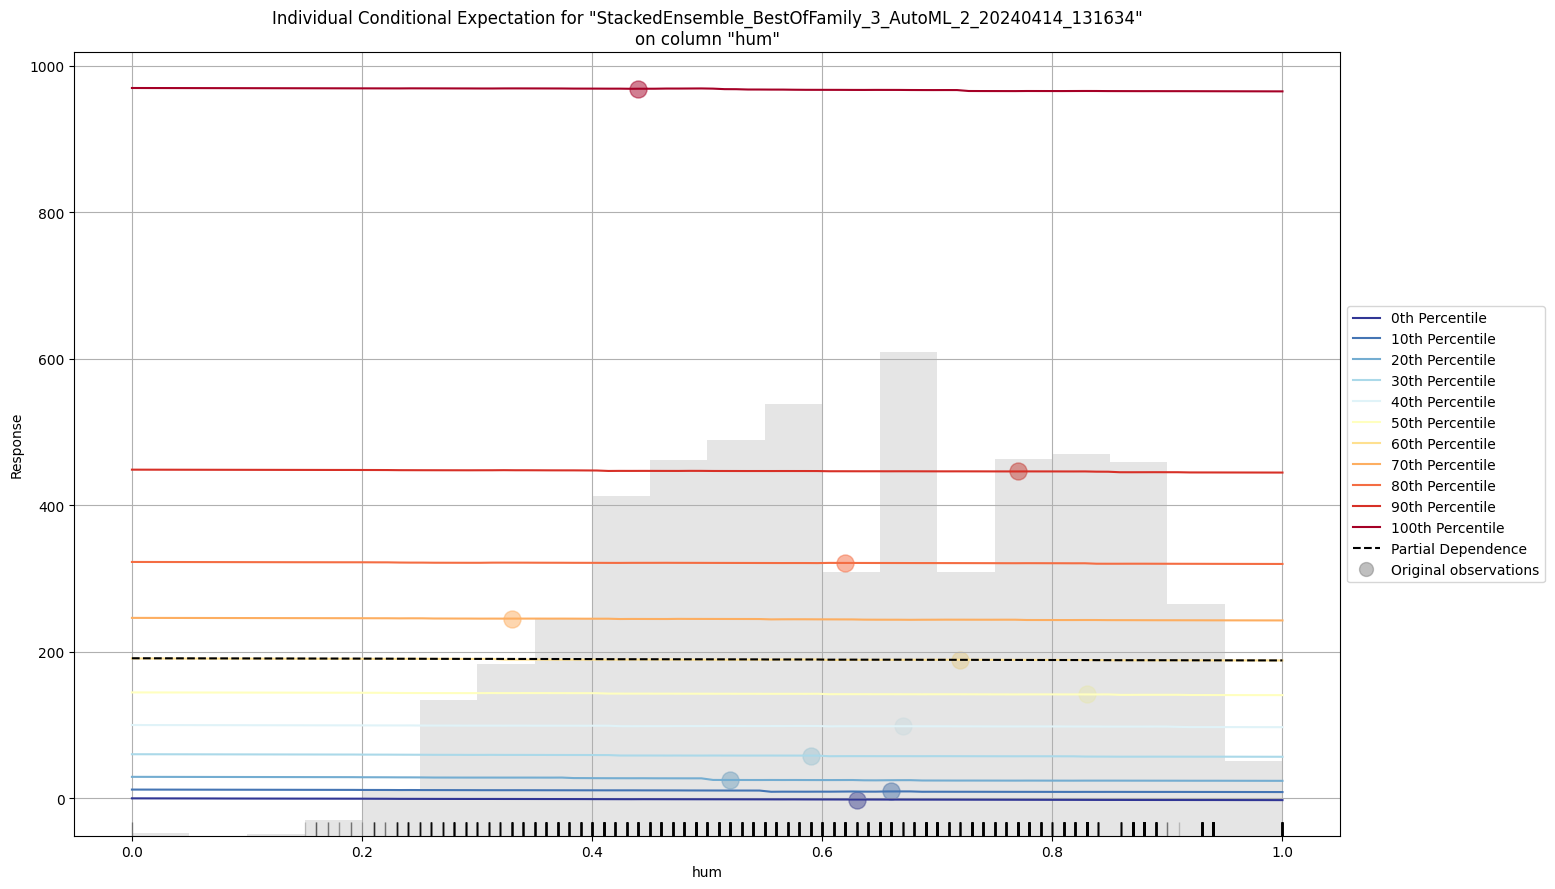

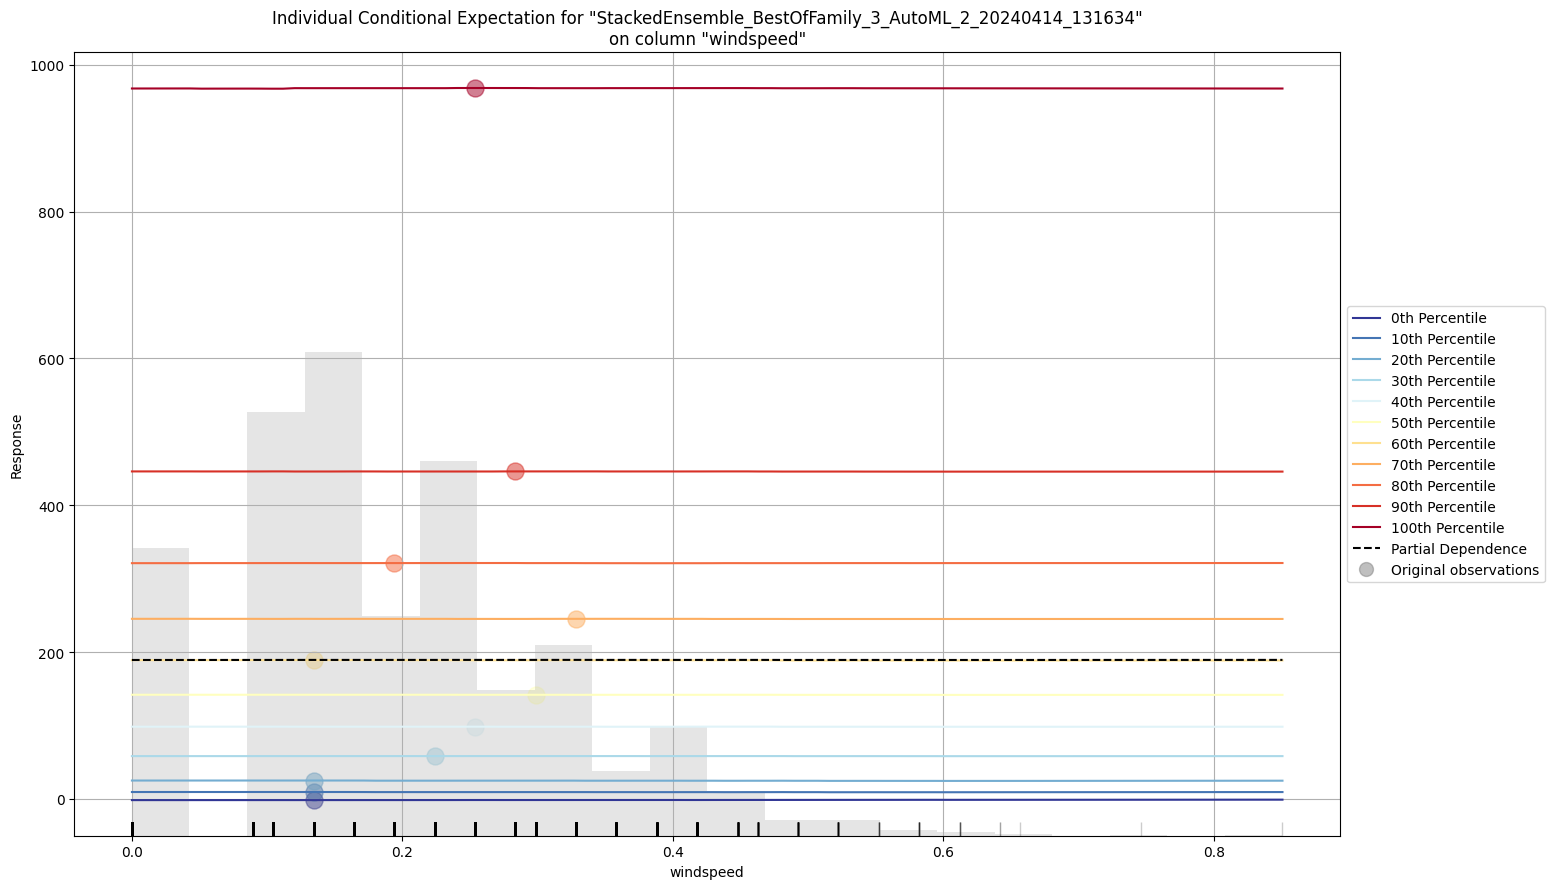

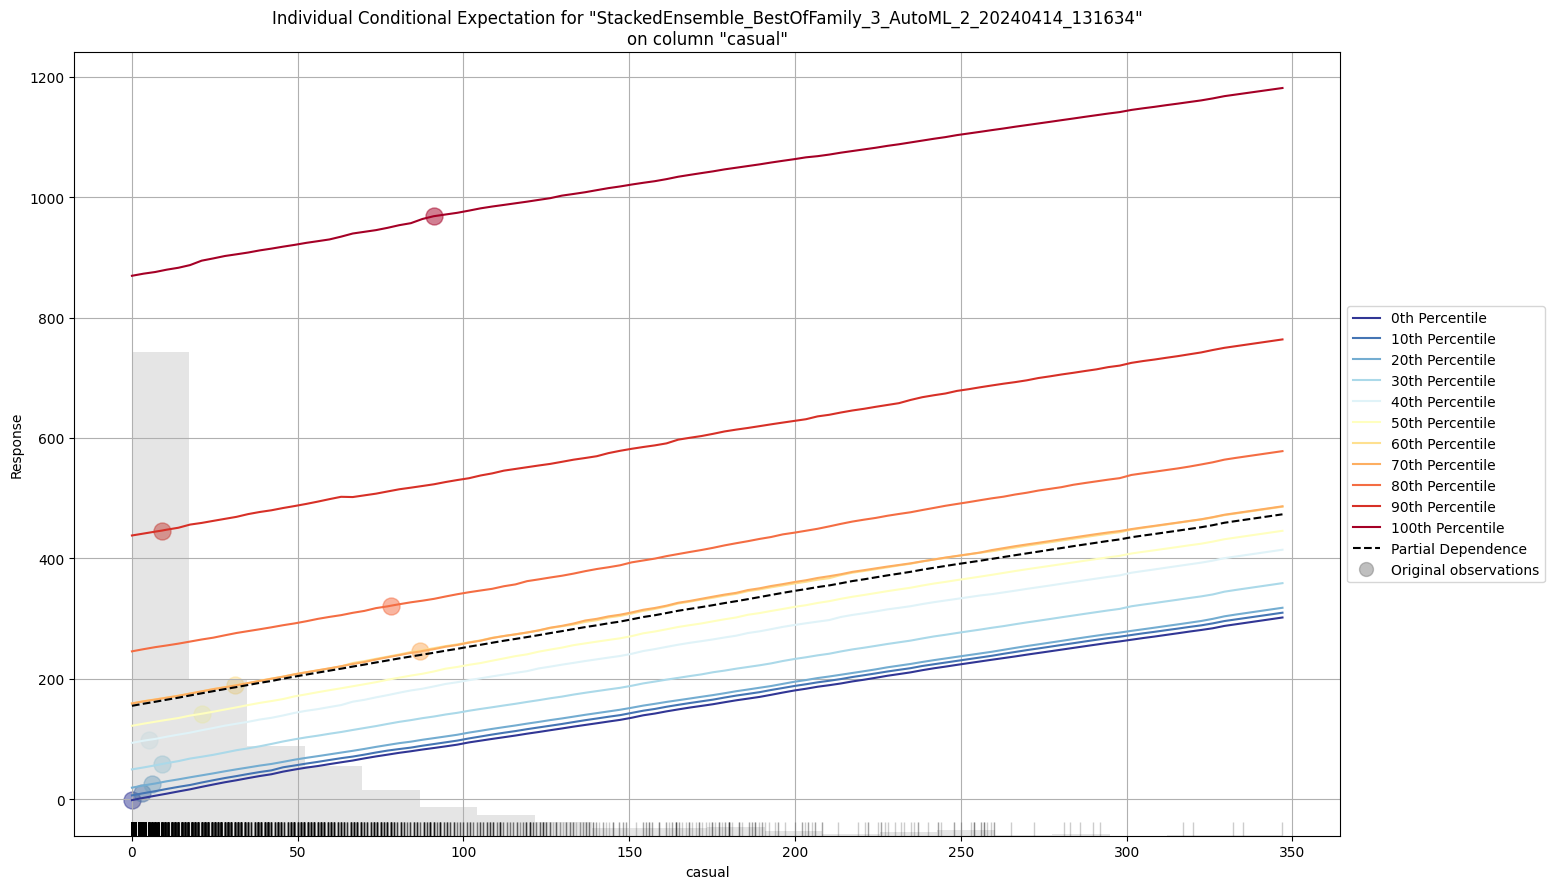

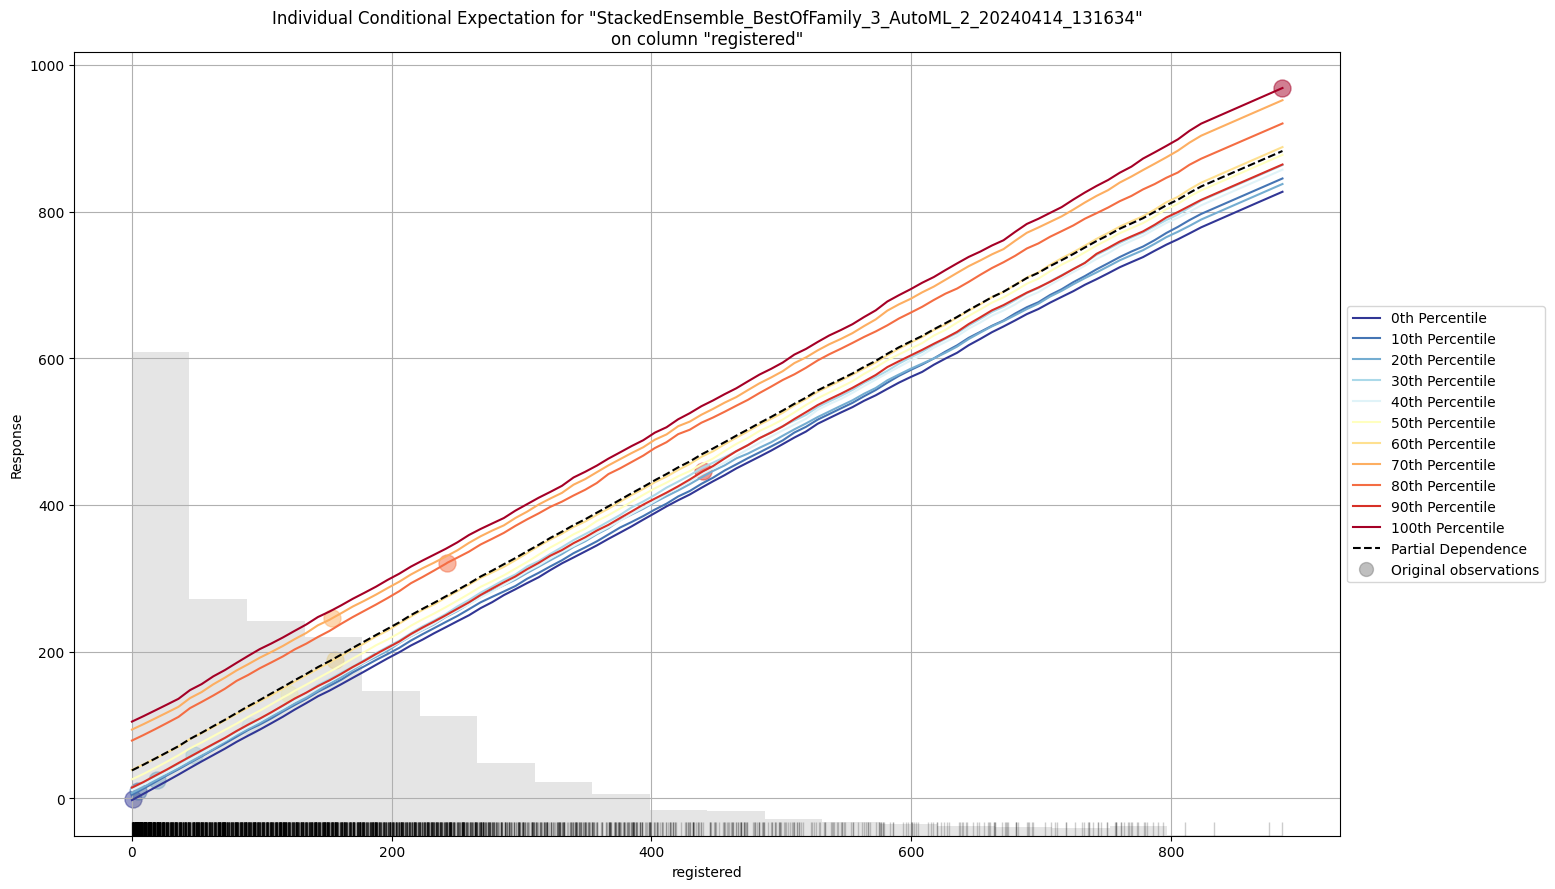

In [20]:
# Explain leader model & compare all AutoML models
exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

## __3. Interpretation on Hourly data__

<ol>
<li>Stacked Ensemble model gave good result</li>
<li>Registered users are using bike more than casual users on hourly basis</li>
<li>Hour and DateDay are also influencing bike rental user counts</li>
<li>Weekday, Workingday, Holiday seems to be having no significant effect on total users count </li>
<li>Residual analysis shows all are behaving random nature except some of them</li>
<li>Environmental conditions like Seaseon, temp, windspeed, humidity etc also doesn't seem to have any considerable effect on Bike rental users count</li>
<li>Parameters tuning is necessary for better results</li>
</ol>

## __4. H2OGradientBoostingEstimator on Day data__

In [21]:
# Importing the day data
day_data = h2o.import_file('day.csv')
day_data.head(2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


instant  dteday                 season    yr    mnth    holiday    weekday    workingday    weathersit      temp     atemp       hum    windspeed    casual    registered    cnt
---------  -------------------  --------  ----  ------  ---------  ---------  ------------  ------------  --------  --------  --------  -----------  --------  ------------  -----
        1  2011-01-01 00:00:00         1     0       1          0          6             0             2  0.344167  0.363625  0.805833     0.160446       331           654    985
        2  2011-01-02 00:00:00         1     0       1          0          0             0             2  0.363478  0.353739  0.696087     0.248539       131           670    801
[2 rows x 16 columns]

In [22]:
train_d, test_d = day_data.split_frame([0.8], seed = 42)
y_d='cnt'
ignore = ['instant', 'cnt']
x_d= list(set(train_d.names)-set(ignore))

In [23]:
# Build and train the model:
gbm = H2OGradientBoostingEstimator(seed=42,
                                   model_id='gbm',
                                   nfolds = 5,
                                   keep_cross_validation_predictions=True)
%time gbm.train(x=x_d, y=y_d, training_frame=train_d)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
CPU times: total: 0 ns
Wall time: 6.18 s


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          17417                  5            5            5             13            28            22.98

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3283.610588556987
RMSE: 57.30279738858293
MAE: 37.22619496681042
RMSLE: 0.1269930664692556
Mean Residual Deviance: 3283.610588556987

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 20901.12909696614
RMSE: 144.57222795878238
MAE: 90.82482250148307
RMSLE: 0.15007091394662064
Mean Residual Deviance: 20901.12909696614

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0           nan           nan           nan           nan           nan
loglikelihood           nan       0           nan           nan           nan           nan           nan
mae                     90.7711   13.9496     76.3535       95.7506       106.167       99.8531       75.7314
mean_residual_deviance  20832.1   6845.91     11831.9       25759.8       27777.1       23257.1       15534.4
mse                     20832.1   6845.91     11831.9       25759.8       27777.1       23257.1       15534.4
r2                      0.994531  0.00186763  0.996771      0.993438      0.992302      0.994024      0.996118
residual_deviance       20832.1   6845.91     11831.9       25759.8       27777.1       23257.1       15534.4
rmse                    142.616   24.8212     108.774       160.499       166.665       152.503       124.637
rmsle                   0.100703  0.127362    0.0444382     0.0566247     0.0399218     0.0344632     0.328065

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-04-14 16:23:53  0.288 sec   0.0                1969.2548518794397  1625.3134392017555  3877964.671650714
     2024-04-14 16:23:53  0.294 sec   1.0                1776.9548491970675  1465.0698487597488  3157568.536084973
     2024-04-14 16:23:53  0.296 sec   2.0                1603.2771294285496  1320.4448123713714  2570497.5537486505
     2024-04-14 16:23:53  0.298 sec   3.0                1447.019807659973   1190.9929804281305  2093866.3237603053
     2024-04-14 16:23:53  0.300 sec   4.0                1306.2844918124574  1073.791692194947   1706379.17354973
     2024-04-14 16:23:53  0.302 sec   5.0                1178.8926993547275  968.4318665714363   1389787.9965918758
     2024-04-14 16:23:53  0.303 sec   6.0                1064.7453891422158  873.650870020716    1133682.7436996084
     2024-04-14 16:23:53  0.305 sec   7.0                961.4909603803281   788.4039063346241   924464.8668930858
     2024-04-14 16:23:53  0.307 sec   8.0                869.0590805305934   712.7018035941562   755263.6854526803
     2024-04-14 16:23:53  0.309 sec   9.0                785.4642162518289   642.9335053177806   616954.0350120999
---  ---                  ---         ---                ---                 ---                 ---
     2024-04-14 16:23:53  0.370 sec   41.0               68.75318768192476   45.19711203219779   4727.000816425971
     2024-04-14 16:23:53  0.371 sec   42.0               66.84344741165881   43.706366738992095  4468.046461875197
     2024-04-14 16:23:53  0.373 

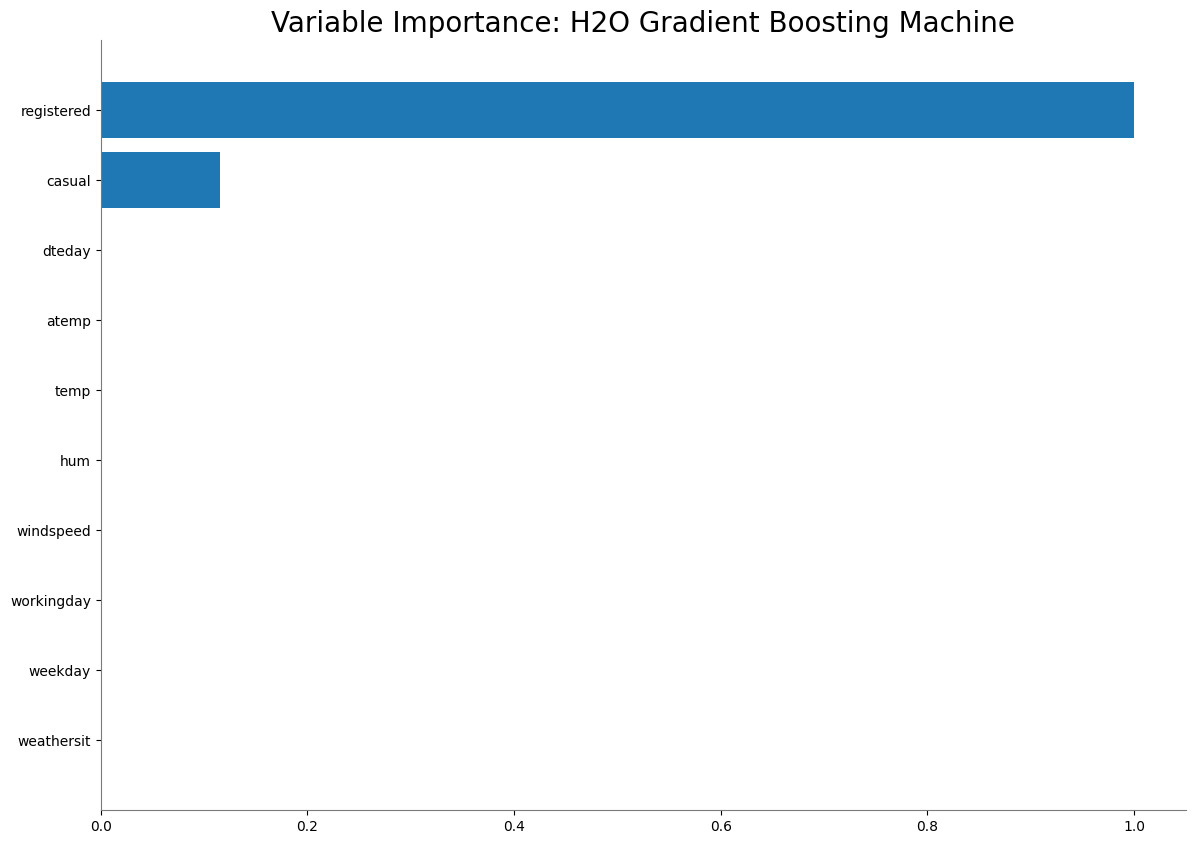

<Figure size 640x480 with 0 Axes>

In [43]:
#variable importance plot
gbm.varimp_plot()

In [26]:
# performance evaluation on test set
gbm_per = gbm.model_performance(test_d)
gbm_per

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 13730.719248661599
RMSE: 117.17815175476015
MAE: 75.4038032452297
RMSLE: 0.024027338498679957
Mean Residual Deviance: 13730.719248661599

In [27]:
# GBM predictions comparison with actual test cnt values for day data set
gbm_pred = gbm.predict(test_d)
test_gbm_pred = test_d['cnt'].cbind(gbm_pred)
test_gbm_pred

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


cnt    predict
-----  ---------
 1263    1310.68
 1248    1286.53
  986    1028.47
 1416    1447.94
 1360    1392.68
 1526    1579.88
 1815    1875.73
 2115    2145.35
 1107    1119.85
 1807    1873.97
[154 rows x 2 columns]

In [29]:
# Extract feature interactions:
gbm.feature_interaction()

[Interaction Depth 0: 
    interaction    gain         fscore    wfscore    average_wfscore    average_gain    expected_gain    gain_rank    fscore_rank    wfscore_rank    avg_wfscore_rank    avg_gain_rank    expected_gain_rank    average_rank    average_tree_index    average_tree_depth
--  -------------  -----------  --------  ---------  -----------------  --------------  ---------------  -----------  -------------  --------------  ------------------  ---------------  --------------------  --------------  --------------------  --------------------
    weekday        173155       9         0.963605   0.107067           19239.5         25065.8          9            8              9               10                  11               9                     9.33333         33.5556               3.77778
    registered     3.36872e+09  482       136.619    0.283441           6.98905e+06     1.6423e+09       1            1              1               1                   1                1    

## __5. H2OAutoML for day data__

In [30]:
# Build and train model
aml = H2OAutoML(max_runtime_secs=60,
                seed = 42)
%time aml.train(x=x_d, y=y_d, training_frame=train_d)

AutoML progress: |█
16:34:34.204: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
CPU times: total: 359 ms
Wall time: 1min 54s


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_3_20240414_163434


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       2/5
# GBM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           0/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 11243.79254186925
RMSE: 106.03675090207759
MAE: 75.59284812297646
RMSLE: 0.15019924217272784
Mean Residual Deviance: 11243.79254186925
R^2: 0.9971005943854865
Null degrees of freedom: 576
Residual degrees of freedom: 574
Null deviance: 2237585615.542462
Residual deviance: 6487668.296658557
AIC: 7027.463812024354

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 9390.629335793672
RMSE: 96.9052595878762
MAE: 64.39782795220175
RMSLE: 0.1365511452329885
Mean Residual Deviance: 9390.629335793672
R^2: 0.997578464444392
Null degrees of freedom: 576
Residual degrees of freedom: 574
Null deviance: 2249061386.112845
Residual deviance: 5418393.126752948
AIC: 6923.54386782874

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     1388.7       67.9199      1381.24       1498.15       1339.35       1398.42       1326.35
loglikelihood           0            0            0             0             0             0             0
mae                     64.3894      5.36887      68.4751       66.1128       68.4601       63.339        55.5598
mean_residual_deviance  9377.75      2164.36      12372.5       10691.1       8511.45       8484.66       6829
mse                     9377.75      2164.36      12372.5       10691.1       8511.45       8484.66       6829
null_deviance           4.49812e+08  3.14804e+07  4.43357e+08   4.97433e+08   4.60312e+08   4.34223e+08   4.13737e+08
r2                      0.997566     0.000514476  0.996805      0.997318      0.997927      0.99769       0.998088
residual_deviance       1.08368e+06  258538       1.38572e+06   1.31501e+06   953283        992706        771677
rmse                    96.3274      11.1116      111.232       103.398       92.2575       92.1122       82.6377
rmsle                   0.0873797    0.12014      0.302163      0.0309826     0.0322681     0.0306705     0.0408142

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [31]:
# Checking the leaderboard
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id                                                               rmse               mse        mae       rmsle    mean_residual_deviance
----------------------------------------------------------------  ---------  ----------------  ---------  ----------  ------------------------
StackedEnsemble_BestOfFamily_4_AutoML_3_20240414_163434             96.9053    9390.63           64.3978    0.136551            9390.63
GBM_lr_annealing_selection_AutoML_3_20240414_163434_select_model   112.465    12648.4            72.0464    0.13624            12648.4
GBM_grid_1_AutoML_3_20240414_163434_model_66                       121.242    14699.5            75.0631    0.131867           14699.5
GBM_grid_1_AutoML_3_20240414_163434_model_31                       134.695    18142.6            81.7186    0.140063           18142.6
GBM_grid_1_AutoML_3_20240414_163434_model_2                        134.696    18143.1            83.5023    0.143129           18143.1
GBM_grid_1_AutoML_3_20240414_163434_model_72                       141.574    20043.1            92.8078    0.155287           20043.1
GBM_grid_1_AutoML_3_20240414_163434_model_8                        141.879    20129.5            87.3782    0.132888           20129.5
GBM_grid_1_AutoML_3_20240414_163434_model_24                       142.466    20296.4            87.6772    0.133303           20296.4
GBM_grid_1_AutoML_3_20240414_163434_model_56                       143.545    20605.2            84.945     0.142677           20605.2
GBM_grid_1_AutoML_3_20240414_163434_model_73                       144.546    20893.4            94.3254    0.149503           20893.4
StackedEnsemble_AllModels_2_AutoML_3_20240414_163434               144.712    20941.6            95.854     0.151234           20941.6
GBM_grid_1_AutoML_3_20240414_163434_model_64                       145.113    21057.7            95.0907    0.161508           21057.7
GBM_grid_1_AutoML_3_20240414_163434_model_1                        146.421    21439.1            95.7334    0.169219           21439.1
StackedEnsemble_BestOfFamily_3_AutoML_3_20240414_163434            153.422    23538.3           102.48      0.1487             23538.3
GBM_5_AutoML_3_20240414_163434                                     155.659    24229.7           101.176     0.150189           24229.7
StackedEnsemble_AllModels_1_AutoML_3_20240414_163434               156.034    24346.5           104.637     0.168525           24346.5
DeepLearning_grid_1_AutoML_3_20240414_163434_model_2               160.196    25662.8           110.506     0.171848           25662.8
StackedEnsemble_BestOfFamily_2_AutoML_3_20240414_163434            160.586    25787.8           108.474     0.170045           25787.8
GBM_grid_1_AutoML_3_20240414_163434_model_11                       162.524    26414.2           107.153     0.147357           26414.2
GBM_4_AutoML_3_20240414_163434                                     162.66     26458.3           108.303     0.171562           26458.3
GBM_2_AutoML_3_20240414_163434                                     166.153    27606.9           111.304     0.16695            27606.9
GBM_grid_1_AutoML_3_20240414_163434_model_19                       171.993    29581.5           118.017     0.176014           29581.5
GBM_grid_1_AutoML_3_20240414_163434_model_35                       176.405    31118.6           125.183     0.174264           31118.6
GBM_grid_1_AutoML_3_20240414_163434_model_47                       178.074    31710.3           133.783     0.155784           31710.3
GBM_grid_1_AutoML_3_20240414_163434_model_9                        178.977    32032.8           124.032     0.175581           32032.8
GBM_grid_1_AutoML_3_20240414_163434_model_12                       180.239    32486.1           120.82      0.173532           32486.1
GBM_grid_1_AutoML_3_20240414_163434_model_63                       181.085    32791.7           125.563     0.153313           32791.7
GBM_grid_1_AutoML_3_20240414_163434_model_13                       1

In [32]:
# Checking the leader model performance
aml.leader.model_performance(test_d)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 11896.621485533988
RMSE: 109.07163465142524
MAE: 83.39042348830198
RMSLE: 0.03293999677249249
Mean Residual Deviance: 11896.621485533988
R^2: 0.9963440346264746
Null degrees of freedom: 153
Residual degrees of freedom: 151
Null deviance: 502171071.09785277
Residual deviance: 1832079.7087722342
AIC: 1890.1705666487696

In [33]:
# comparing the leader model predictions with test cnt
leader_pred = aml.leader.predict(test_d)
test_leader_pred = test_d['cnt'].cbind(leader_pred)
test_leader_pred.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


cnt    predict
-----  ---------
 1263    1312.33
 1248    1338.76
  986    1036.81
 1416    1496.89
 1360    1420.07
 1526    1530.09
 1815    1897.69
 2115    2178.58
 1107    1049.02
 1807    1809.2
[10 rows x 2 columns]

## Explaining the AutoML model on Day data

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                             rmse       mse      mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
----------------------------------------------------------------  -------  --------  -------  ---------  ------------------------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_3_20240414_163434_model_31                      192.206   36943.1  152.257    1.6983                    36943.1                 247                   0.002109  GBM
GBM_grid_1_AutoML_3_20240414_163434_model_8                       266.673   71114.7  243.537    1.97752                   71114.7                 191                   0.001648  GBM
GBM_grid_1_AutoML_3_20240414_163434_model_24                      270.783   73323.6  248.141    1.98446                   73323.6                 220                   0.001513  GBM
GBM_grid_1_AutoML_3_20240414_163434_model_66                      296.935   88170.2  276.315    2.03922                   88170.2                 198                   0.002511  GBM
GBM_grid_1_AutoML_3_20240414_163434_model_64                      322.14   103774    286        1.98973                  103774                   437                   0.003623  GBM
GBM_lr_annealing_selection_AutoML_3_20240414_163434_select_model  334.144  111652    313.422    2.11201                  111652                   600                   0.002831  GBM
GBM_grid_1_AutoML_3_20240414_163434_model_56                      380.647  144892    359.473    2.19748                  144892                   149                   0.001477  GBM
StackedEnsemble_BestOfFamily_3_AutoML_3_20240414_163434           384.115  147544    362.929  nan                        147544                   142                   0.003349  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_3_20240414_163434              399.028  159223    380.676    2.15136                  159223                   116                   0.00762   StackedEnsemble
GBM_5_AutoML_3_20240414_163434                                    402.247  161802    383.27     2.15962                  161802                   224                   0.002068  GBM
GBM_grid_1_AutoML_3_20240414_163434_model_2                       431.707  186371    409.976    2.2821                   186371                   159                   0.00207   GBM
GBM_grid_1_AutoML_3_20240414_163434_model_73                      490.078  240177    466.164    2.37261                  240177                   140                   0.002215  GBM
DeepLearning_grid_1_AutoML_3_20240414_163434_model_1              516.887  267173    437.615  nan                        267173                  2124                   0.000873  DeepLearning
GBM_grid_1_AutoML_3_20240414_163434_model_1                       520.486  270906    492.081    2.29376                  270906                   132                   0.002357  GBM
GBM_grid_1_AutoML_3_20240414_163434_model_11                      537.127  288505    517.837    2.39664                  288505                   194                   0.003321  GBM
DeepLearning_grid_1_AutoML_3_20240414_163434_model_4              555.072  308105    452.775  nan                        308105                    50                   0.001167  DeepLearning
GBM_grid_1_AutoML_3_20240414_163434_model_72                      563.539  317576    540.445    2.41474                  317576                   150                   0.002746  GBM
GBM_grid_1_AutoML_3_20240414_163434_model_63                      588.287  346081    561.406    2.38487                  346081                   158                   0.003177  GBM
GBM_3_AutoML_3_20240414_163434                                    597.673  357213    573.113    2.42932                  357213                   126                   0.002855  GBM
StackedEnsemble_AllModels_1_AutoML_3_20240414_163434              604.496  365415    578.73     2.42579                  36

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

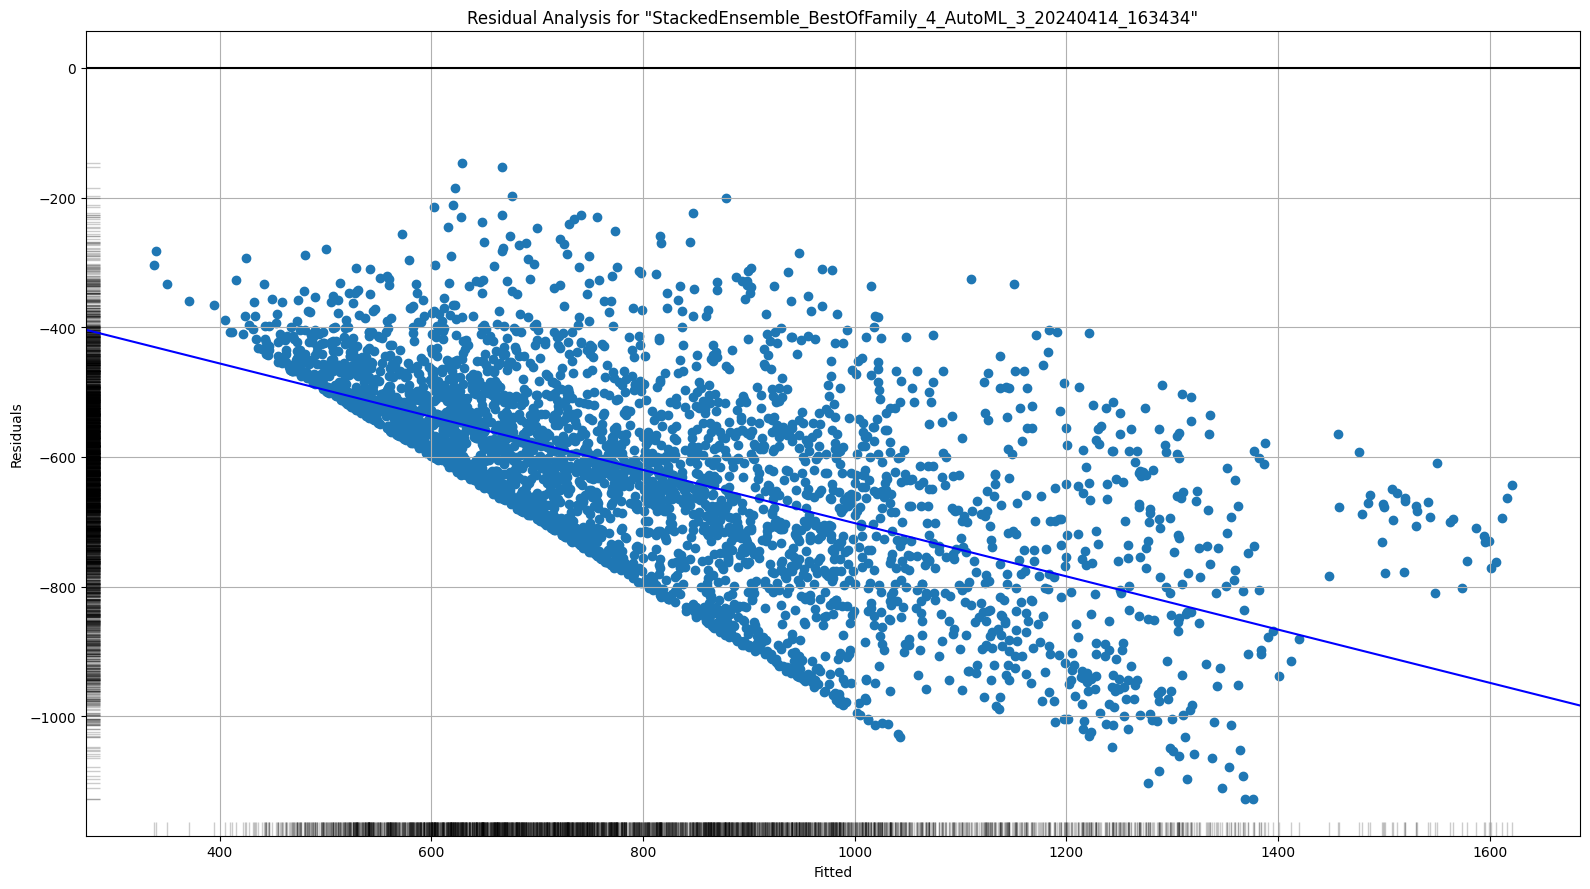

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

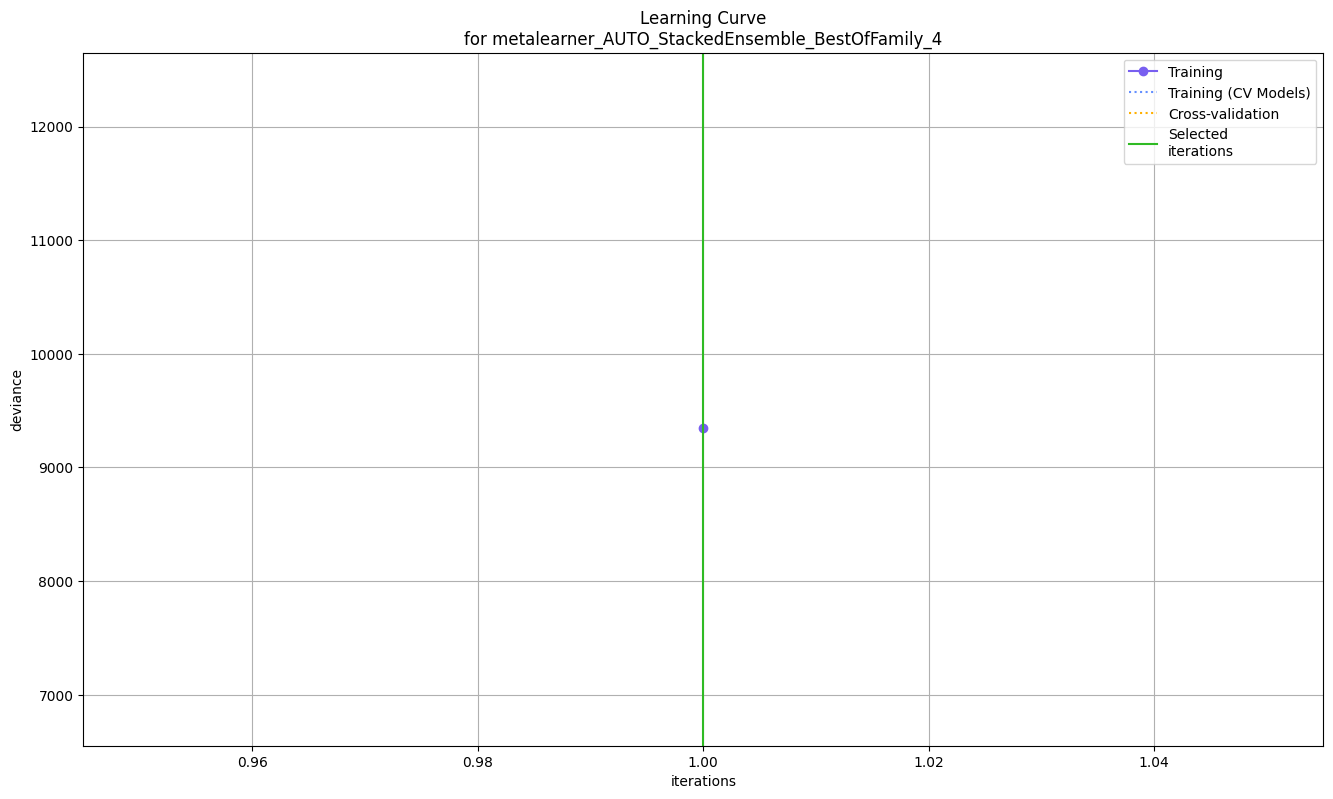

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

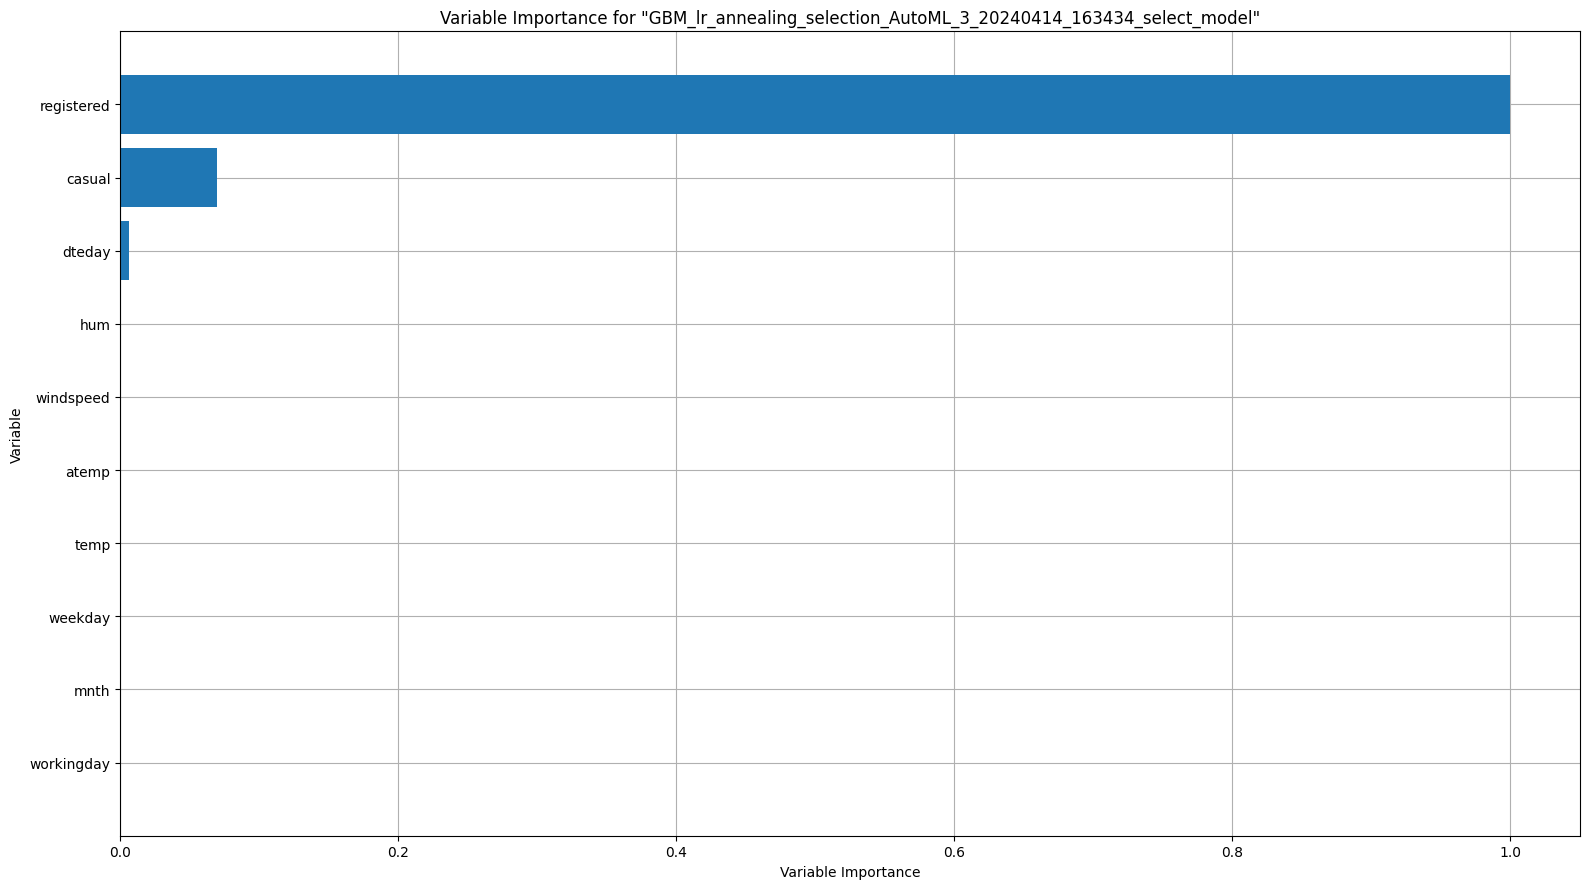

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

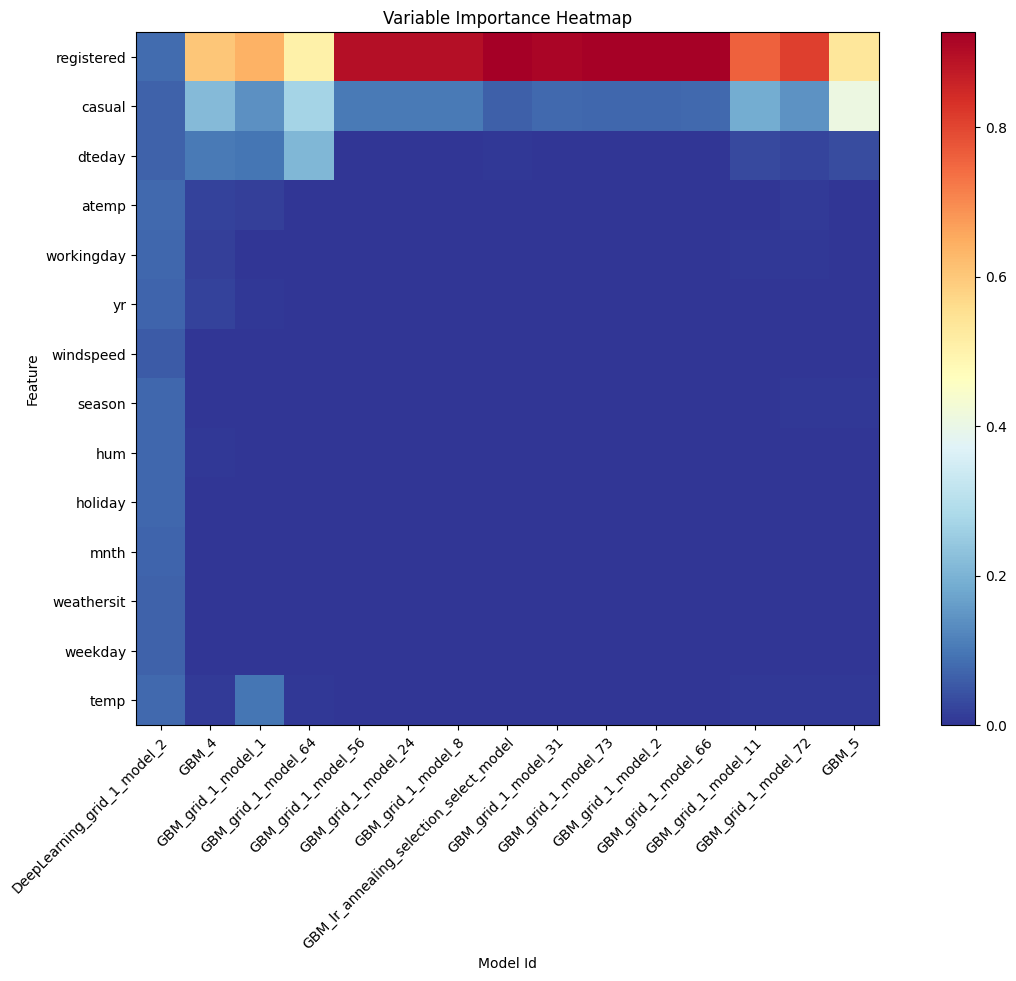

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

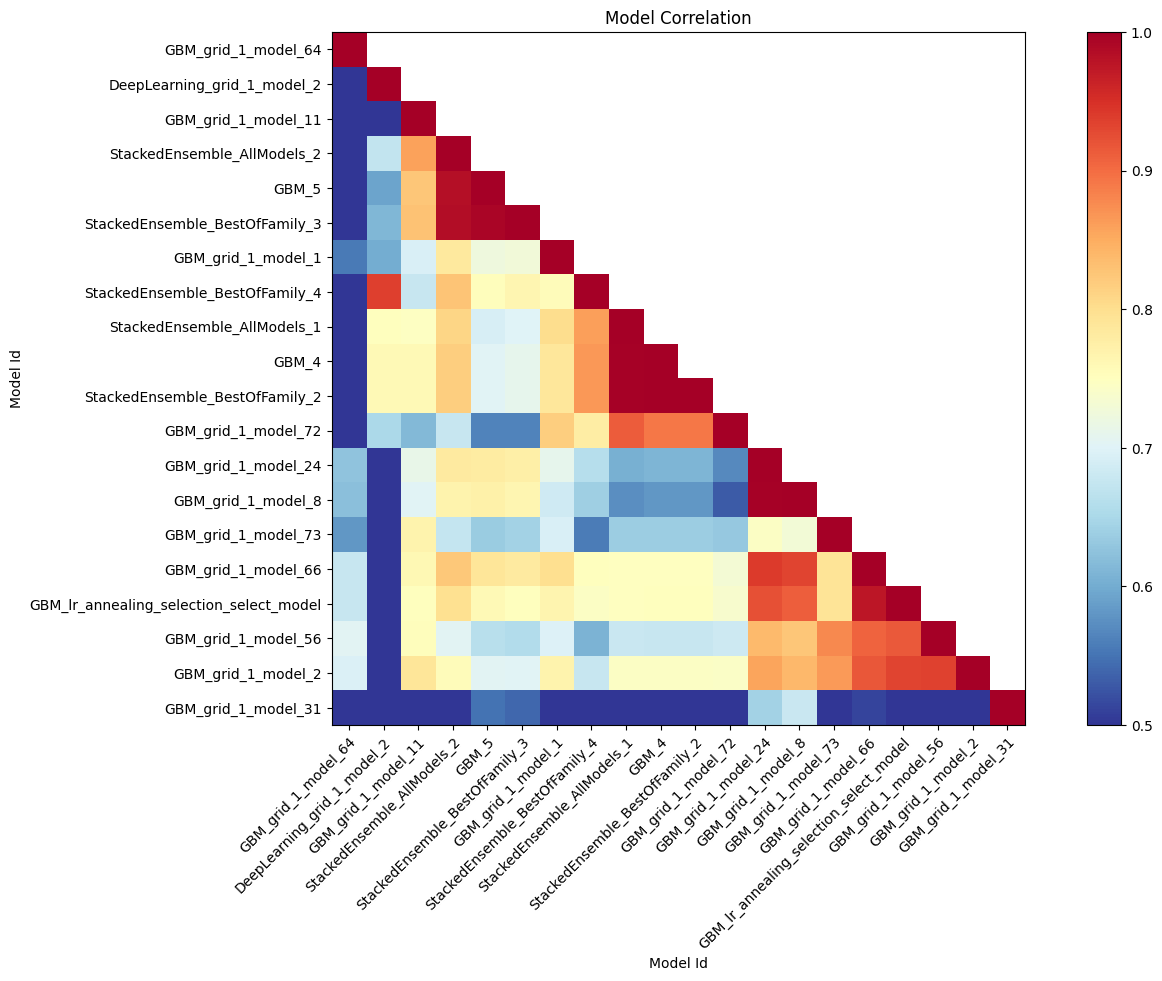

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

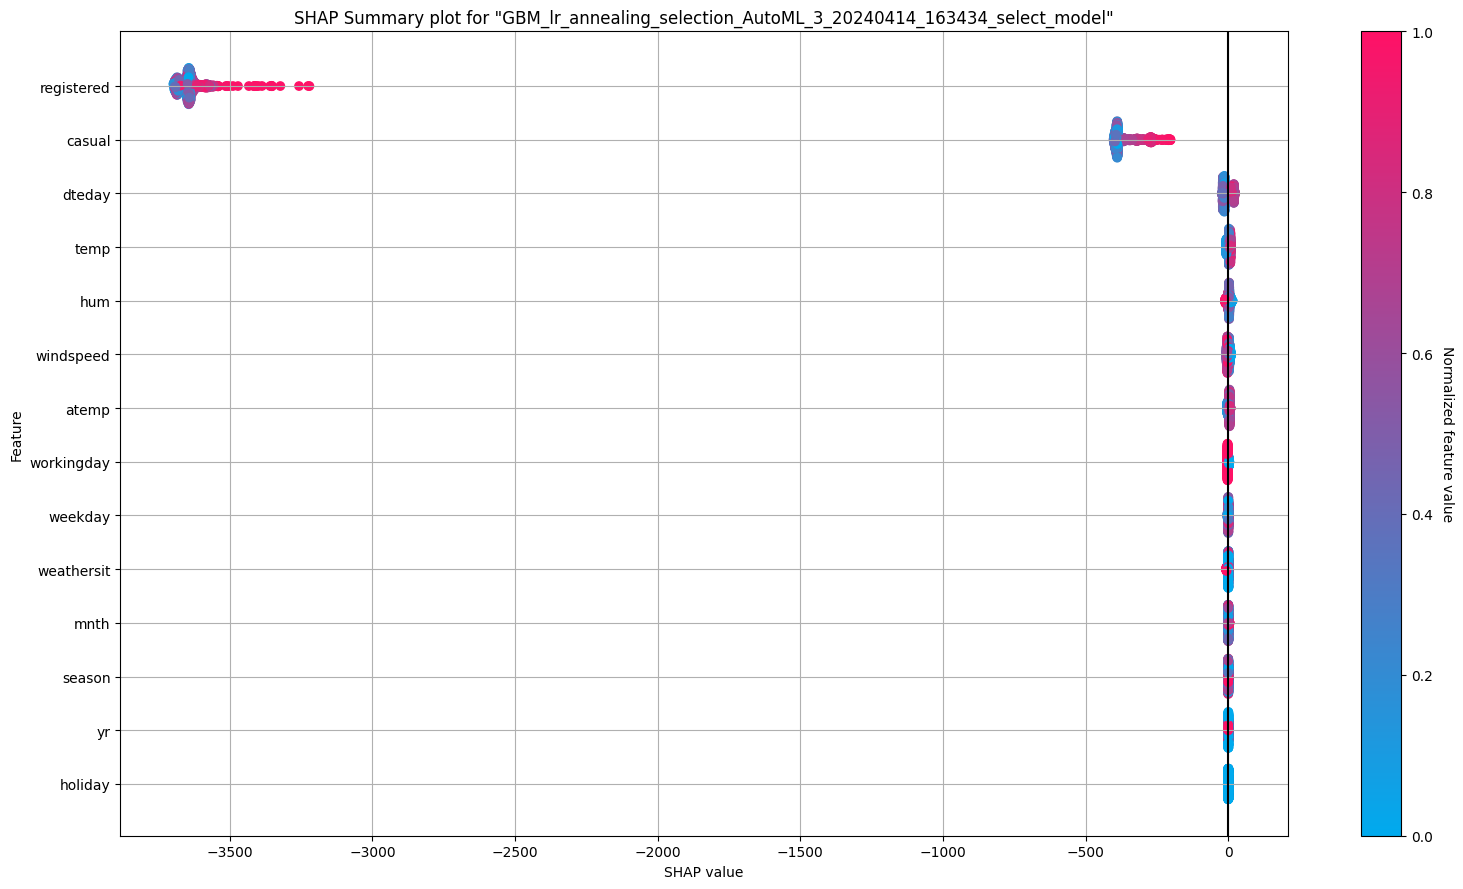

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

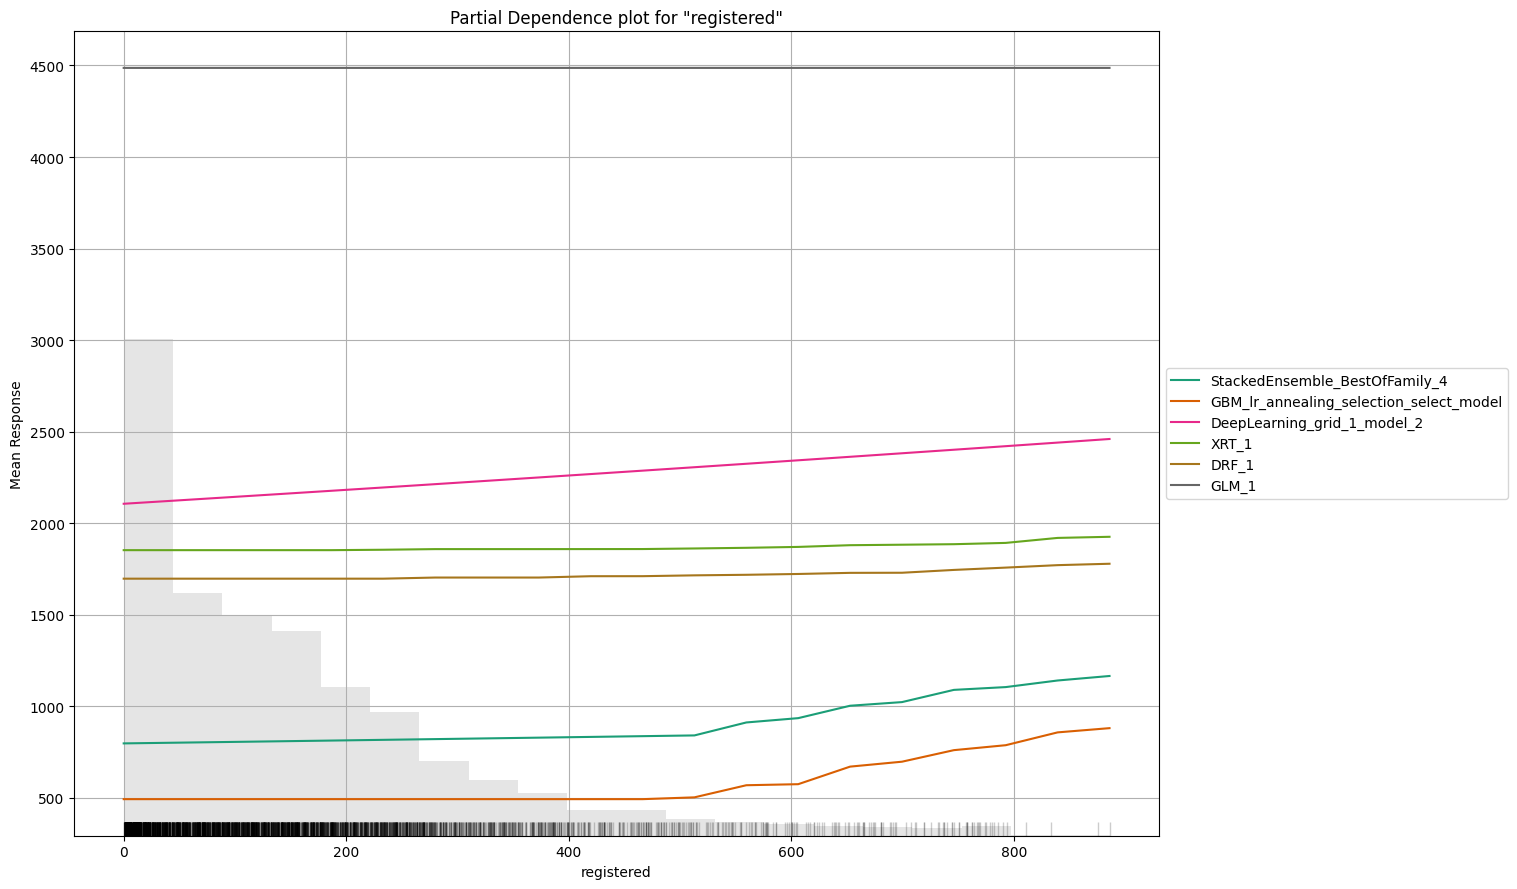

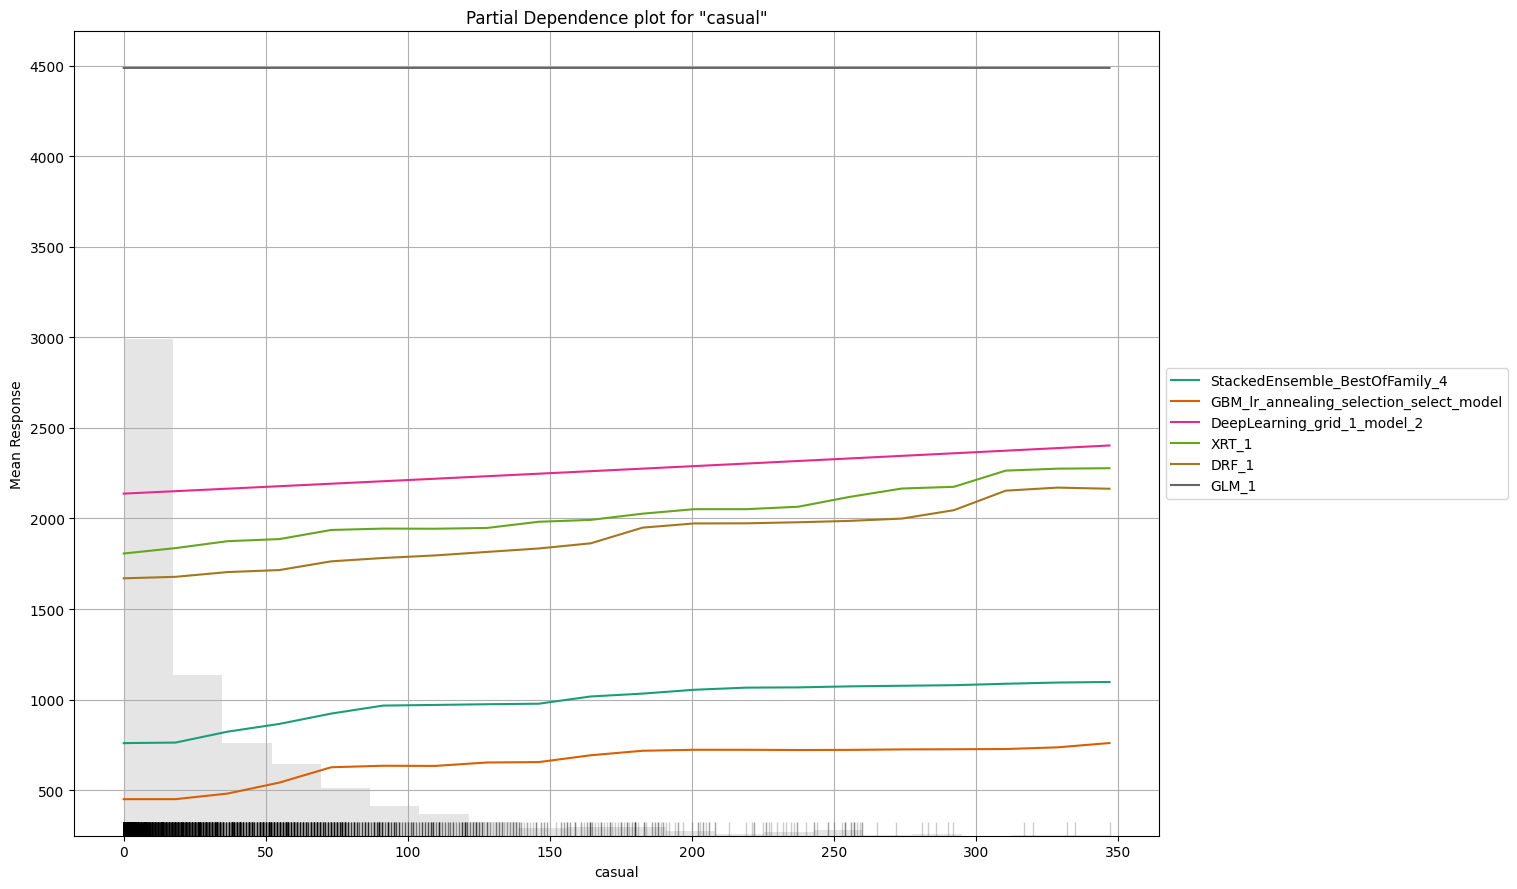

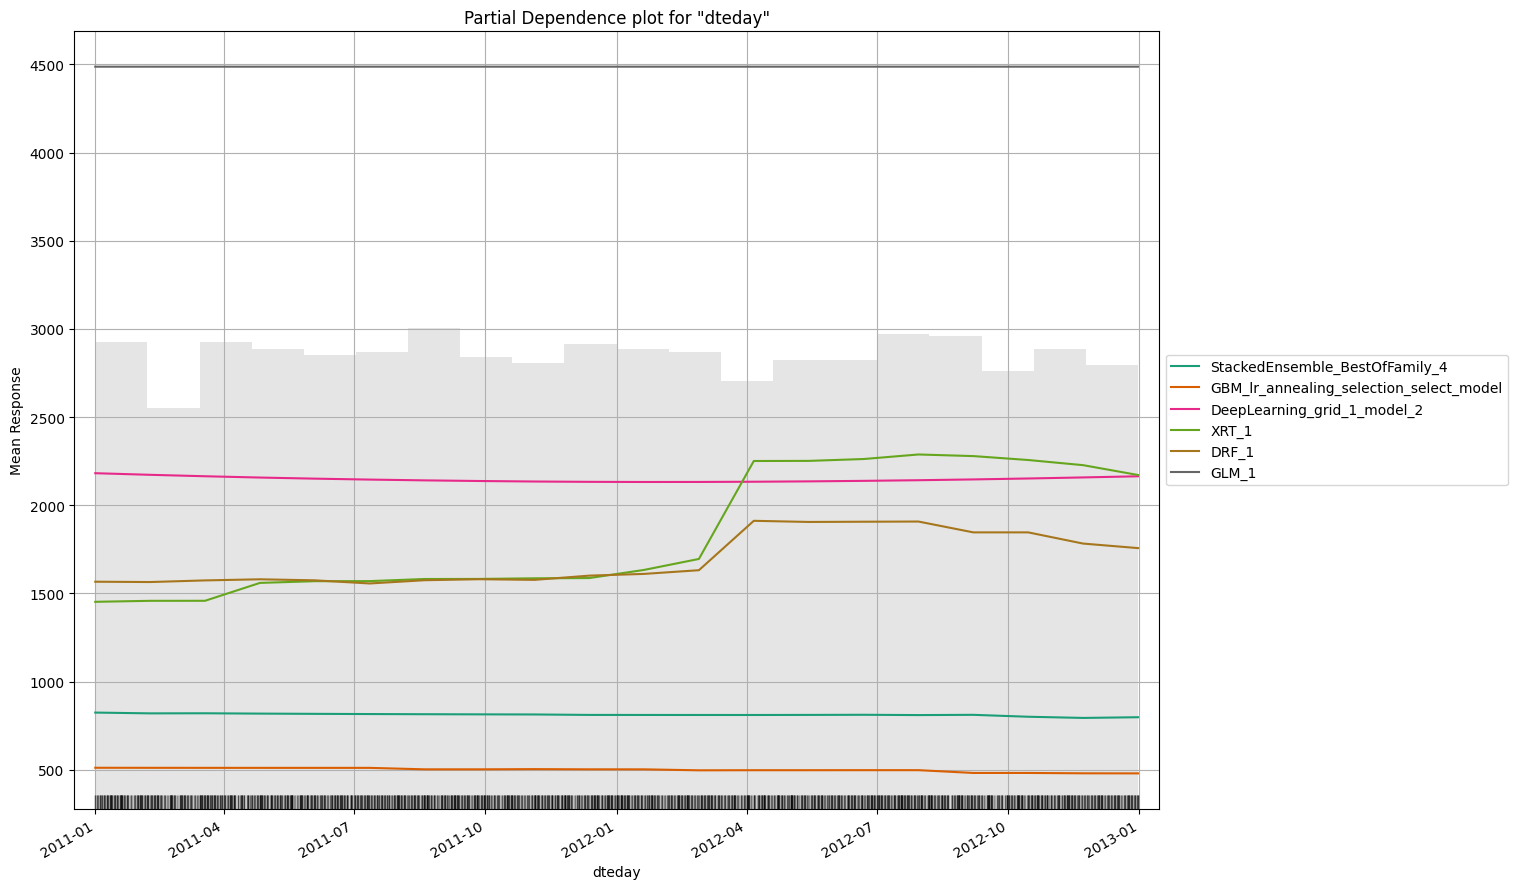

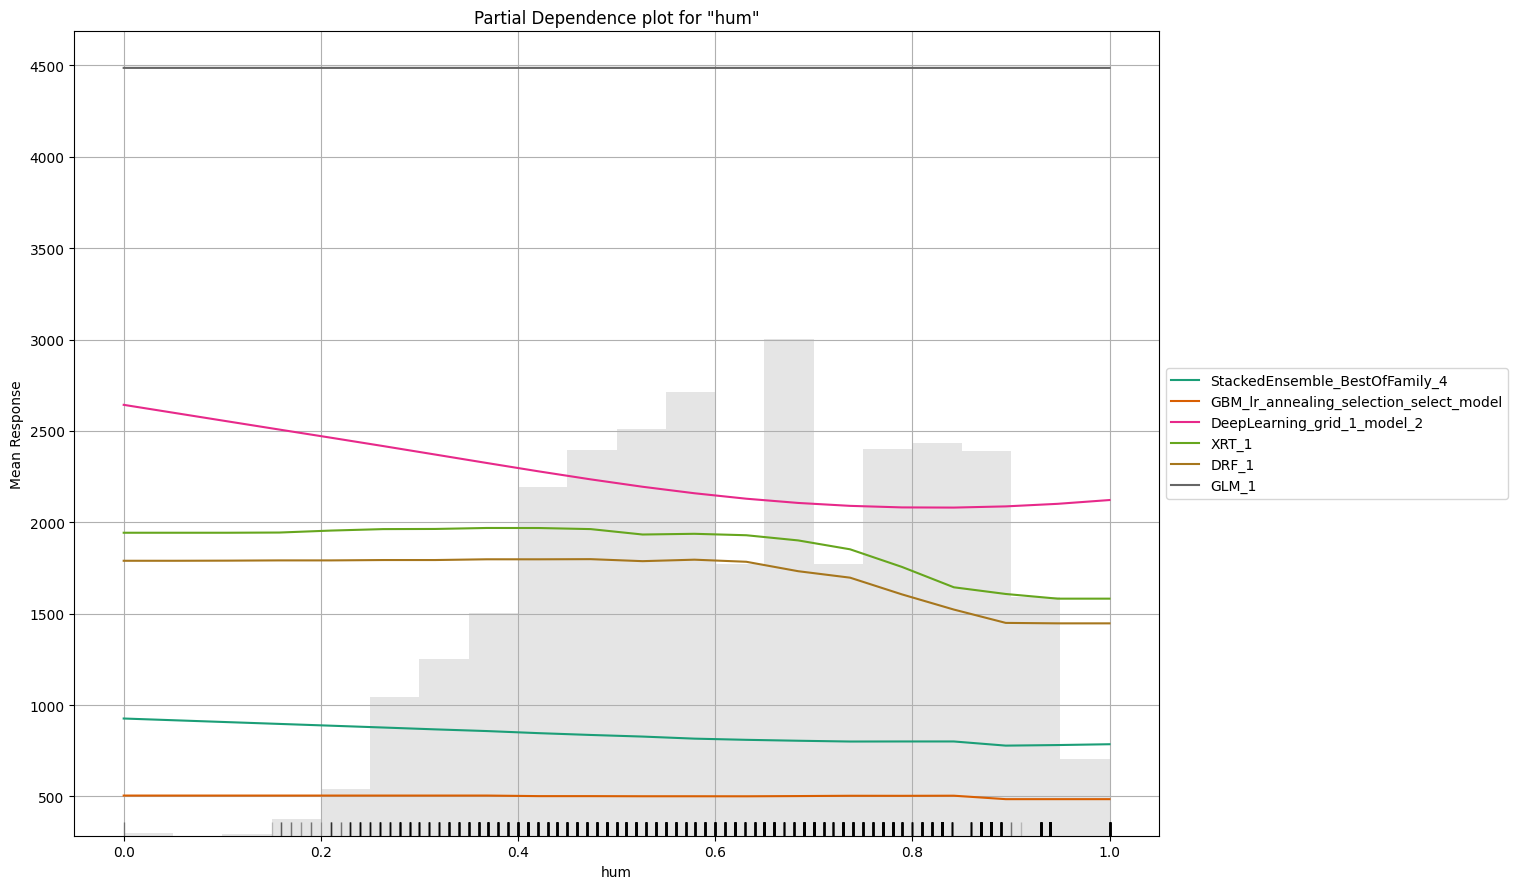

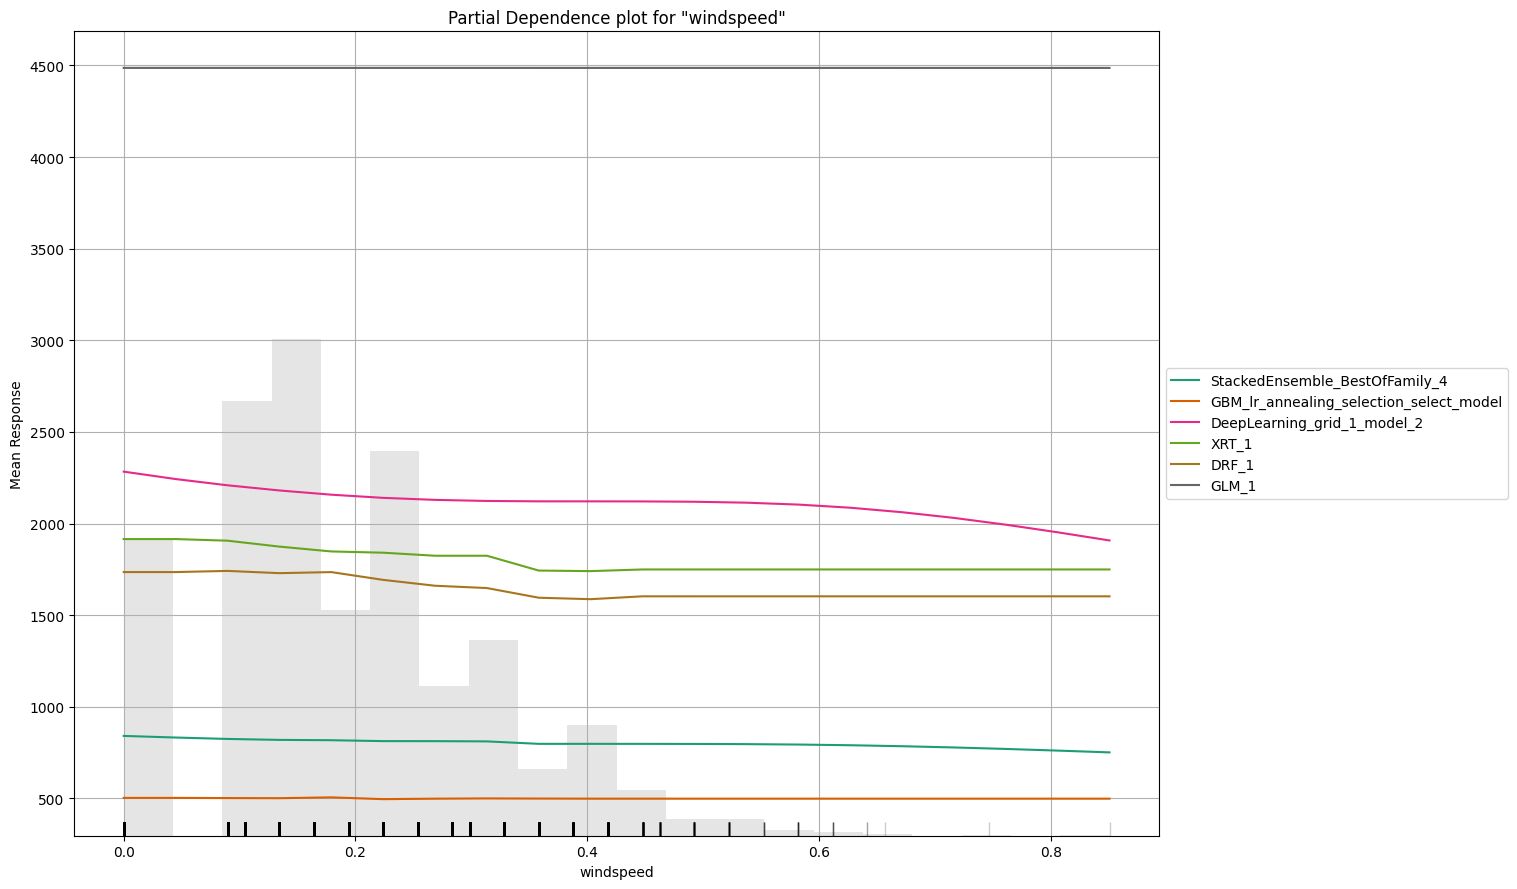

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

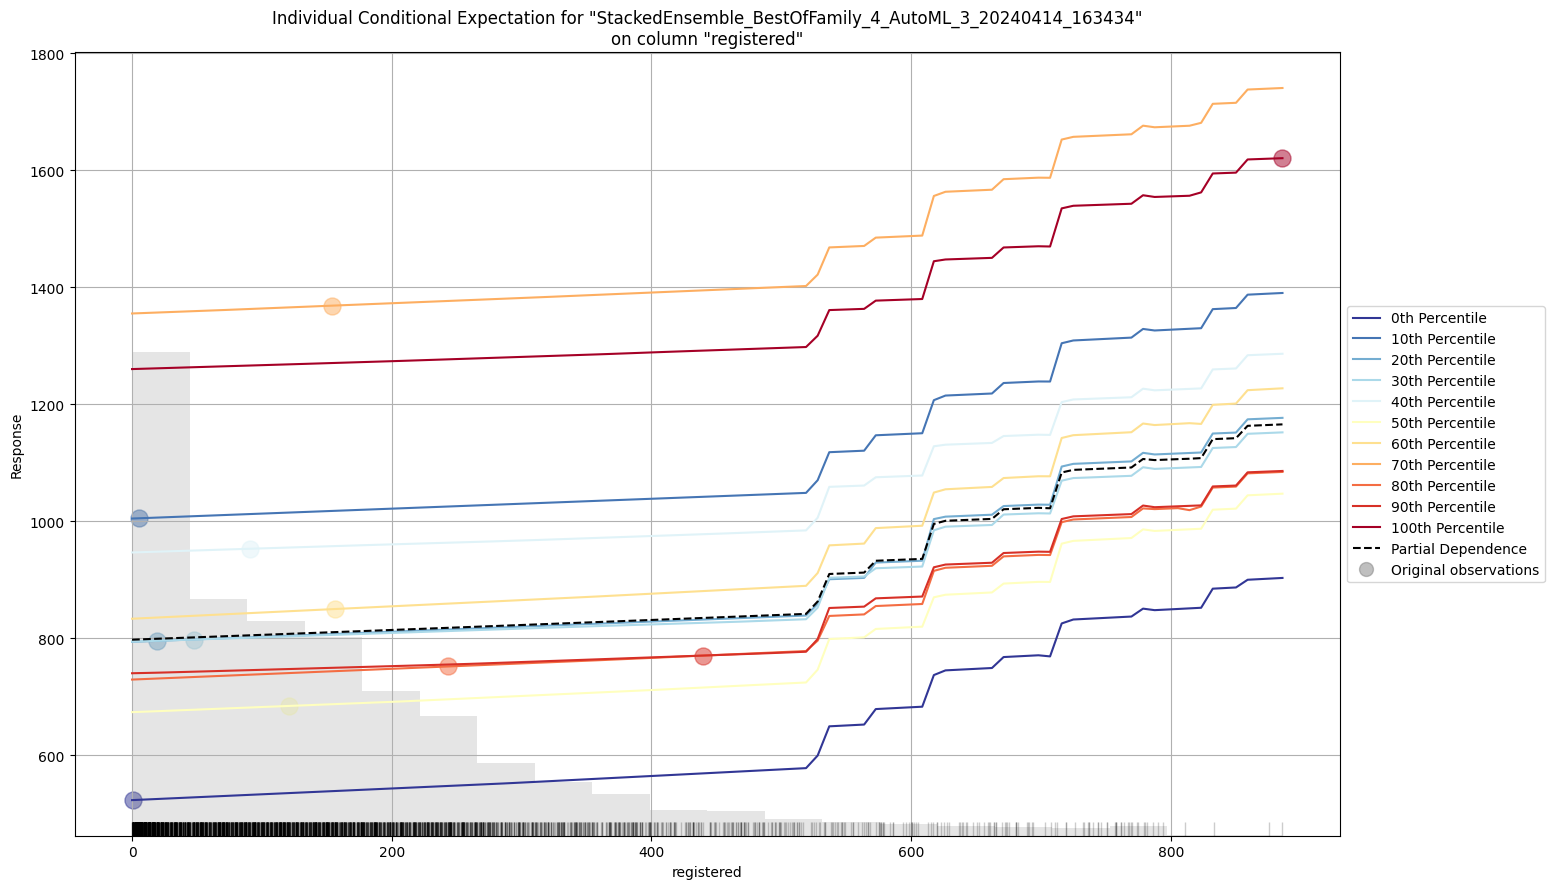

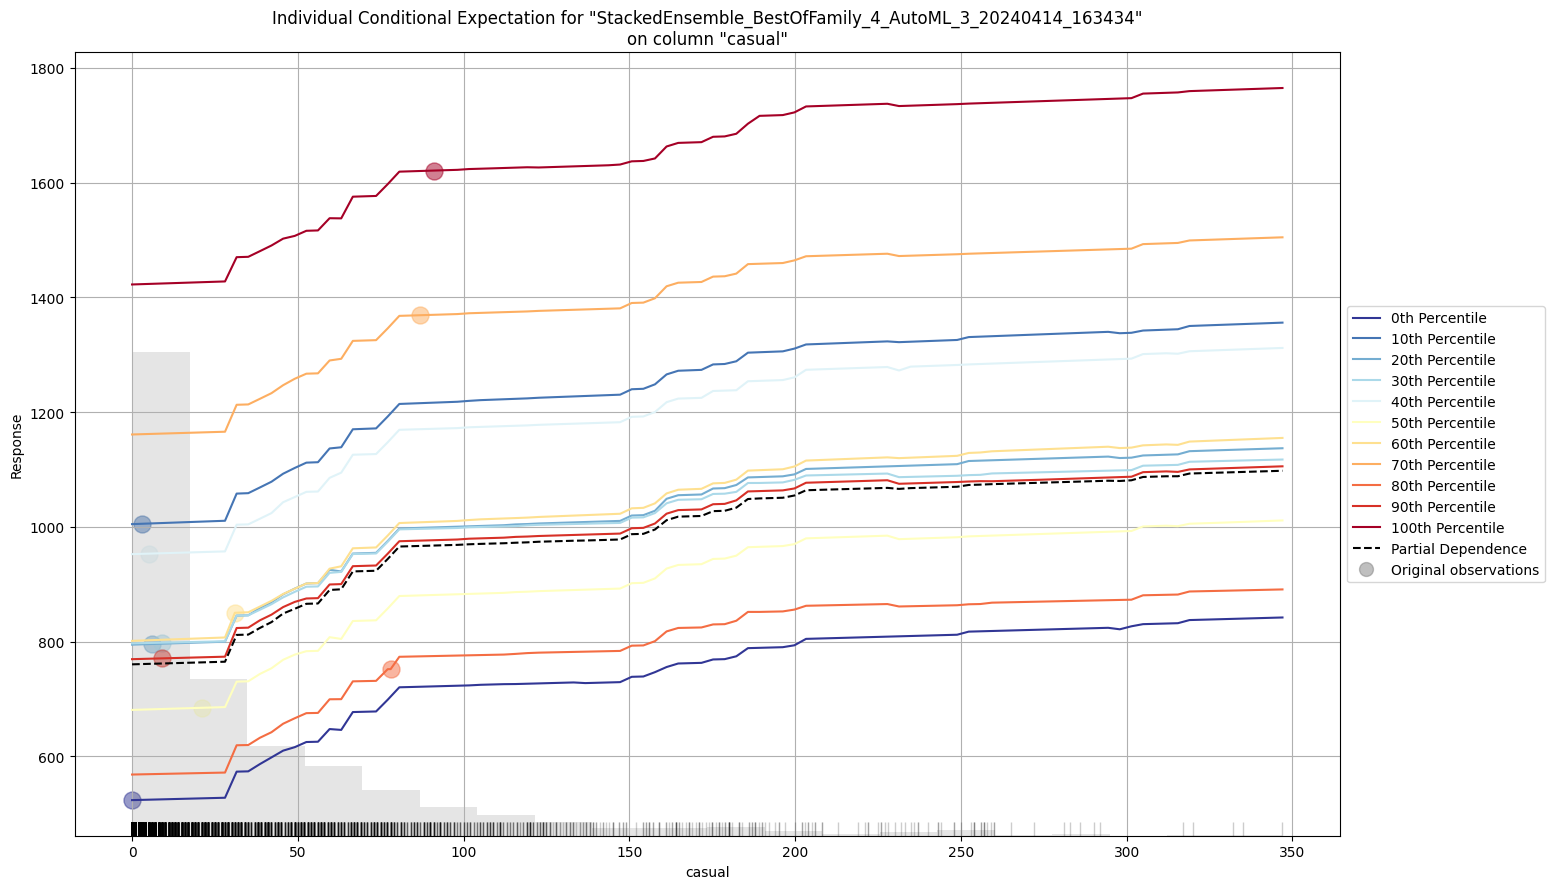

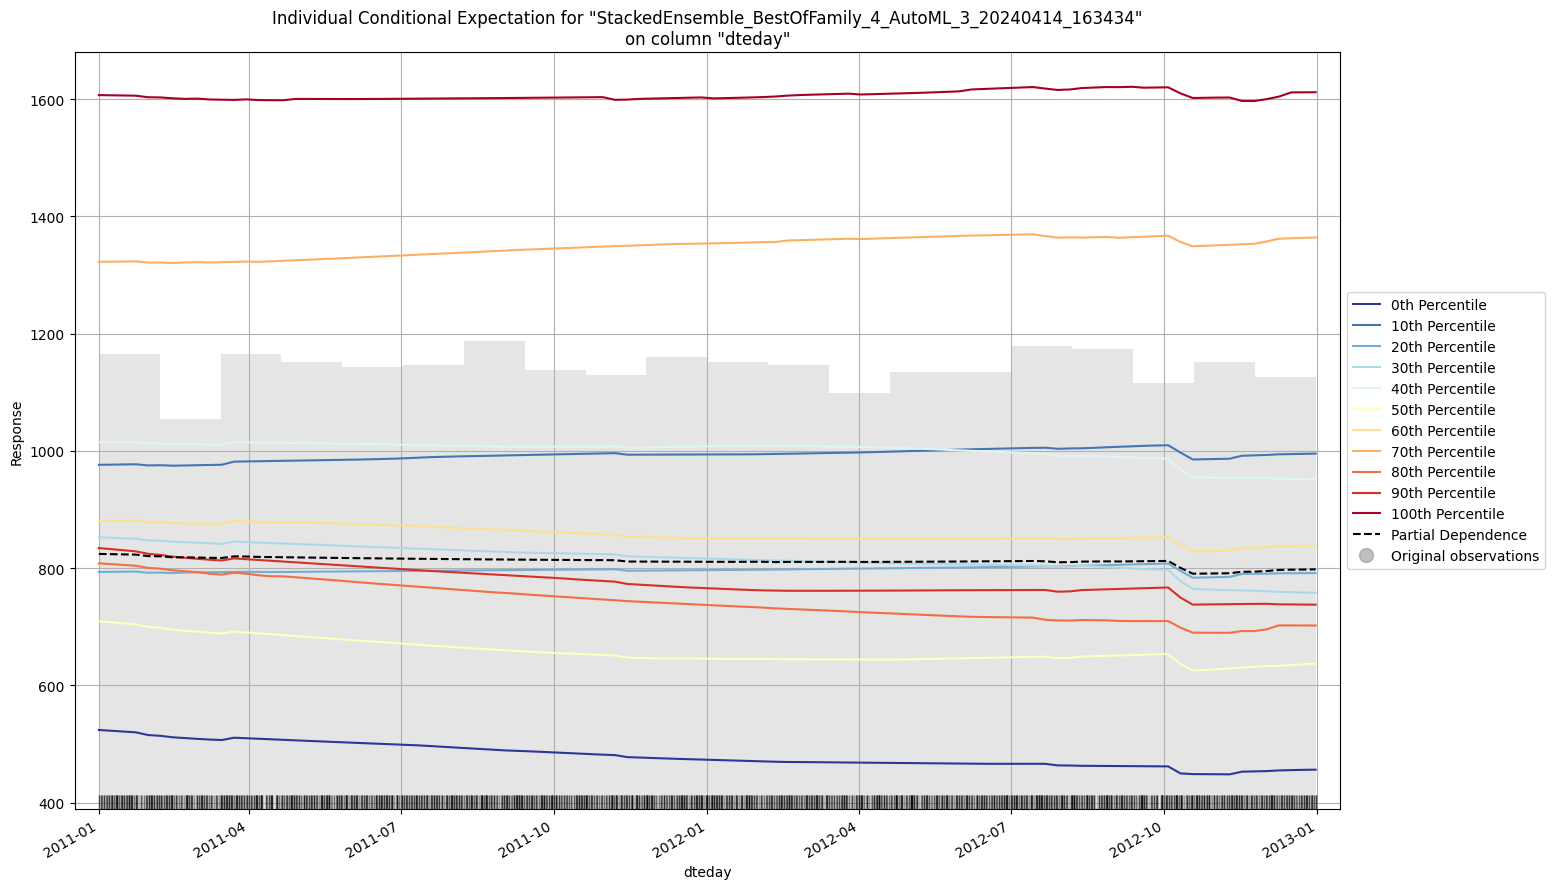

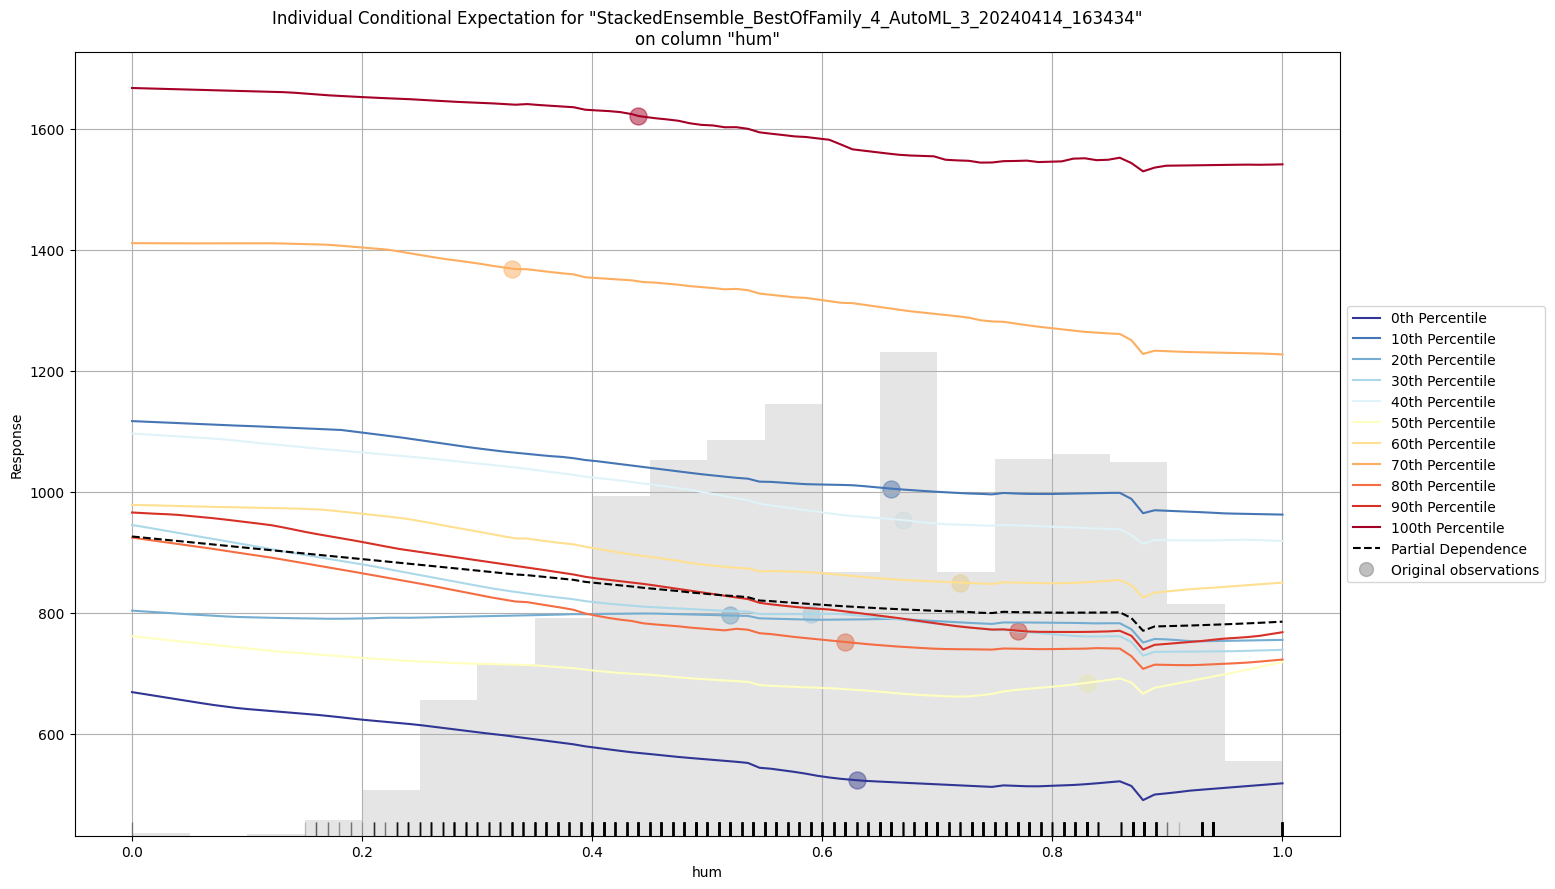

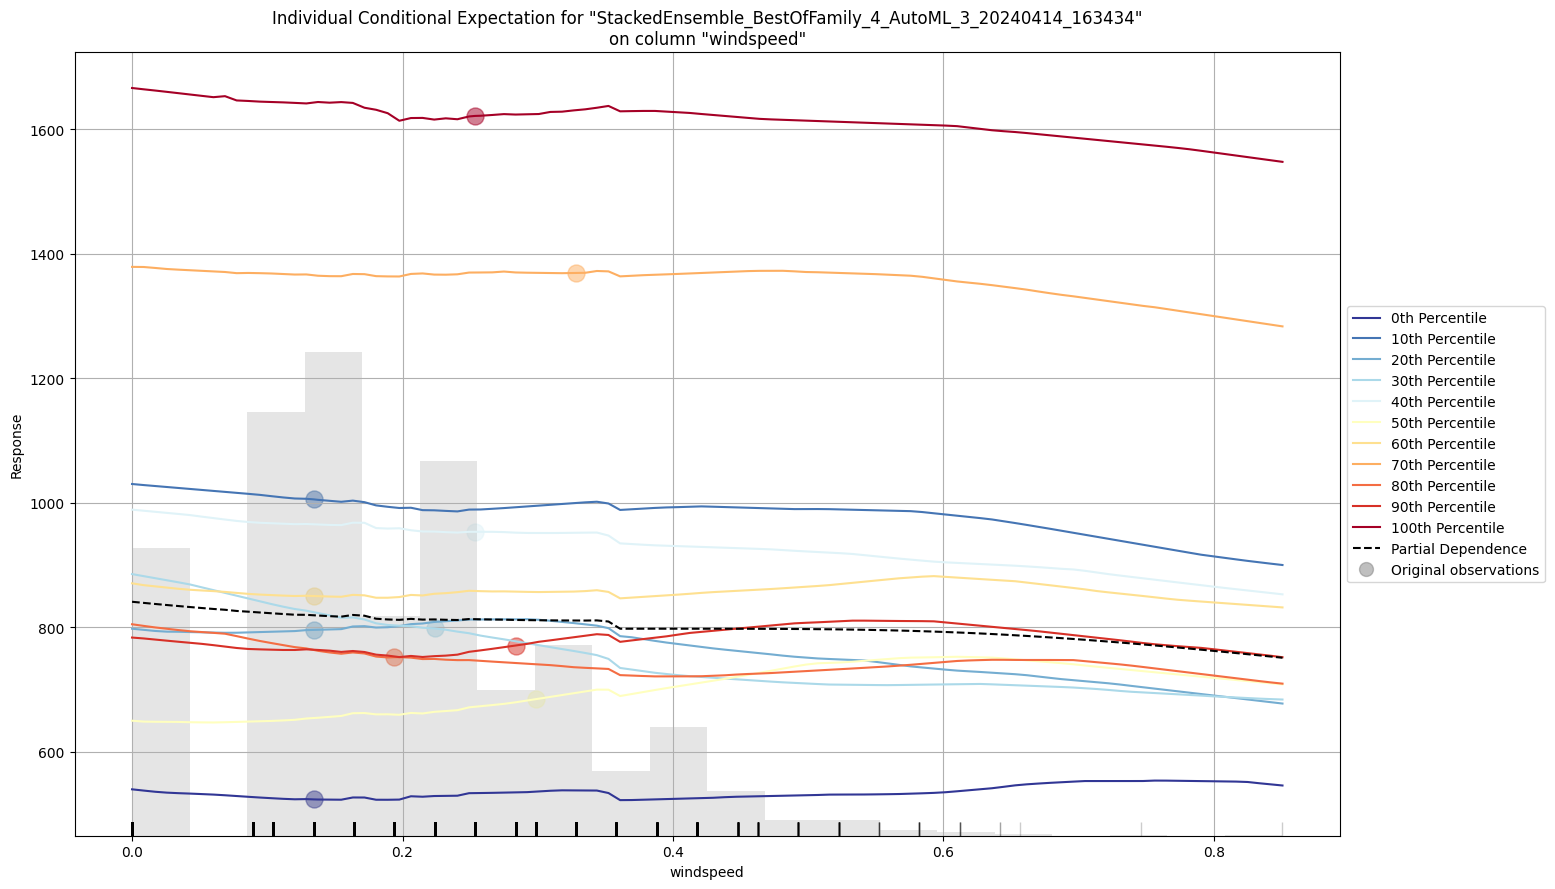

In [34]:
# Explain leader model and compare it with all models
exa = aml.explain(test)

## __6. Interpretation on Day dataset__

<ol>
<li>GBM grid model gave good result</li>
<li>Registered users are using bike rent more than casual users on daily basis</li>
<li>DateDay is having significant effect on bike rental users</li>
<li>Windspeed, Humidity are showing slighter impact on bike rental user counts</li>
<li>All other features are having no significant effect on bike rental user counts</li>
<li>Residual analysis shows all are behaving random with slight linearly downward trend</li>
<li>Model parameters should be tuned for better results</li>
</ol>